# Income Qualification

Following actions should be performed:

1. Identify the output variable.
2. Understand the type of data.
3. Check if there are any biases in your dataset.
4. Check whether all members of the house have the same poverty level.
5. Check if there is a house without a family head.
6. Set poverty level of the members and the head of the house within a family.
7. Count how many null values are existing in columns.
8. Remove null value rows of the target variable.
9. Predict the accuracy using random forest classifier.
10. Check the accuracy using random forest with cross validation.

# Start

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_tr = pd.read_csv('train.csv')

df_te = pd.read_csv('test.csv')

In [3]:
df_tr.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [4]:
df_te.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  ...  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     1  ...    4            0      16               9          0   
1     1  ...   41          256    1681               9          0   
2     1  ...   41          289    1681               9          0   
3     0  ...   59          256    3481               1        256   
4     0  ...   18          121     324               1          0   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             1             2.25           0.25     272.25     16  
1             1             2.25           0.25     272.25   1681  
2             1             2.25           0.25     272.25   1681  
3             0             1.00           0.00     256.00   3481  
4             1             0.25          64.00        NaN    324  

[5 rows x 142 columns]

In [5]:
df_tr.shape

(9557, 143)

In [6]:
df_te.shape

(23856, 142)

In [7]:
print(df_tr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
None


In [8]:
print(df_te.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB
None


#### 1. Identify the output variable.

In [9]:
df_tr.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [10]:
# Here output variable it 'Target' column

df_tr['Target'].unique()

array([4, 2, 3, 1], dtype=int64)

In [11]:
for i in df_tr.columns:
    if i not in df_te.columns:
        print('Our Target/Dependent Variable :',i)

Our Target/Dependent Variable : Target


#### 2. Understand the type of data.

In [12]:
df_tr.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [13]:
data_types = pd.DataFrame(df_tr.dtypes, columns = ['type'])

data_types.reset_index(inplace = True)

In [14]:
data_types.columns = ['var','type']

data_types

var     type
0                 Id   object
1               v2a1  float64
2             hacdor    int64
3              rooms    int64
4             hacapo    int64
..               ...      ...
138  SQBovercrowding  float64
139    SQBdependency  float64
140        SQBmeaned  float64
141            agesq    int64
142           Target    int64

[143 rows x 2 columns]

In [15]:
data_types['type'].unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [16]:
data_types[data_types['type'] == object]

#we see that there is 5 variables in the dataset with type as object 

var    type
0            Id  object
95      idhogar  object
100  dependency  object
101      edjefe  object
102      edjefa  object

In [17]:
df_tr['Id'].nunique()  

#Each house has one unique ID
#ID is not helpful for building the model. It need to drop.

9557

In [18]:
df_tr = df_tr.drop('Id', axis = 1)

In [19]:
df_tr['idhogar'].unique()

df_tr['idhogar'].nunique()

#Here idhogar is the Household level identifier

2988

In [20]:
df_tr['idhogar'].isnull().sum()

#There is no null values in idhogar

0

In [21]:
#Here idhogar need to drop, it is not useful to build the model

df_tr = df_tr.drop('idhogar', axis = 1)

In [22]:
df_tr['dependency'].unique()

#Here dependency is Dependency rate, calculated = (number of members of the household \
# younger than 19 or older than 64)/(number of member of household between 19 and 64)

#After analysing the data and formulae get to know that no means 0 and yes means 1.
#Hence replacing no as 0 and yes as 1.

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [23]:
df_tr['dependency'].replace('no',0, inplace  = True)
df_tr['dependency'].replace('yes',1, inplace  = True)

df_tr['dependency'] = df_tr['dependency'].astype(float)

In [24]:
df_tr['dependency'].unique()

#Now the dependency column is good for model.

array([0.        , 8.        , 1.        , 3.        , 0.5       ,
       0.25      , 2.        , 0.66666669, 0.33333334, 1.5       ,
       0.40000001, 0.75      , 1.25      , 0.2       , 2.5       ,
       1.2       , 4.        , 1.3333334 , 2.25      , 0.22222222,
       5.        , 0.83333331, 0.80000001, 6.        , 3.5       ,
       1.6666666 , 0.2857143 , 1.75      , 0.71428573, 0.16666667,
       0.60000002])

In [25]:
df_tr['edjefe'].unique()

#Here edjefe, years of education of male head of household, based on the interaction of \
#escolari (years of education), head of household and gender, yes=1 and no=0

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [26]:
df_tr['edjefe'].replace('no',0, inplace  = True)
df_tr['edjefe'].replace('yes',1, inplace  = True)

df_tr['edjefe'] = df_tr['edjefe'].astype(int)

df_tr['edjefe'].unique()

array([10, 12,  0, 11,  9, 15,  4,  6,  8, 17,  7, 16, 14,  5, 21,  2, 19,
        1,  3, 18, 13, 20])

In [27]:
df_tr['edjefa'].unique()

#edjefa, years of education of female head of household, based on the interaction of \
#escolari (years of education), head of household and gender, yes=1 and no=0

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [28]:
df_tr['edjefa'].replace('no',0, inplace  = True)
df_tr['edjefa'].replace('yes',1, inplace  = True)

df_tr['edjefa'] = df_tr['edjefa'].astype(int)

df_tr['edjefa'].unique()

array([ 0, 11,  4, 10,  9, 15,  7, 14, 13,  8, 17,  6,  5,  3, 16, 19,  1,
       21, 12,  2, 20, 18])

In [29]:
df_tr.dtypes.value_counts() # Now the data is not contain object type

int64      130
float64      9
int32        2
dtype: int64

In [30]:
df_tr.describe() #Now all data in numerical form

v2a1       hacdor        rooms       hacapo         v14a  \
count  2.697000e+03  9557.000000  9557.000000  9557.000000  9557.000000   
mean   1.652316e+05     0.038087     4.955530     0.023648     0.994768   
std    1.504571e+05     0.191417     1.468381     0.151957     0.072145   
min    0.000000e+00     0.000000     1.000000     0.000000     0.000000   
25%    8.000000e+04     0.000000     4.000000     0.000000     1.000000   
50%    1.300000e+05     0.000000     5.000000     0.000000     1.000000   
75%    2.000000e+05     0.000000     6.000000     0.000000     1.000000   
max    2.353477e+06     1.000000    11.000000     1.000000     1.000000   

            refrig         v18q        v18q1         r4h1         r4h2  ...  \
count  9557.000000  9557.000000  2215.000000  9557.000000  9557.000000  ...   
mean      0.957623     0.231767     1.404063     0.385895     1.559171  ...   
std       0.201459     0.421983     0.763131     0.680779     1.036574  ...   
min       0.000000     0.000000     1.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     1.000000     0.000000     1.000000  ...   
50%       1.000000     0.000000     1.000000     0.000000     1.000000  ...   
75%       1.000000     0.000000     2.000000     1.000000     2.000000  ...   
max       1.000000     1.000000     6.000000     5.000000     8.000000  ...   

       SQBescolari       SQBage  SQBhogar_total    SQBedjefe  SQBhogar_nin  \
count  9557.000000  9557.000000     9557.000000  9557.000000   9557.000000   
mean     74.222769  1643.774302       19.132887    53.500262      3.844826   
std      76.777549  1741.197050       18.751395    78.445804      6.946296   
min       0.000000     0.000000        1.000000     0.000000      0.000000   
25%      16.000000   289.000000        9.000000     0.000000      0.000000   
50%      36.000000   961.000000       16.000000    36.000000      1.000000   
75%     121.000000  2601.000000       25.000000    81.000000      4.000000   
max     441.000000  9409.000000      169.000000   441.000000     81.000000   

       SQBovercrowding  SQBdependency    SQBmeaned        agesq       Target  
count      9557.000000    9557.000000  9552.000000  9557.000000  9557.000000  
mean          3.249485       3.900409   102.588867  1643.774302     3.302292  
std           4.129547      12.511831    93.516890  1741.197050     1.009565  
min           0.040000       0.000000     0.000000     0.000000     1.000000  
25%           1.000000       0.111111    36.000000   289.000000     3.000000  
50%           2.250000       0.444444    81.000000   961.000000     4.000000  
75%           4.000000       1.777778   134.560010  2601.000000     4.000000  
max          36.000000      64.000000  1369.000000  9409.000000     4.000000  

[8 rows x 141 columns]

###### Performing above steps for testing data as well

In [31]:
df_te.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBhogar_nin         int64
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Length: 142, dtype: object

In [32]:
data_types = pd.DataFrame(df_te.dtypes, columns = ['type'])

data_types.reset_index(inplace = True)

data_types.columns = ['var','type']

data_types

var     type
0                 Id   object
1               v2a1  float64
2             hacdor    int64
3              rooms    int64
4             hacapo    int64
..               ...      ...
137     SQBhogar_nin    int64
138  SQBovercrowding  float64
139    SQBdependency  float64
140        SQBmeaned  float64
141            agesq    int64

[142 rows x 2 columns]

In [33]:
data_types['type'].unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [34]:
data_types[data_types['type'] == object]

var    type
0            Id  object
95      idhogar  object
100  dependency  object
101      edjefe  object
102      edjefa  object

In [35]:
df_te = df_te.drop(['Id','idhogar'], axis = 1)

In [36]:
df_te['dependency'].unique()

array(['.5', 'no', '8', 'yes', '.25', '2', '.33333334', '.375',
       '.60000002', '1.5', '.2', '.75', '.66666669', '3', '.14285715',
       '.40000001', '.80000001', '1.6666666', '.2857143', '1.25', '2.5',
       '5', '.85714287', '1.3333334', '.16666667', '4', '.125',
       '.83333331', '2.3333333', '7', '1.2', '3.5', '2.25', '3.3333333',
       '6'], dtype=object)

In [37]:
df_te['dependency'].replace('no',0, inplace  = True)
df_te['dependency'].replace('yes',1, inplace  = True)

df_te['dependency'] = df_te['dependency'].astype(float)

df_te['dependency'].unique()

array([0.5       , 0.        , 8.        , 1.        , 0.25      ,
       2.        , 0.33333334, 0.375     , 0.60000002, 1.5       ,
       0.2       , 0.75      , 0.66666669, 3.        , 0.14285715,
       0.40000001, 0.80000001, 1.6666666 , 0.2857143 , 1.25      ,
       2.5       , 5.        , 0.85714287, 1.3333334 , 0.16666667,
       4.        , 0.125     , 0.83333331, 2.3333333 , 7.        ,
       1.2       , 3.5       , 2.25      , 3.3333333 , 6.        ])

In [38]:
df_te['edjefe'].unique()

array(['no', '16', '10', '6', '11', '8', '13', '14', '5', '3', '9', '17',
       '15', '7', '21', '4', '12', '2', '20', 'yes', '19', '18'],
      dtype=object)

In [39]:
df_te['edjefe'].replace('no',0, inplace  = True)
df_te['edjefe'].replace('yes',1, inplace  = True)

df_te['edjefe'] = df_te['edjefe'].astype(int)

df_te['edjefe'].unique()

array([ 0, 16, 10,  6, 11,  8, 13, 14,  5,  3,  9, 17, 15,  7, 21,  4, 12,
        2, 20,  1, 19, 18])

In [40]:
df_te['edjefa'].unique()

array(['17', 'no', '11', '14', '10', '15', '9', '6', '8', '3', '2', '5',
       '16', '12', 'yes', '7', '13', '21', '4', '19', '18', '20'],
      dtype=object)

In [41]:
df_te['edjefa'].replace('no',0, inplace  = True)
df_te['edjefa'].replace('yes',1, inplace  = True)

df_te['edjefa'] = df_te['edjefa'].astype(int)

df_te['edjefa'].unique()

array([17,  0, 11, 14, 10, 15,  9,  6,  8,  3,  2,  5, 16, 12,  1,  7, 13,
       21,  4, 19, 18, 20])

In [42]:
df_te.dtypes.value_counts() #Now the testing data also all in numerical form

int64      129
float64      9
int32        2
dtype: int64

#### 3. Check if there are any biases in your dataset.

In [43]:
df_te.describe()  

v2a1        hacdor         rooms        hacapo          v14a  \
count  6.453000e+03  23856.000000  23856.000000  23856.000000  23856.000000   
mean   1.748726e+05      0.050679      4.955776      0.028421      0.992748   
std    1.567887e+05      0.219346      1.539753      0.166174      0.084850   
min    0.000000e+00      0.000000      1.000000      0.000000      0.000000   
25%    8.000000e+04      0.000000      4.000000      0.000000      1.000000   
50%    1.400000e+05      0.000000      5.000000      0.000000      1.000000   
75%    2.200000e+05      0.000000      6.000000      0.000000      1.000000   
max    2.852700e+06      1.000000     15.000000      1.000000      1.000000   

             refrig          v18q        v18q1          r4h1          r4h2  \
count  23856.000000  23856.000000  5730.000000  23856.000000  23856.000000   
mean       0.961603      0.240191     1.348517      0.416541      1.563967   
std        0.192157      0.427208     0.694216      0.713255      0.990171   
min        0.000000      0.000000     1.000000      0.000000      0.000000   
25%        1.000000      0.000000     1.000000      0.000000      1.000000   
50%        1.000000      0.000000     1.000000      0.000000      1.000000   
75%        1.000000      0.000000     1.750000      1.000000      2.000000   
max        1.000000      1.000000     6.000000      6.000000      7.000000   

       ...           age  SQBescolari        SQBage  SQBhogar_total  \
count  ...  23856.000000  23856.00000  23856.000000    23856.000000   
mean   ...     34.454183     74.44974   1657.798080       19.113389   
std    ...     21.696245     76.99701   1753.603406       17.314597   
min    ...      0.000000      0.00000      0.000000        1.000000   
25%    ...     16.000000     16.00000    256.000000        9.000000   
50%    ...     32.000000     36.00000   1024.000000       16.000000   
75%    ...     51.000000    121.00000   2601.000000       25.000000   
max    ...     97.000000    441.00000   9409.000000      169.000000   

          SQBedjefe  SQBhogar_nin  SQBovercrowding  SQBdependency  \
count  23856.000000  23856.000000     23856.000000   23856.000000   
mean      54.087232      3.885480         3.564751       4.171669   
std       77.312255      6.878967         6.668757      13.105989   
min        0.000000      0.000000         0.020408       0.000000   
25%        0.000000      0.000000         1.000000       0.111111   
50%       36.000000      1.000000         2.250000       0.444444   
75%       81.000000      4.000000         4.000000       1.777778   
max      441.000000    100.000000       169.000000      64.000000   

          SQBmeaned         agesq  
count  23825.000000  23856.000000  
mean     100.509220   1657.798080  
std       89.211063   1753.603406  
min        0.000000      0.000000  
25%       36.000000    256.000000  
50%       75.111115   1024.000000  
75%      132.250000   2601.000000  
max     1296.000000   9409.000000  

[8 rows x 140 columns]

In [44]:
def bias(n):
    for i in n.columns:
        print(i)
        sns.countplot(n[i])
        plt.show()

v2a1


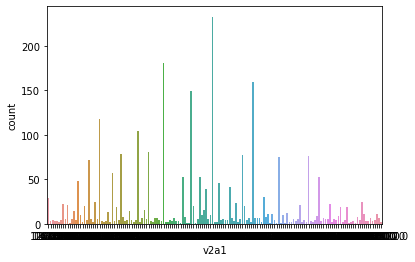

hacdor


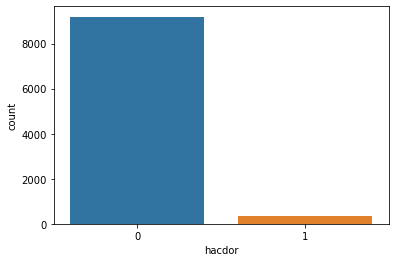

rooms


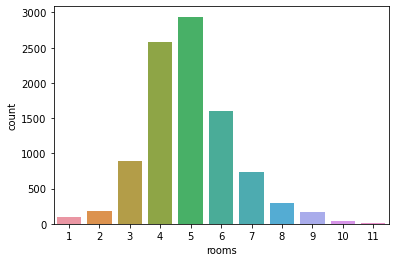

hacapo


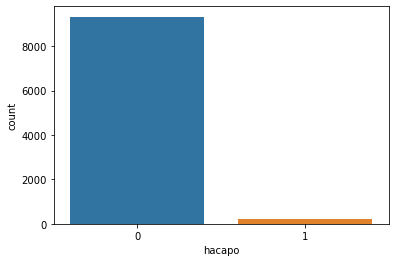

v14a


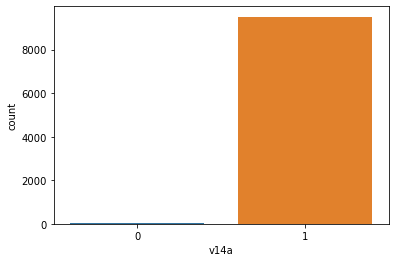

refrig


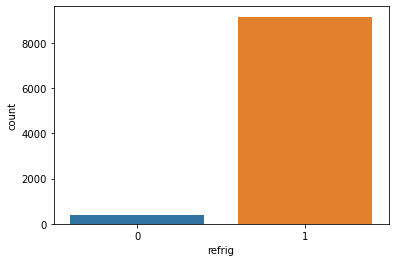

v18q


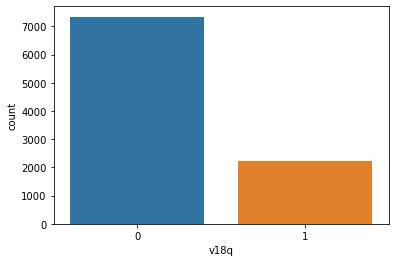

v18q1


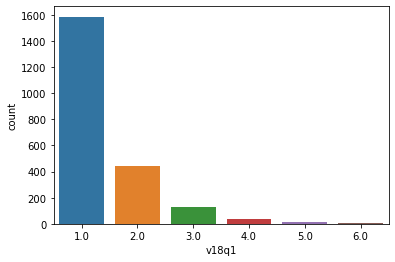

r4h1


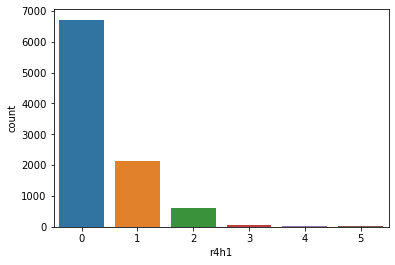

r4h2


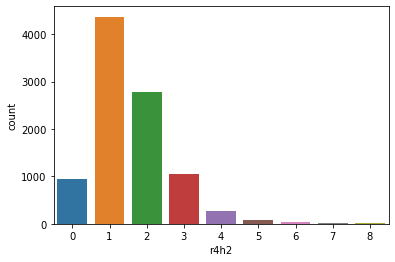

r4h3


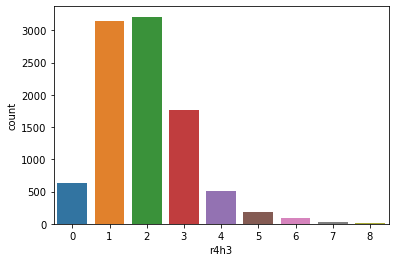

r4m1


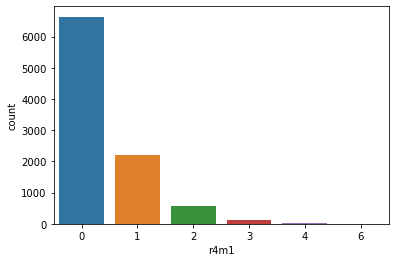

r4m2


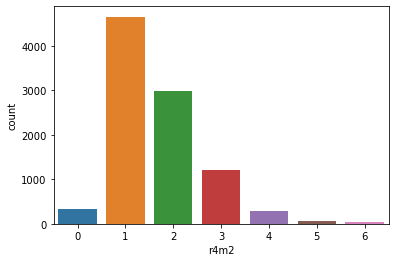

r4m3


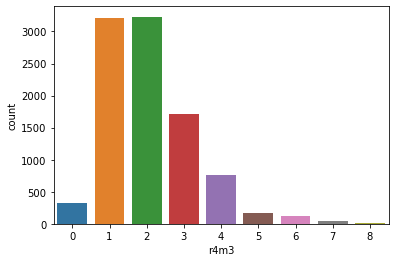

r4t1


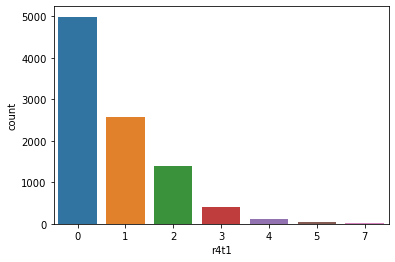

r4t2


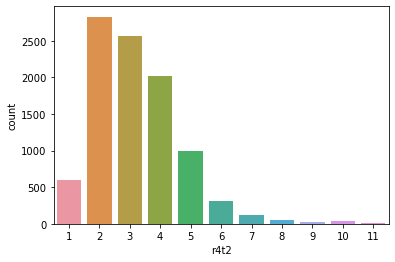

r4t3


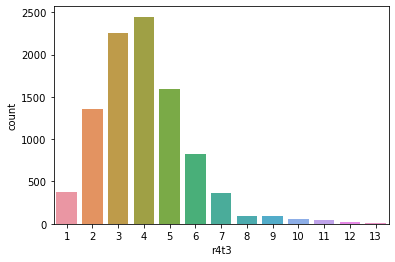

tamhog


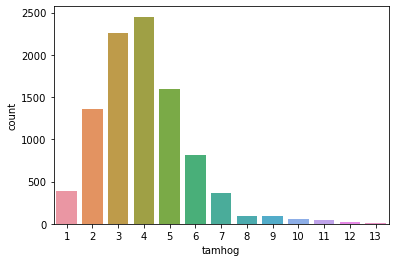

tamviv


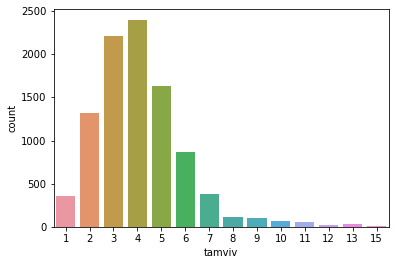

escolari


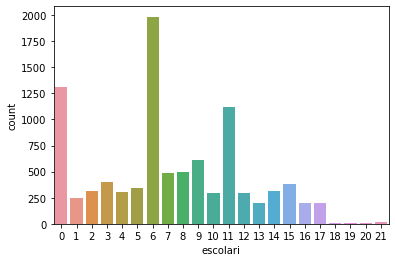

rez_esc


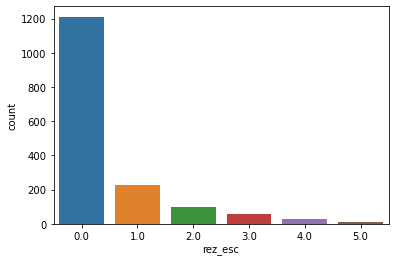

hhsize


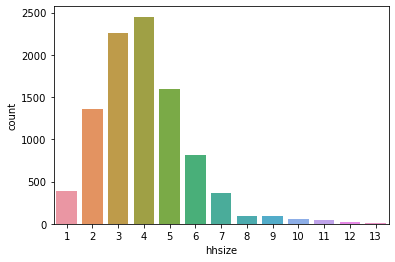

paredblolad


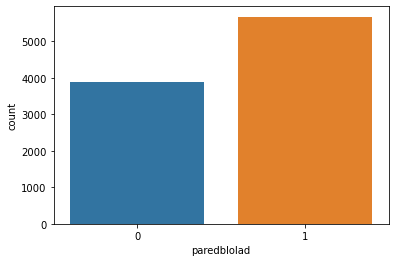

paredzocalo


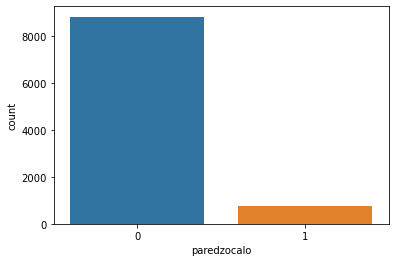

paredpreb


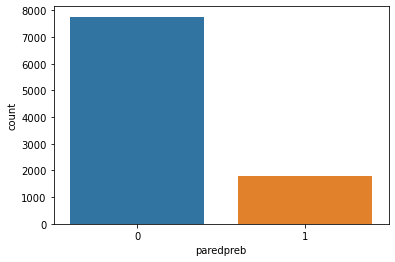

pareddes


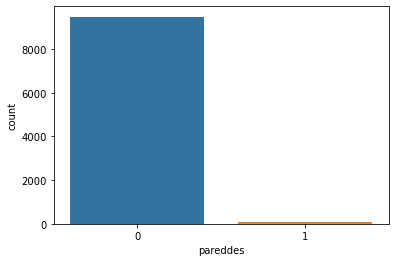

paredmad


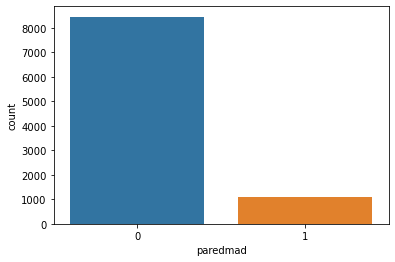

paredzinc


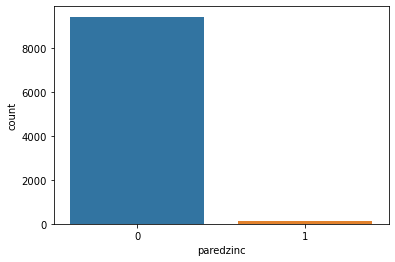

paredfibras


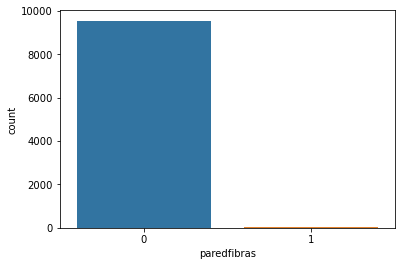

paredother


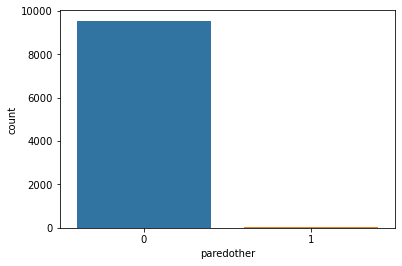

pisomoscer


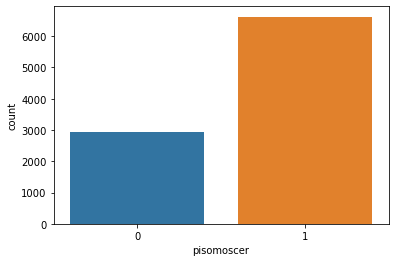

pisocemento


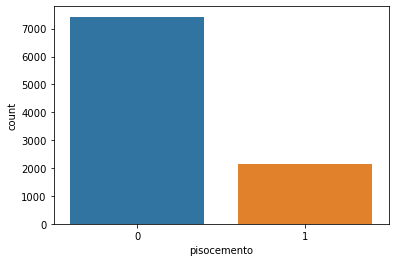

pisoother


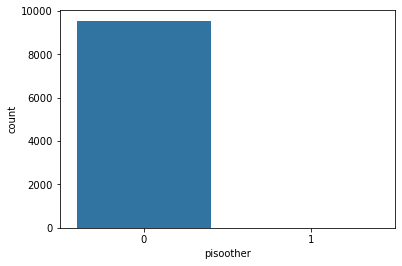

pisonatur


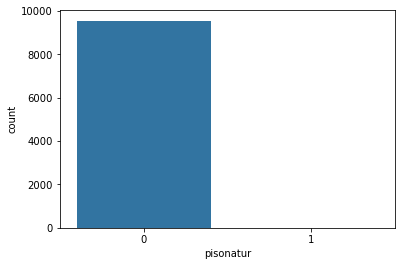

pisonotiene


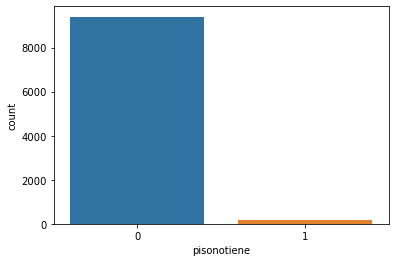

pisomadera


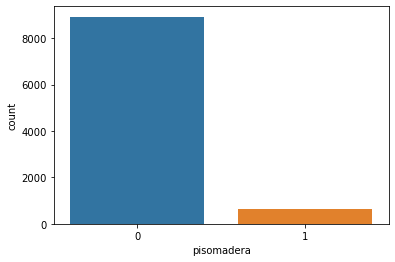

techozinc


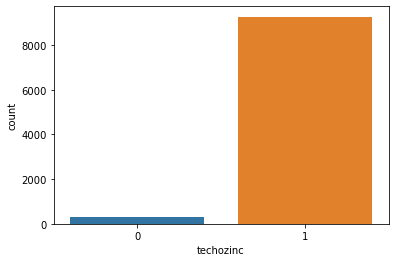

techoentrepiso


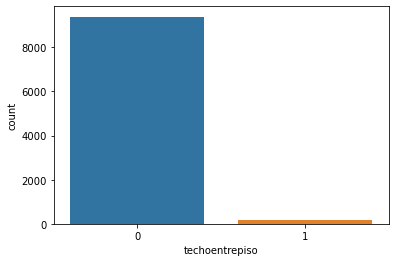

techocane


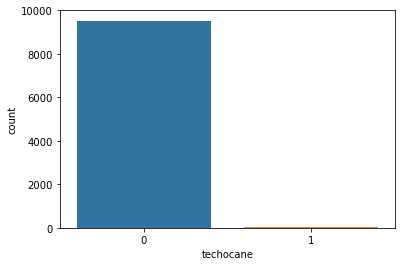

techootro


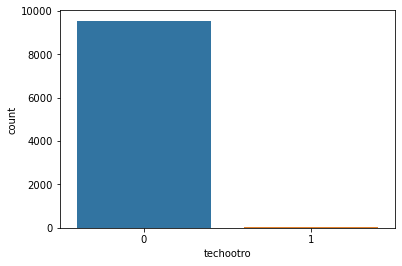

cielorazo


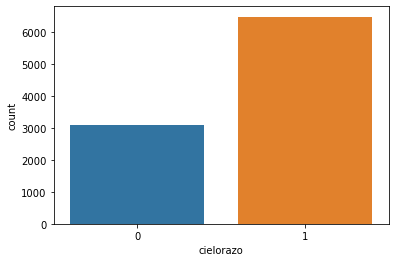

abastaguadentro


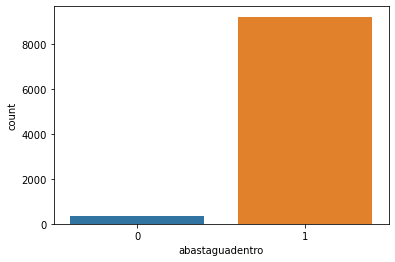

abastaguafuera


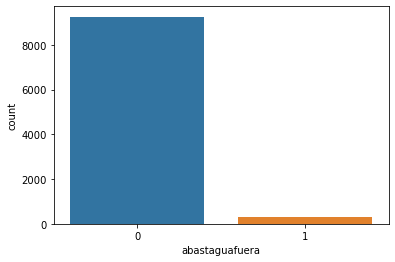

abastaguano


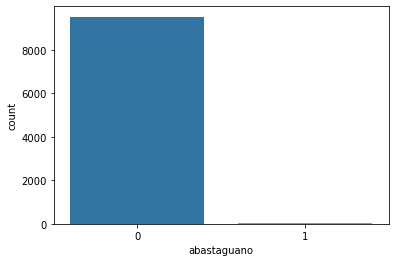

public


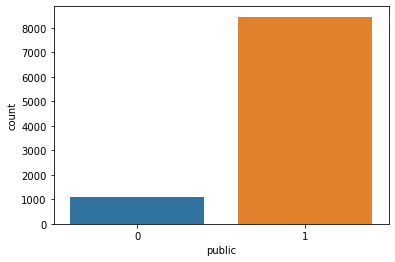

planpri


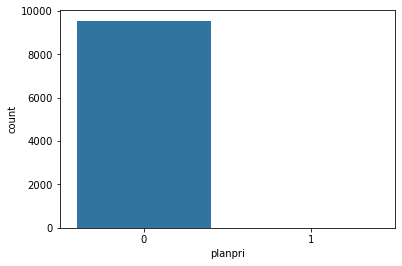

noelec


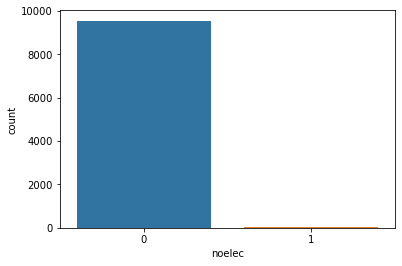

coopele


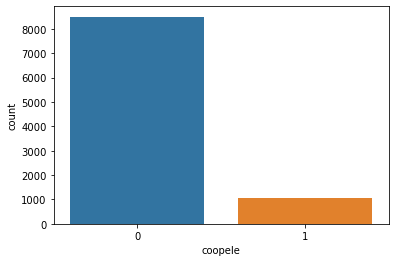

sanitario1


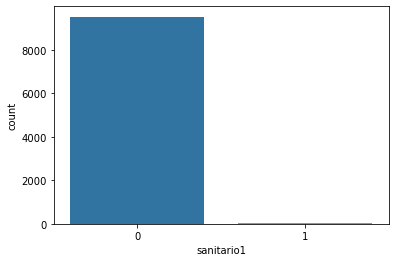

sanitario2


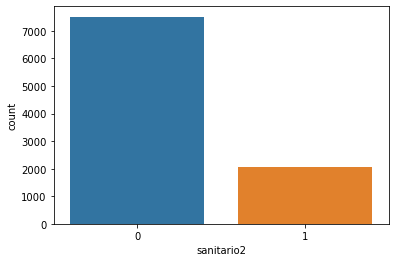

sanitario3


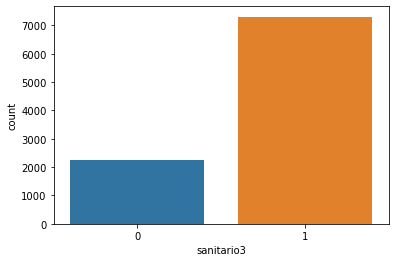

sanitario5


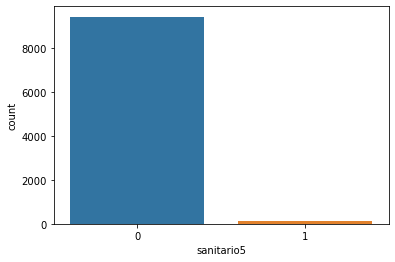

sanitario6


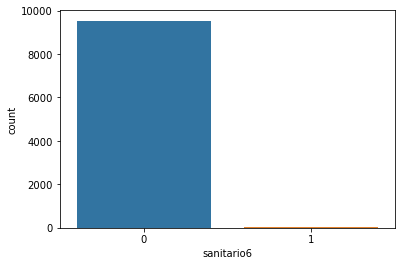

energcocinar1


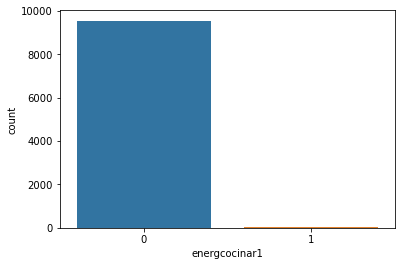

energcocinar2


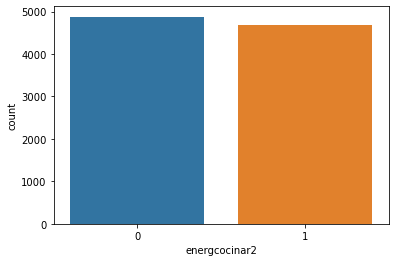

energcocinar3


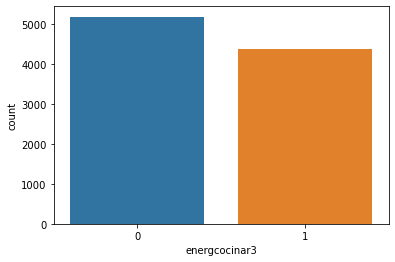

energcocinar4


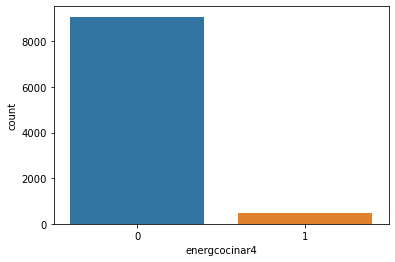

elimbasu1


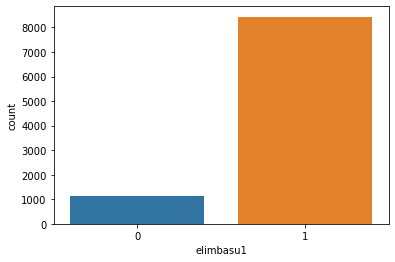

elimbasu2


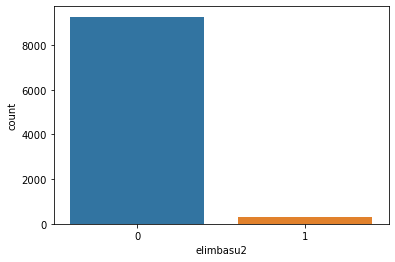

elimbasu3


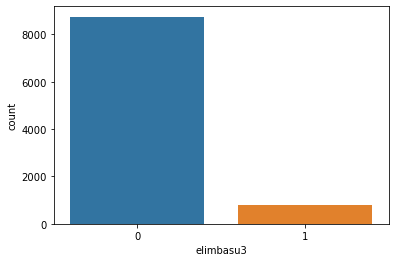

elimbasu4


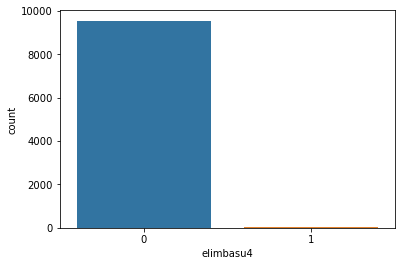

elimbasu5


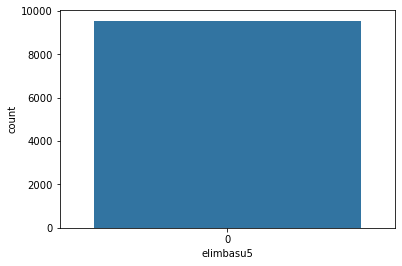

elimbasu6


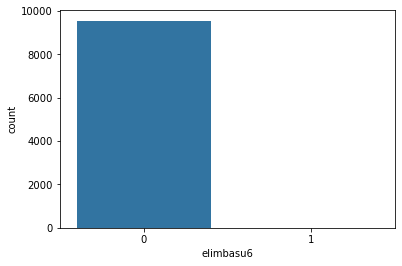

epared1


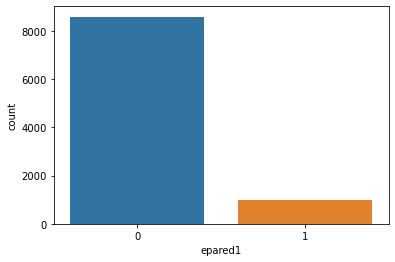

epared2


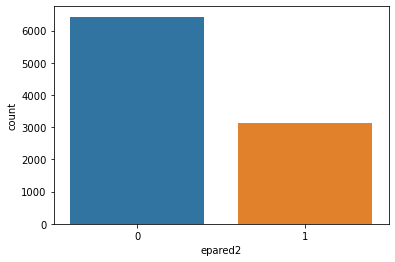

epared3


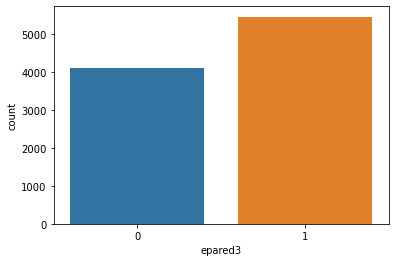

etecho1


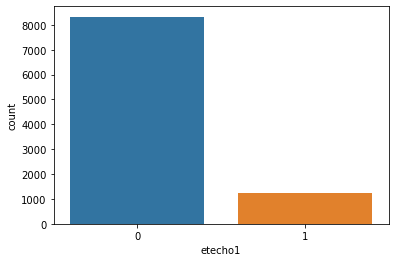

etecho2


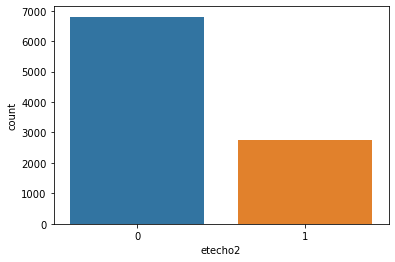

etecho3


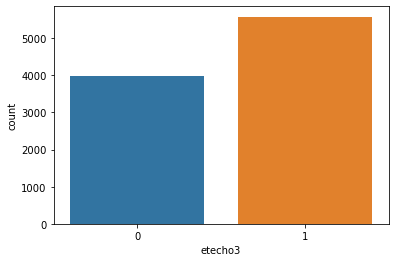

eviv1


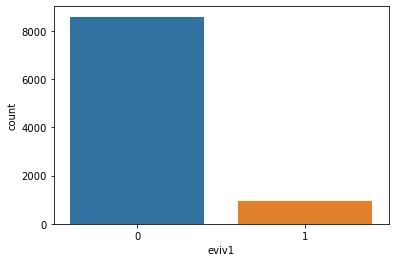

eviv2


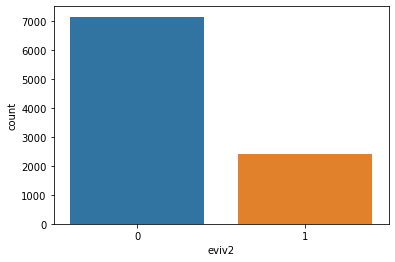

eviv3


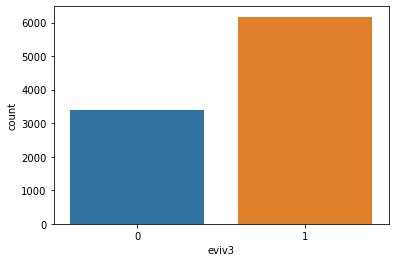

dis


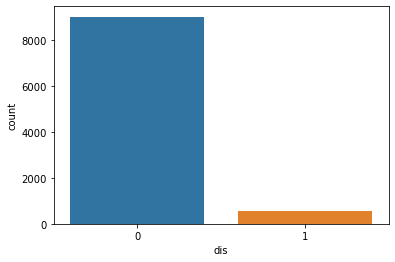

male


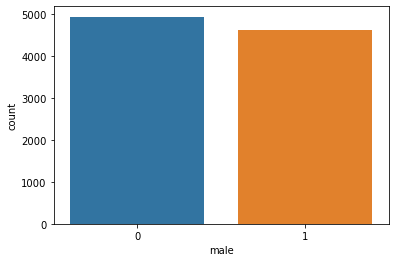

female


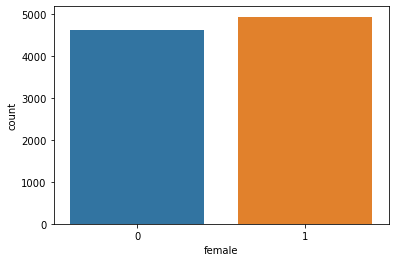

estadocivil1


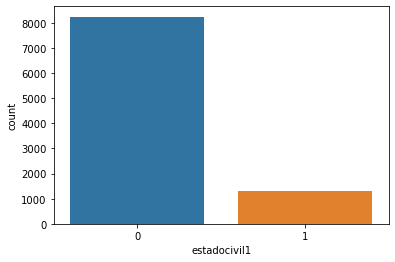

estadocivil2


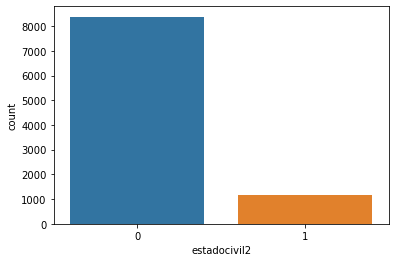

estadocivil3


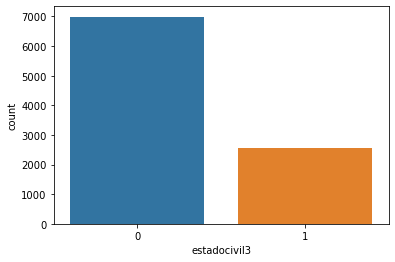

estadocivil4


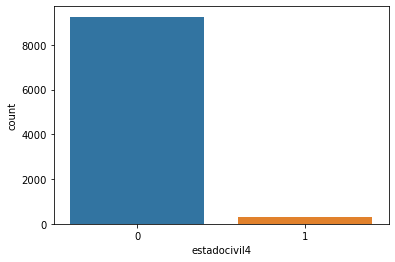

estadocivil5


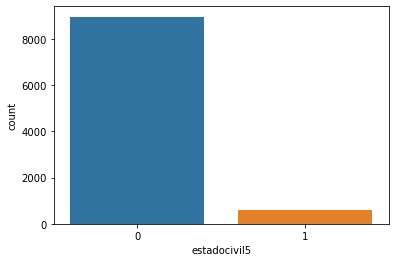

estadocivil6


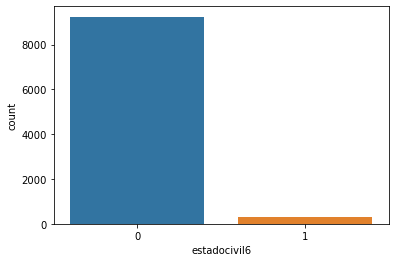

estadocivil7


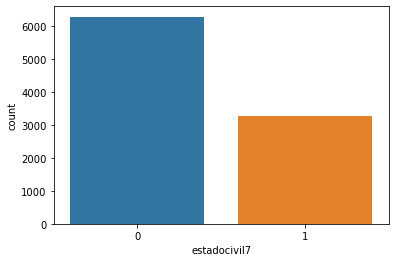

parentesco1


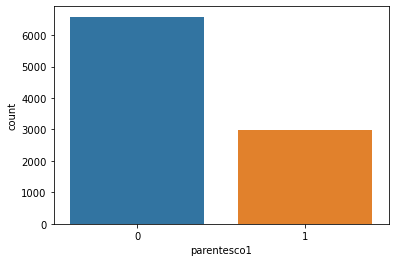

parentesco2


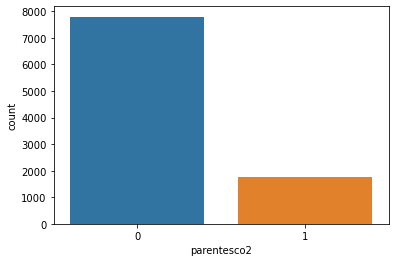

parentesco3


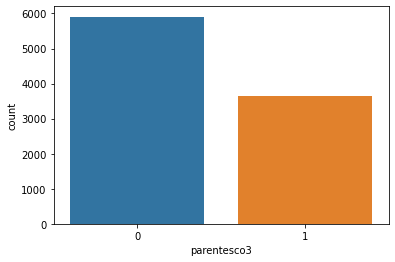

parentesco4


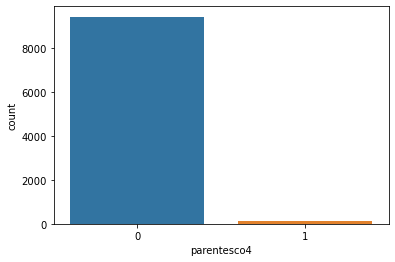

parentesco5


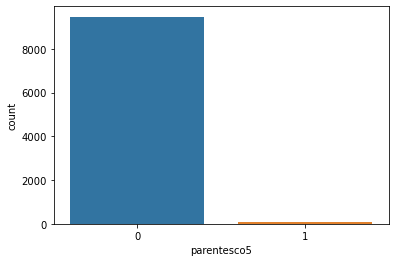

parentesco6


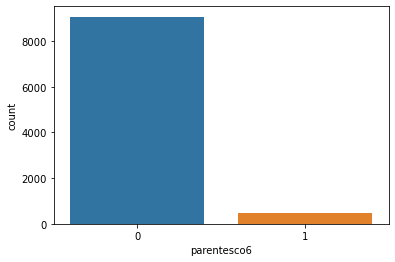

parentesco7


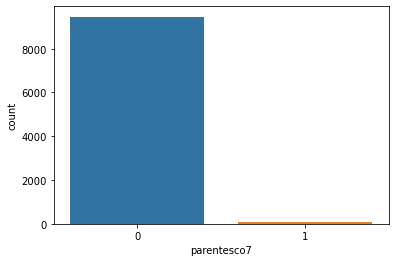

parentesco8


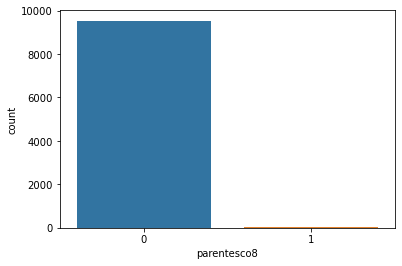

parentesco9


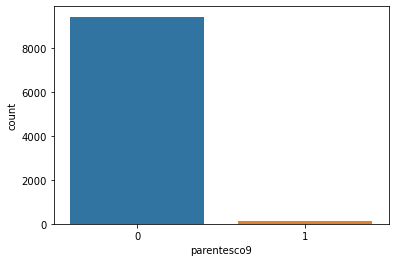

parentesco10


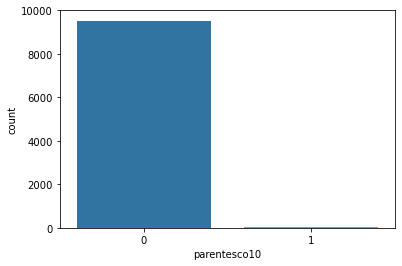

parentesco11


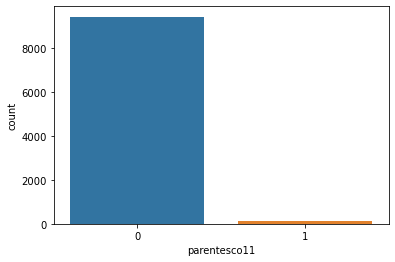

parentesco12


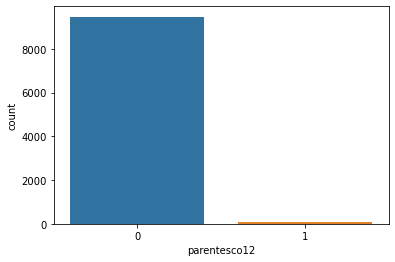

hogar_nin


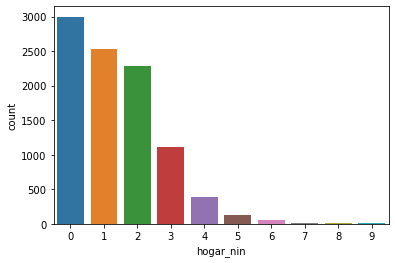

hogar_adul


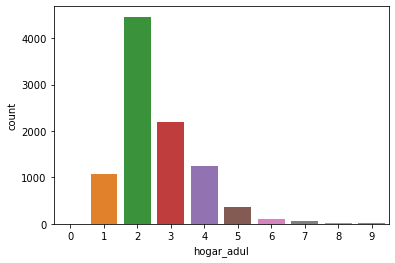

hogar_mayor


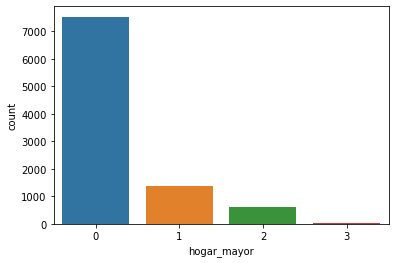

hogar_total


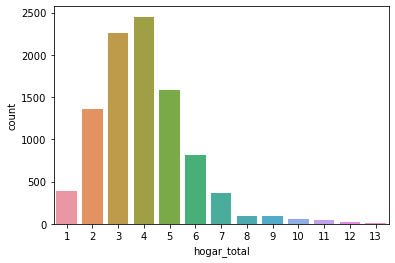

dependency


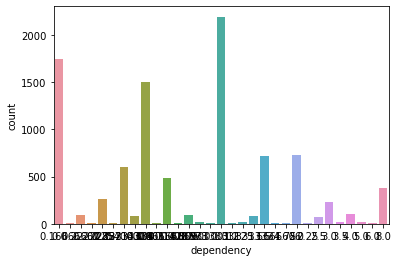

edjefe


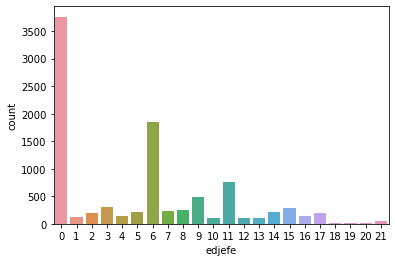

edjefa


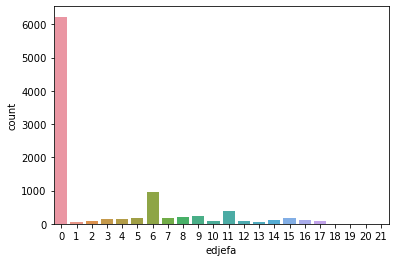

meaneduc


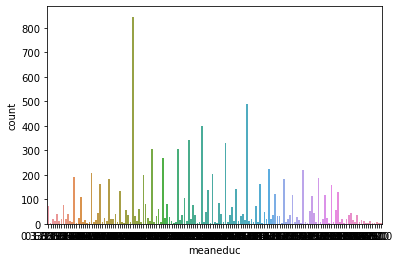

instlevel1


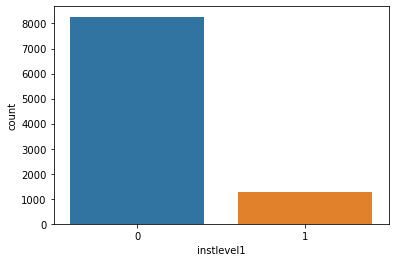

instlevel2


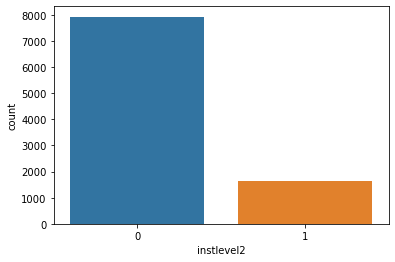

instlevel3


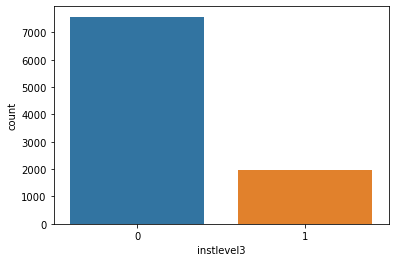

instlevel4


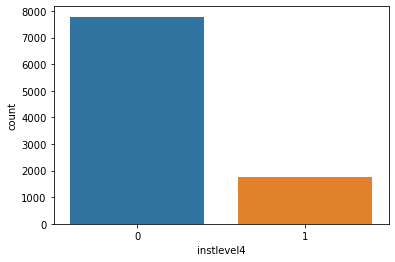

instlevel5


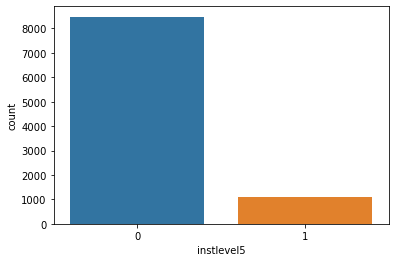

instlevel6


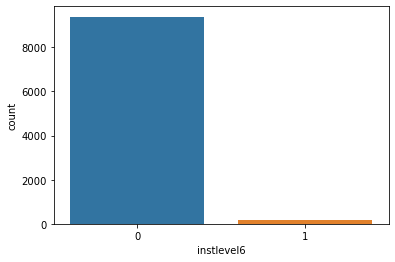

instlevel7


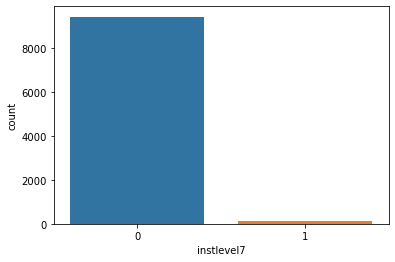

instlevel8


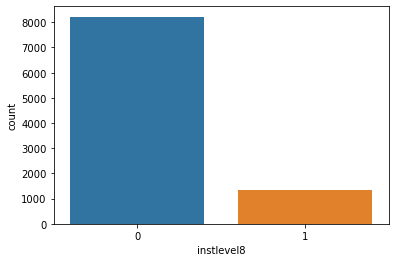

instlevel9


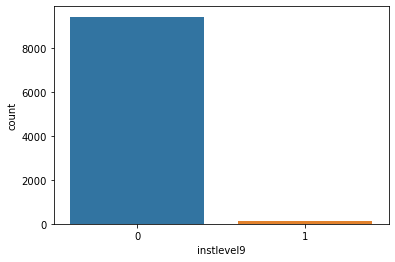

bedrooms


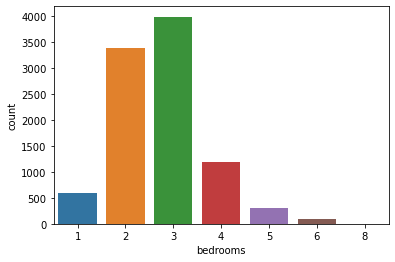

overcrowding


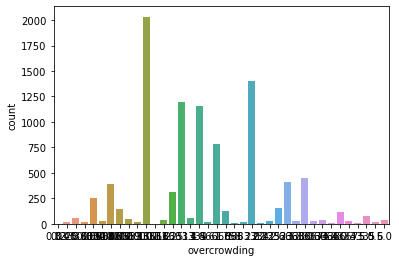

tipovivi1


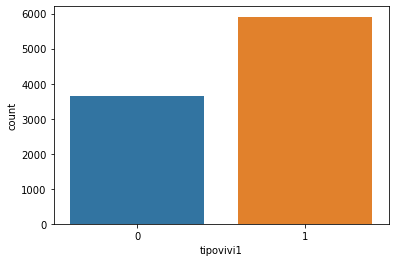

tipovivi2


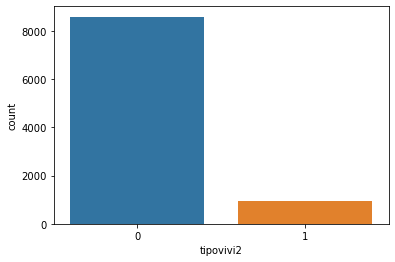

tipovivi3


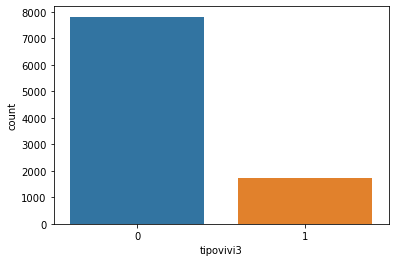

tipovivi4


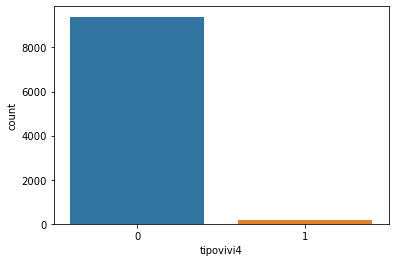

tipovivi5


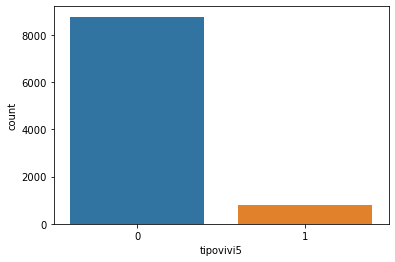

computer


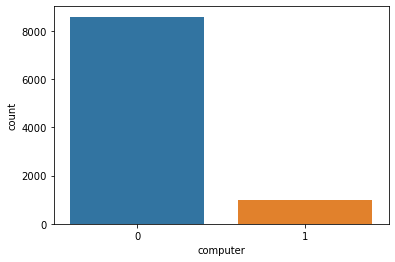

television


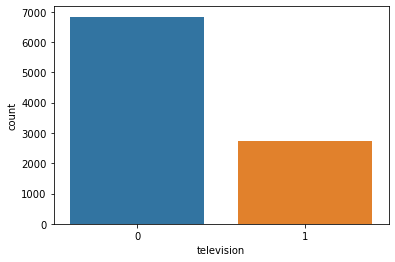

mobilephone


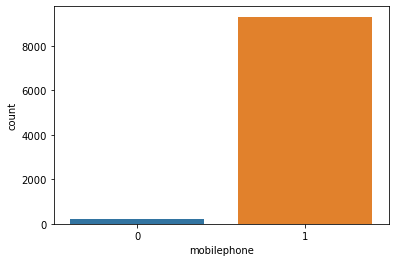

qmobilephone


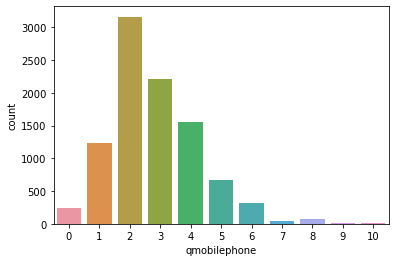

lugar1


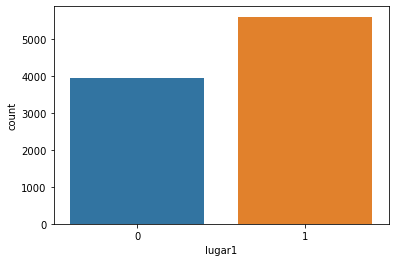

lugar2


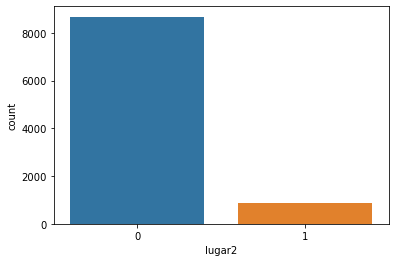

lugar3


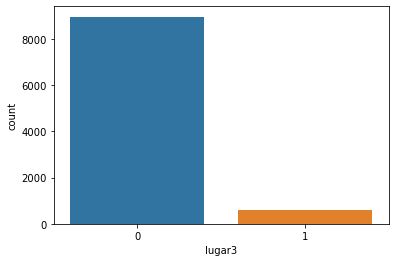

lugar4


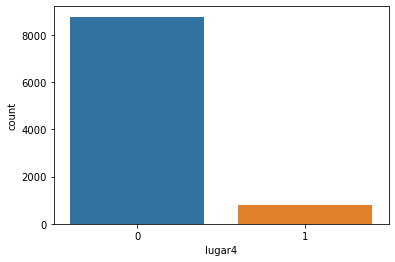

lugar5


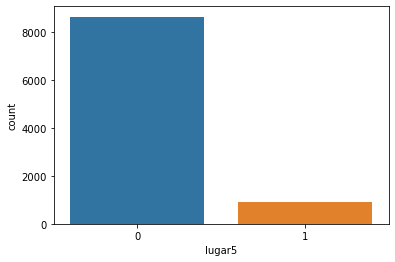

lugar6


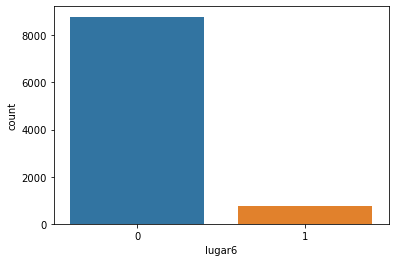

area1


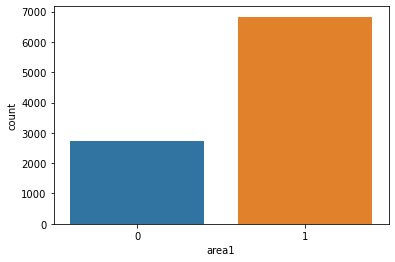

area2


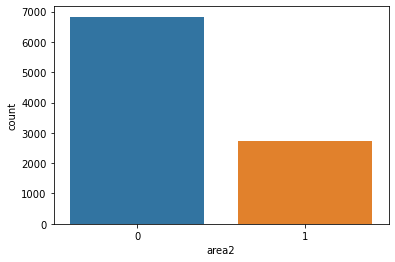

age


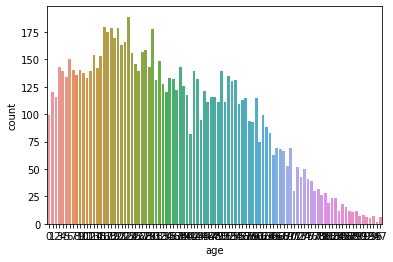

SQBescolari


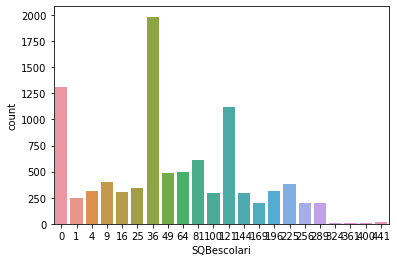

SQBage


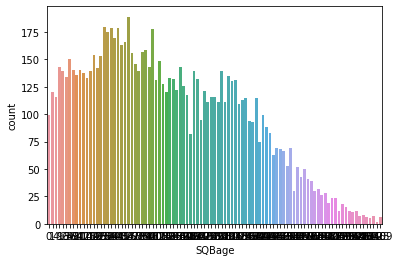

SQBhogar_total


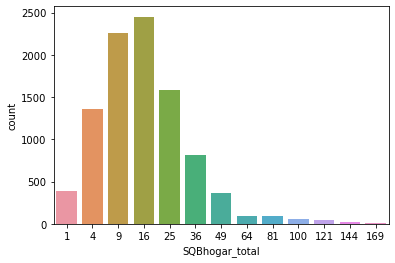

SQBedjefe


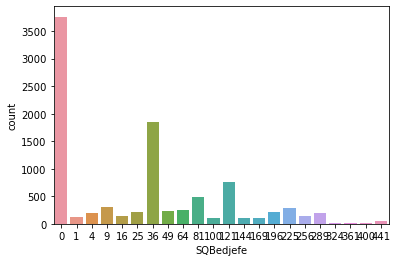

SQBhogar_nin


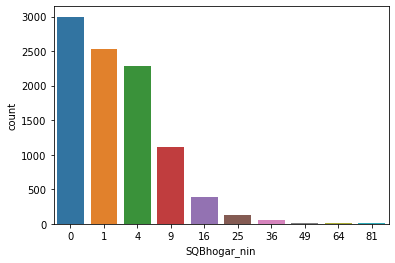

SQBovercrowding


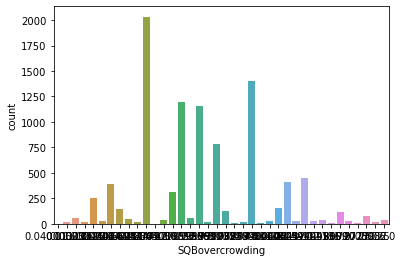

SQBdependency


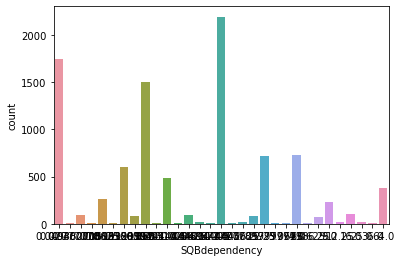

SQBmeaned


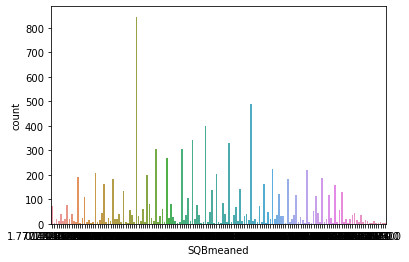

agesq


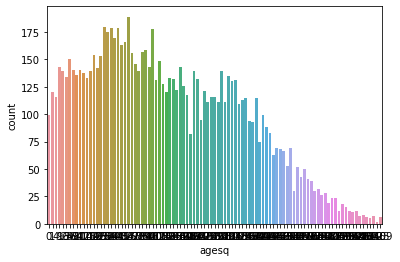

Target


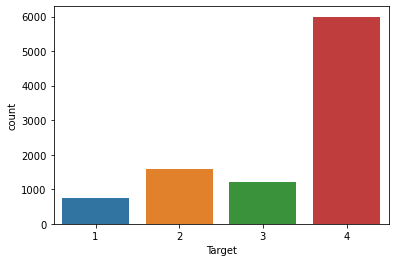

In [45]:
bias(df_tr)

#I see more variables has bias.
#Eg: variable hacapo has 8500+ has denoted as 0 and less than 500 has denoted as 1.
#Eg: for Target variable i see more records with 4 compare to 1,2 and 3. Will try to use smote techinque to overcome.

v2a1


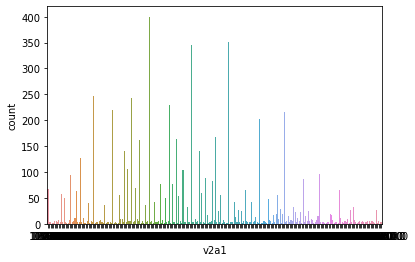

hacdor


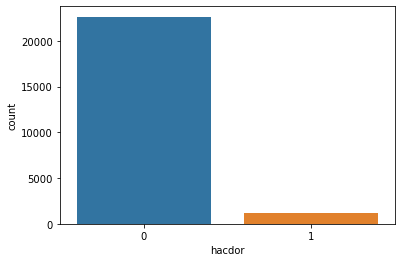

rooms


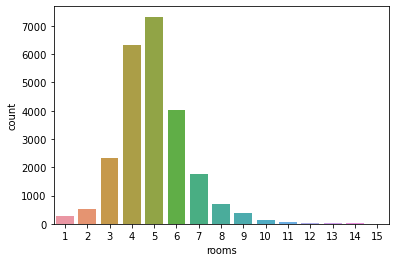

hacapo


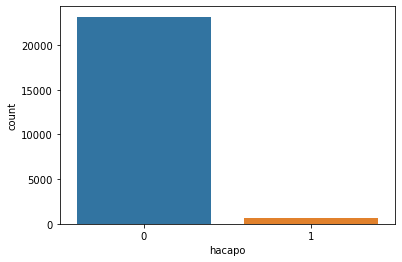

v14a


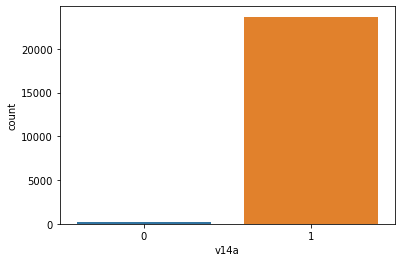

refrig


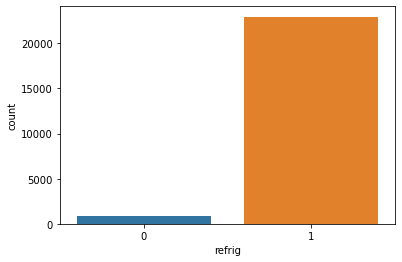

v18q


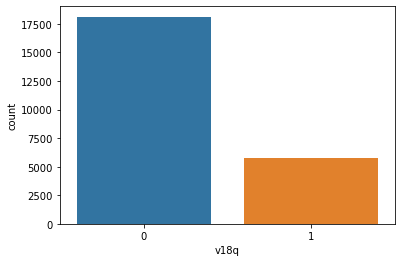

v18q1


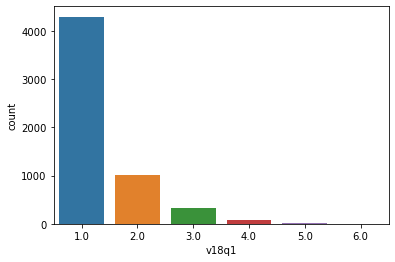

r4h1


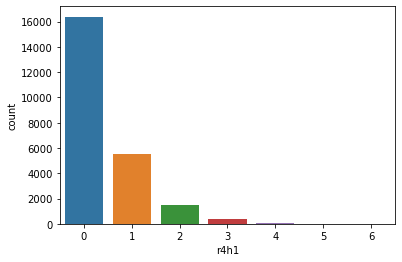

r4h2


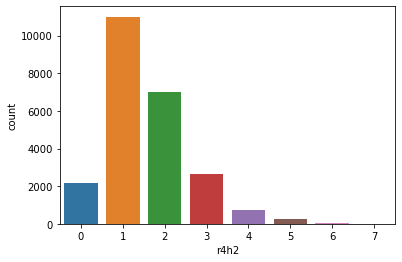

r4h3


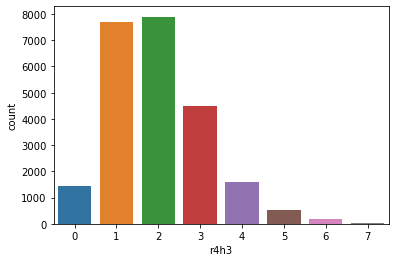

r4m1


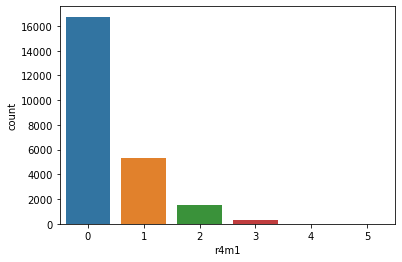

r4m2


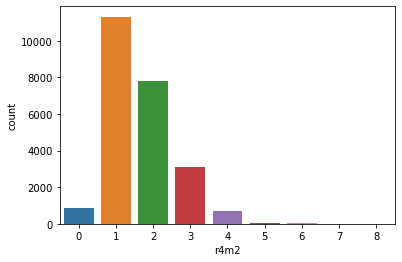

r4m3


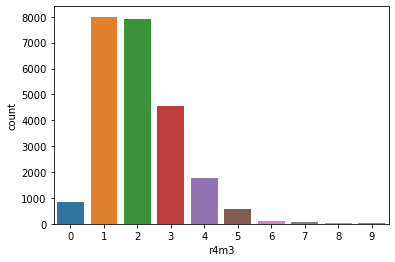

r4t1


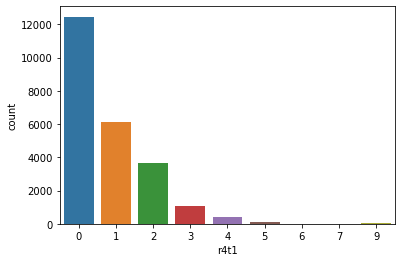

r4t2


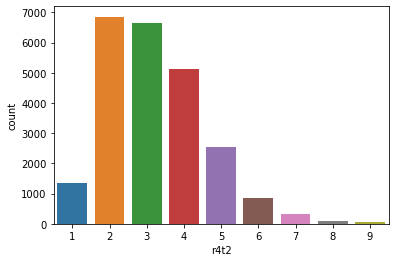

r4t3


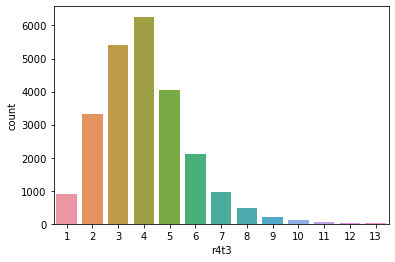

tamhog


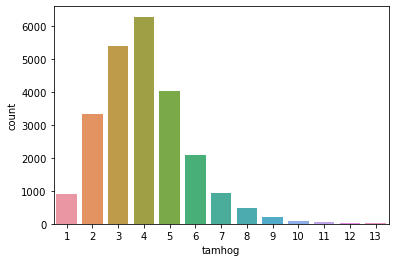

tamviv


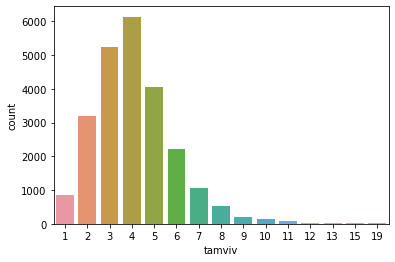

escolari


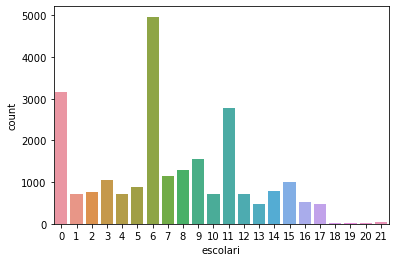

rez_esc


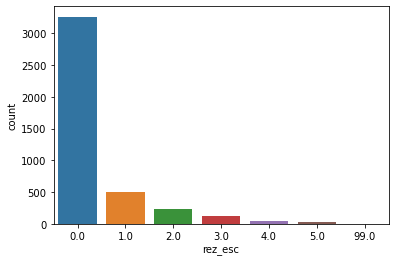

hhsize


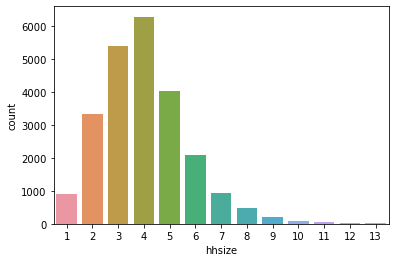

paredblolad


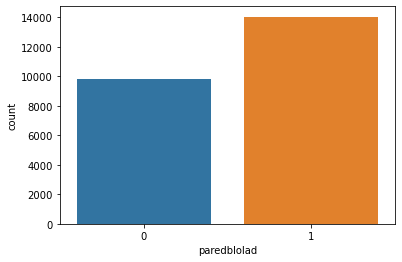

paredzocalo


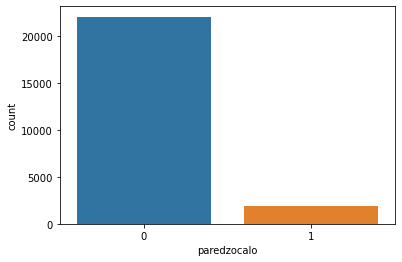

paredpreb


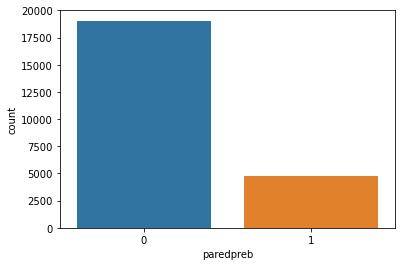

pareddes


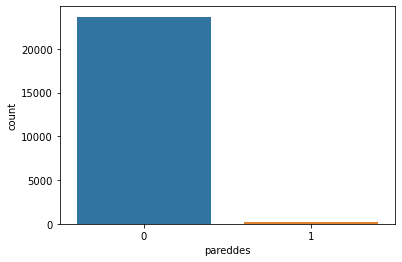

paredmad


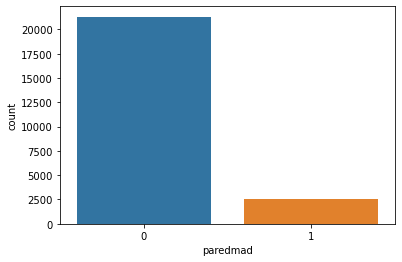

paredzinc


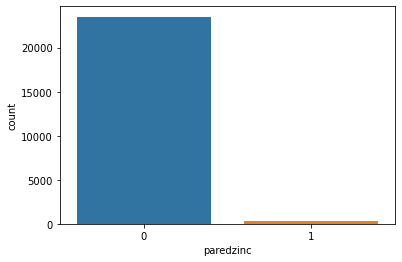

paredfibras


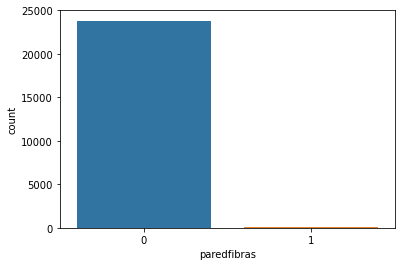

paredother


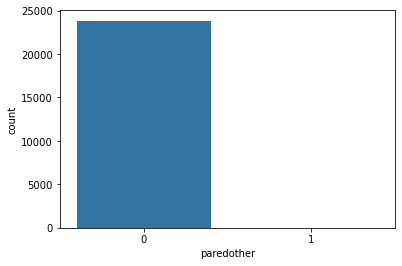

pisomoscer


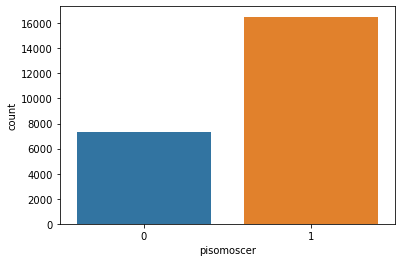

pisocemento


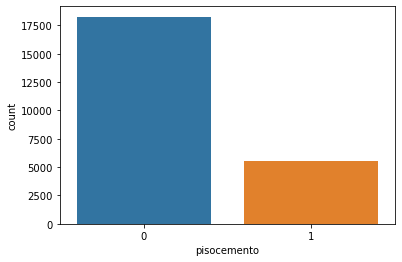

pisoother


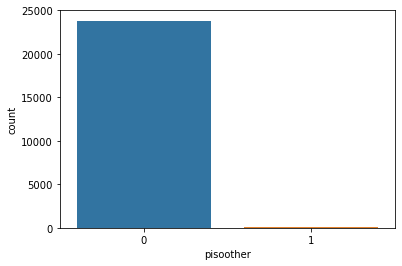

pisonatur


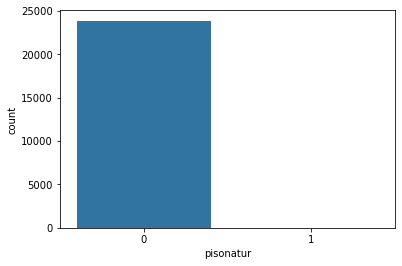

pisonotiene


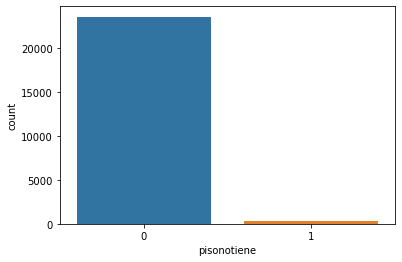

pisomadera


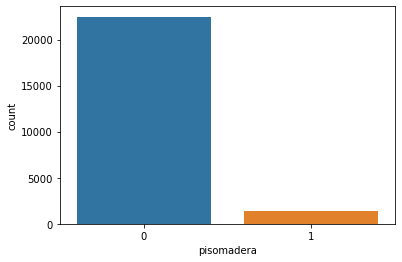

techozinc


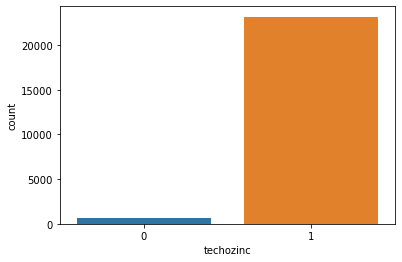

techoentrepiso


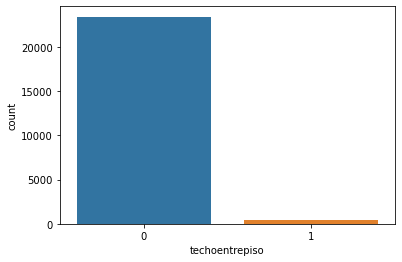

techocane


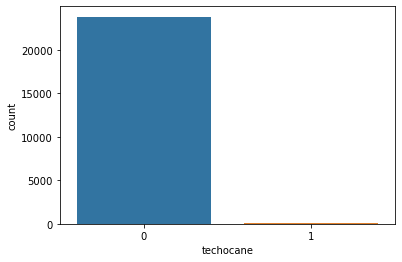

techootro


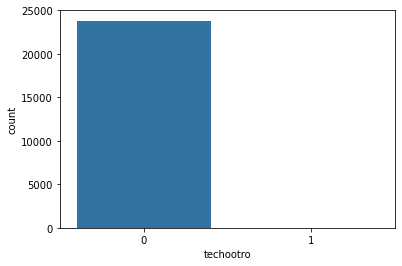

cielorazo


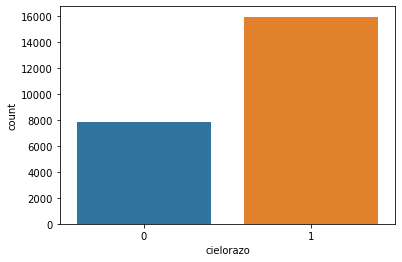

abastaguadentro


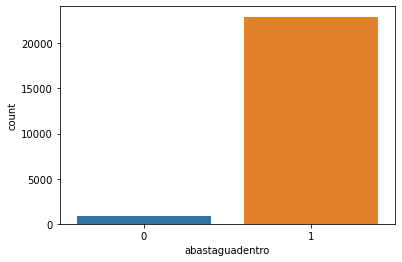

abastaguafuera


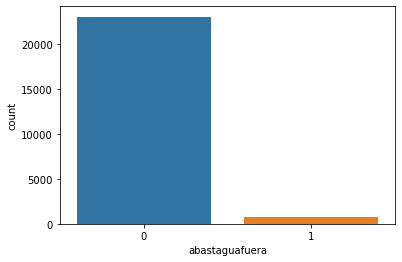

abastaguano


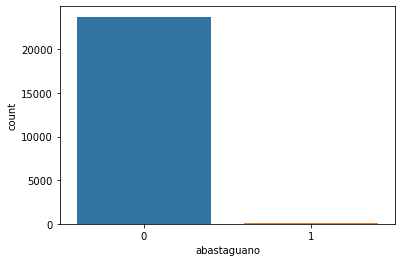

public


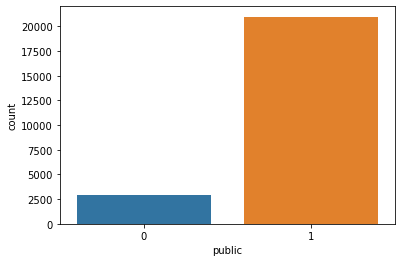

planpri


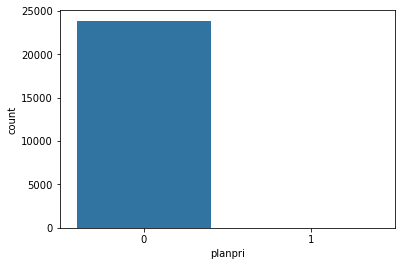

noelec


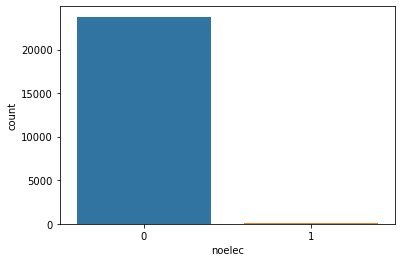

coopele


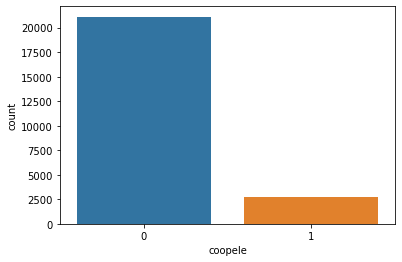

sanitario1


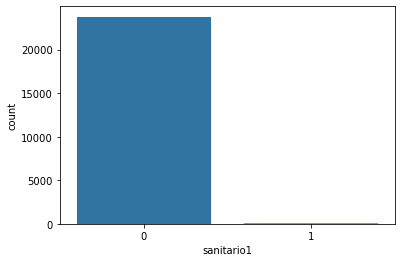

sanitario2


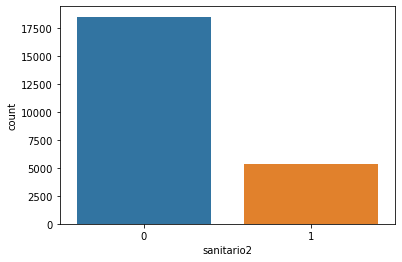

sanitario3


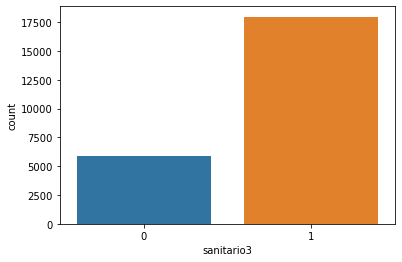

sanitario5


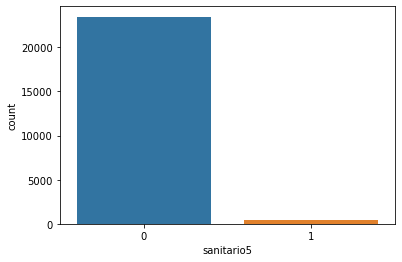

sanitario6


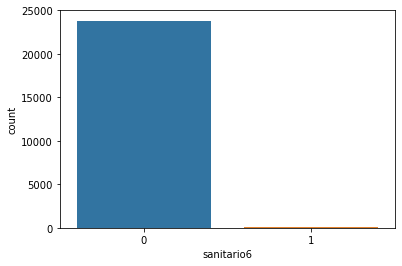

energcocinar1


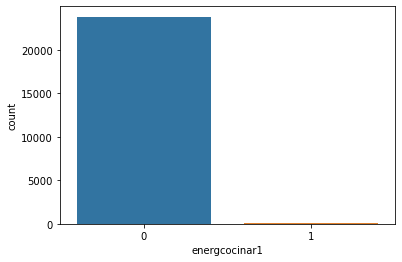

energcocinar2


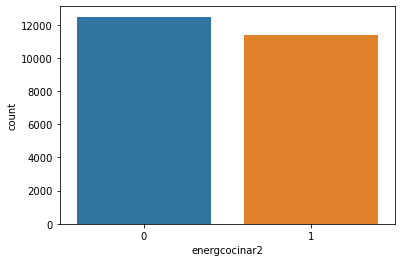

energcocinar3


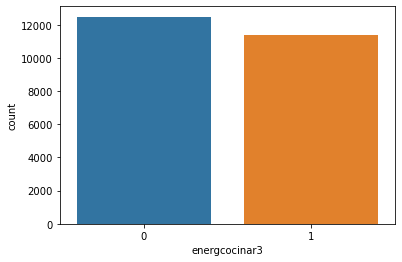

energcocinar4


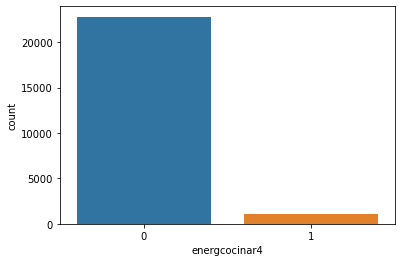

elimbasu1


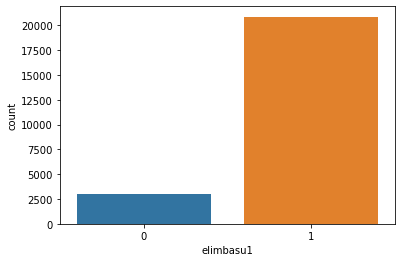

elimbasu2


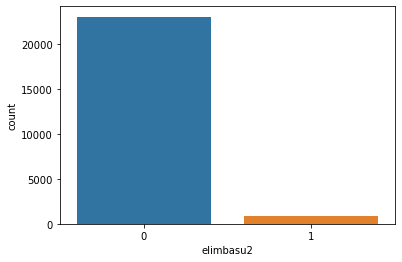

elimbasu3


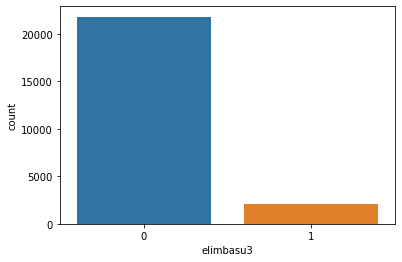

elimbasu4


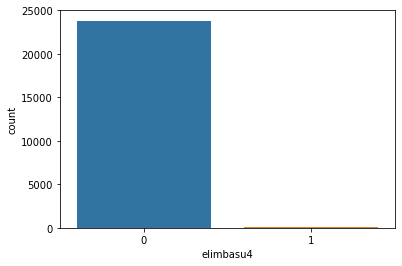

elimbasu5


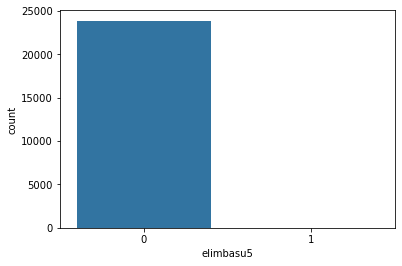

elimbasu6


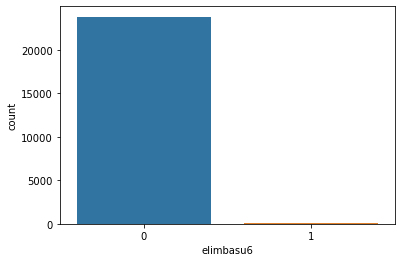

epared1


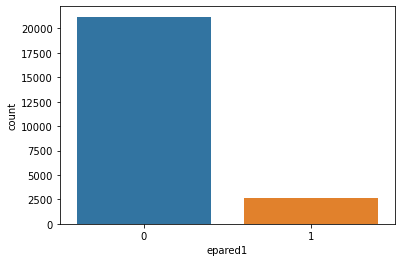

epared2


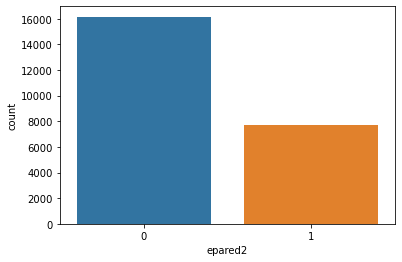

epared3


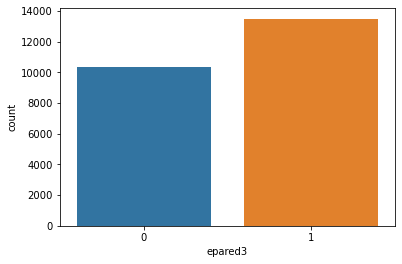

etecho1


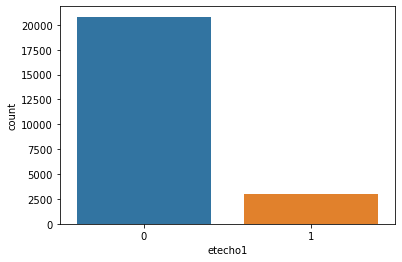

etecho2


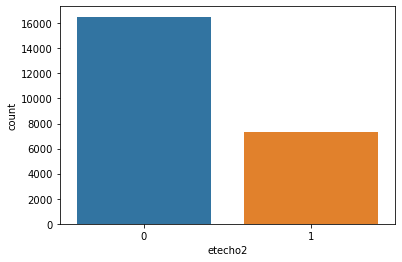

etecho3


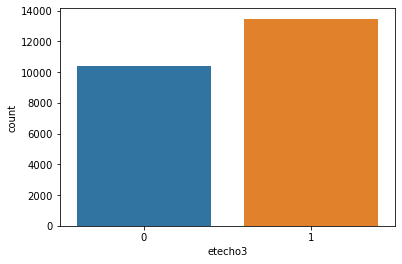

eviv1


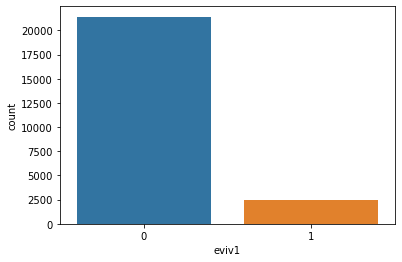

eviv2


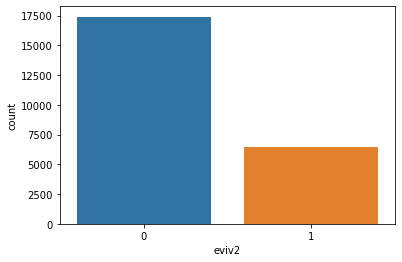

eviv3


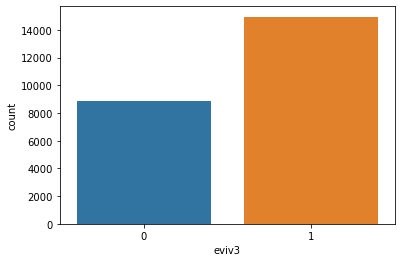

dis


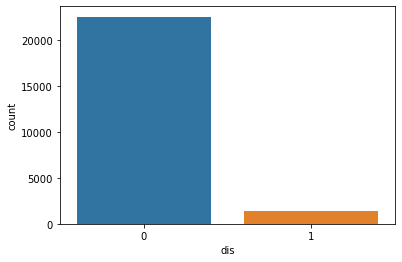

male


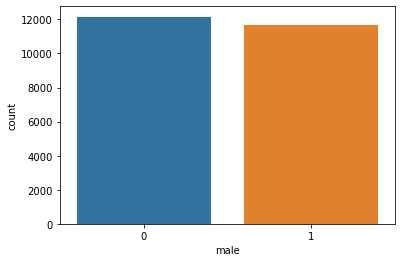

female


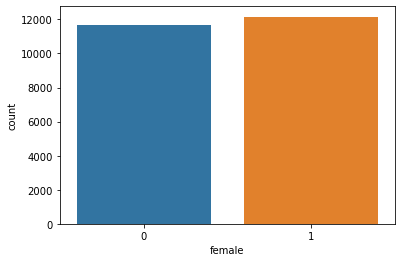

estadocivil1


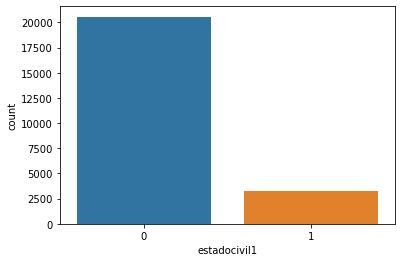

estadocivil2


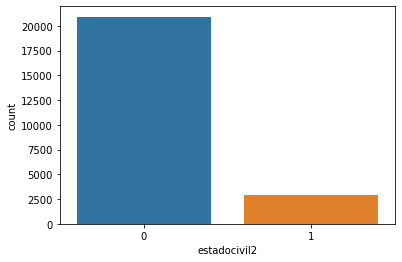

estadocivil3


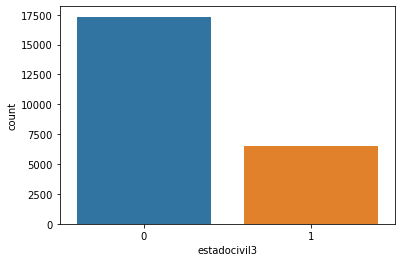

estadocivil4


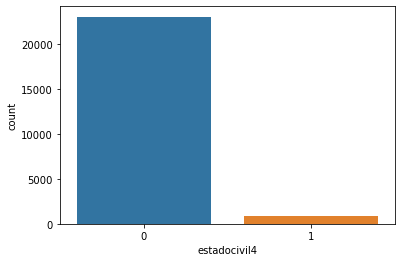

estadocivil5


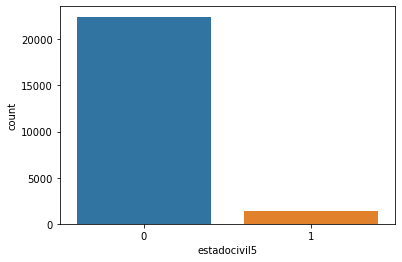

estadocivil6


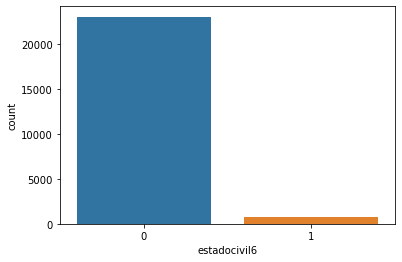

estadocivil7


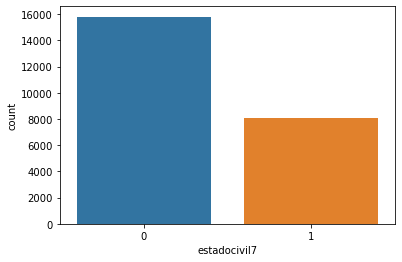

parentesco1


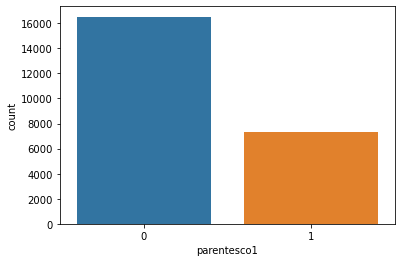

parentesco2


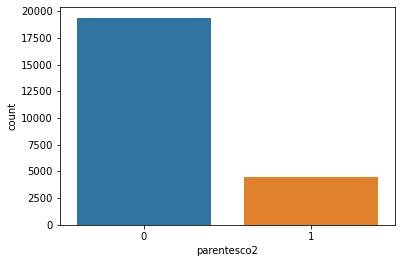

parentesco3


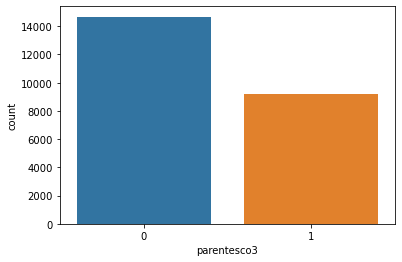

parentesco4


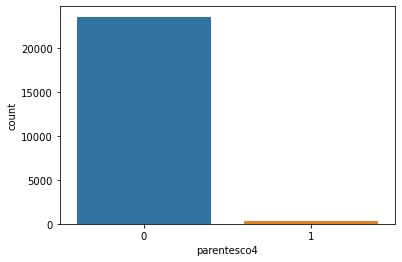

parentesco5


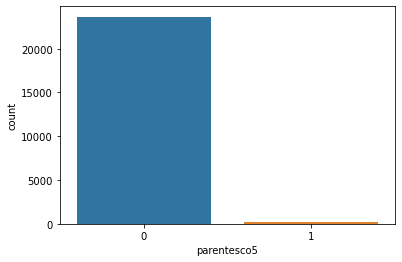

parentesco6


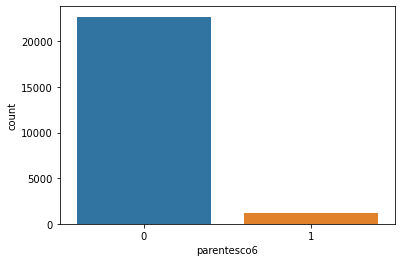

parentesco7


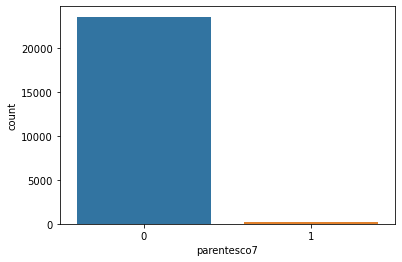

parentesco8


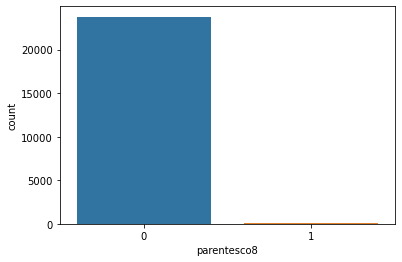

parentesco9


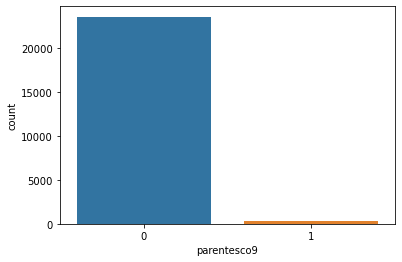

parentesco10


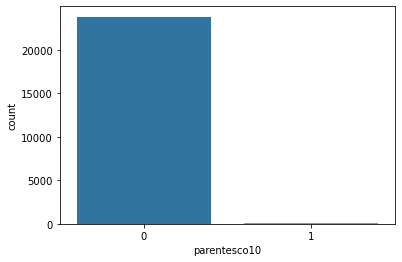

parentesco11


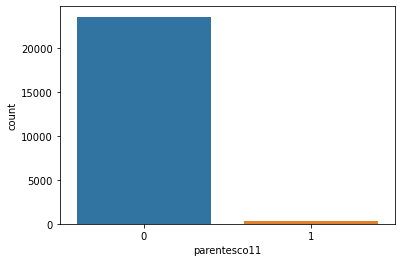

parentesco12


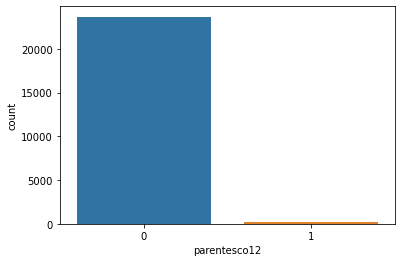

hogar_nin


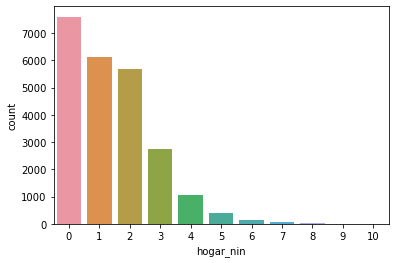

hogar_adul


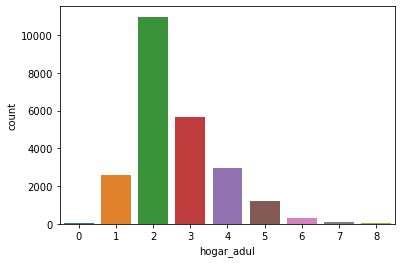

hogar_mayor


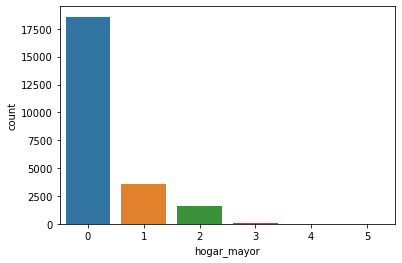

hogar_total


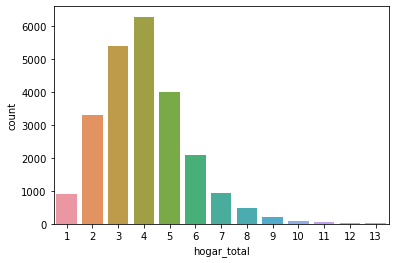

dependency


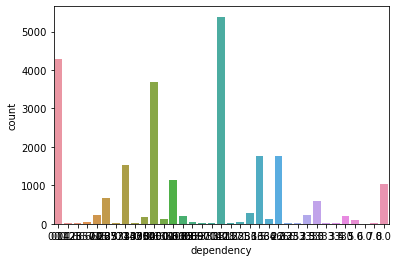

edjefe


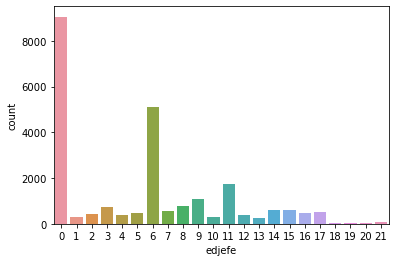

edjefa


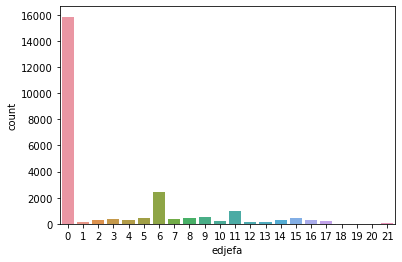

meaneduc


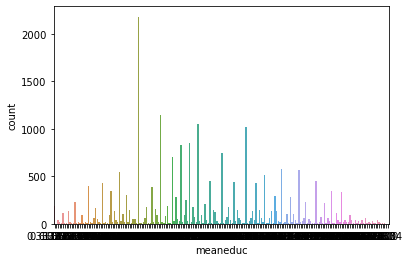

instlevel1


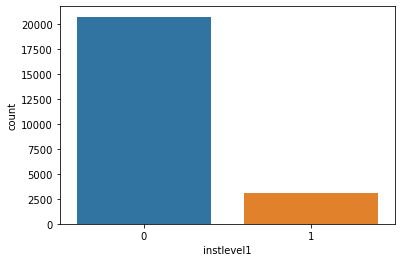

instlevel2


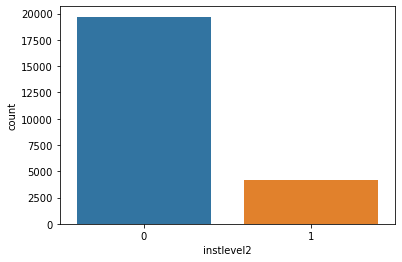

instlevel3


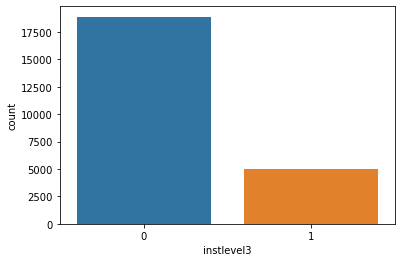

instlevel4


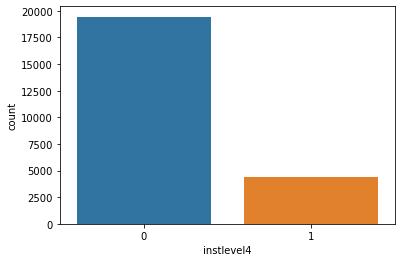

instlevel5


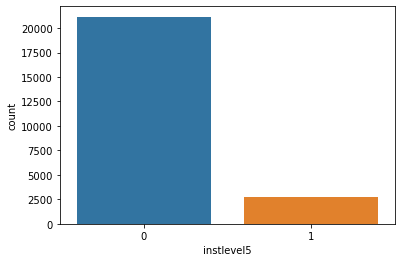

instlevel6


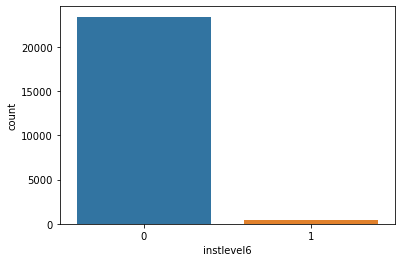

instlevel7


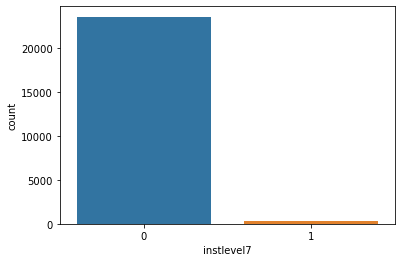

instlevel8


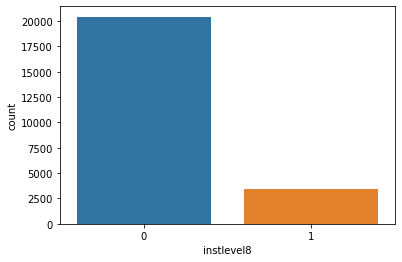

instlevel9


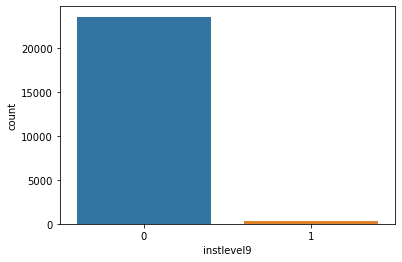

bedrooms


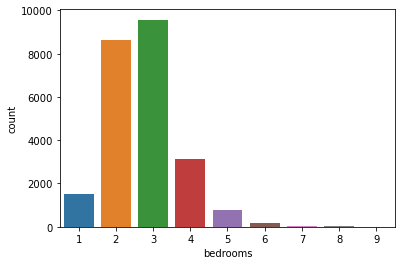

overcrowding


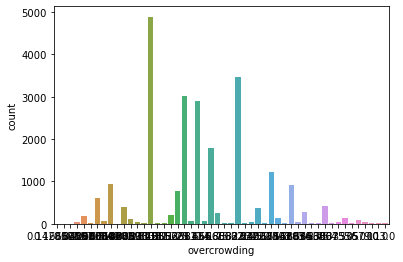

tipovivi1


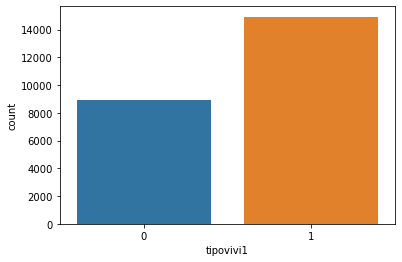

tipovivi2


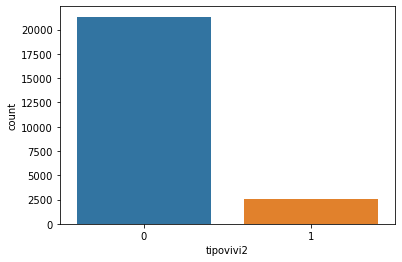

tipovivi3


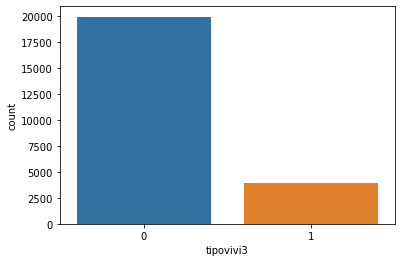

tipovivi4


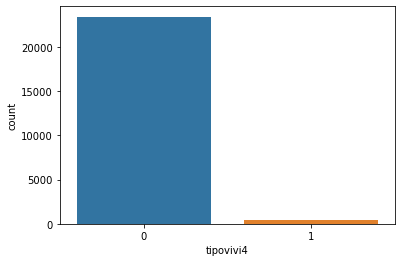

tipovivi5


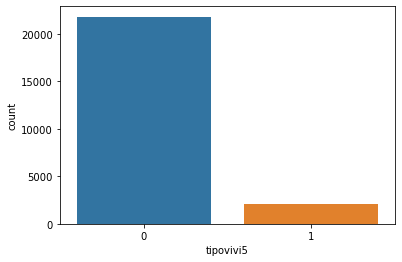

computer


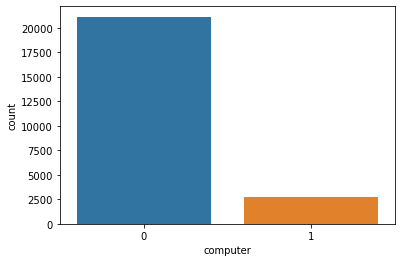

television


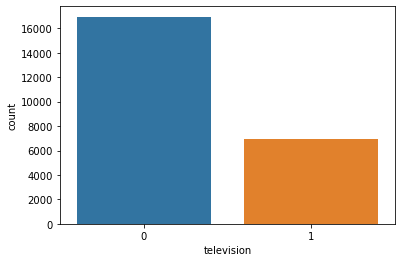

mobilephone


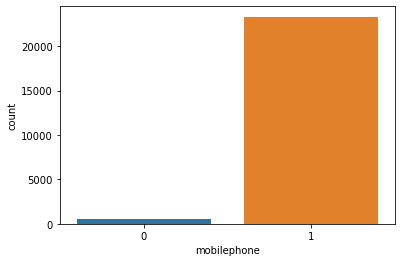

qmobilephone


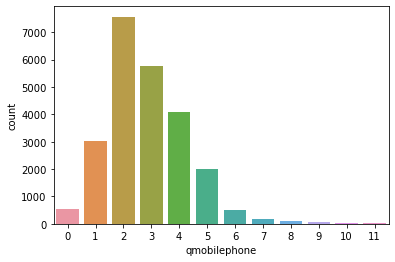

lugar1


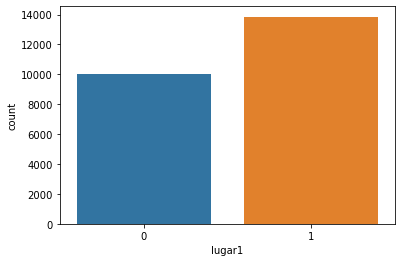

lugar2


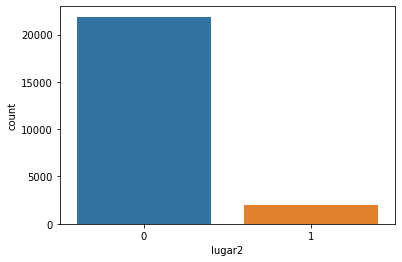

lugar3


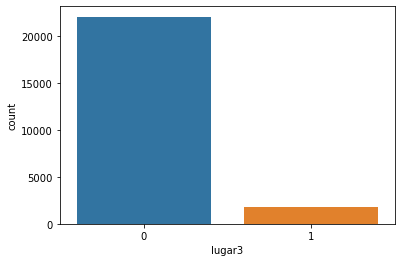

lugar4


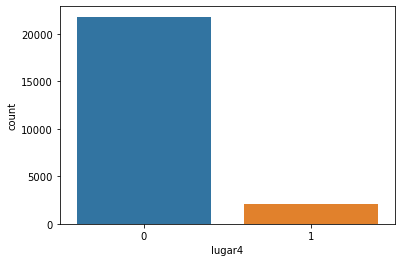

lugar5


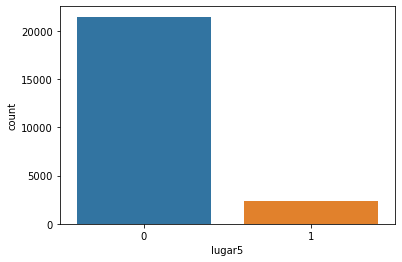

lugar6


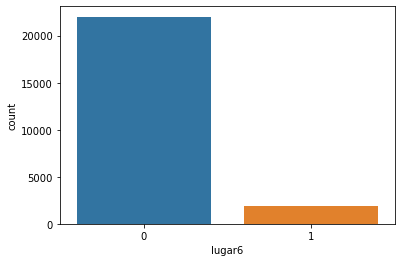

area1


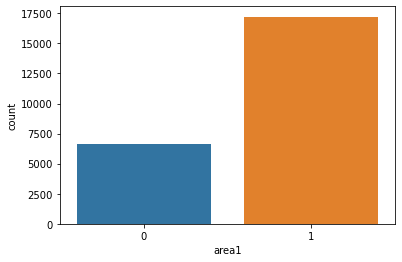

area2


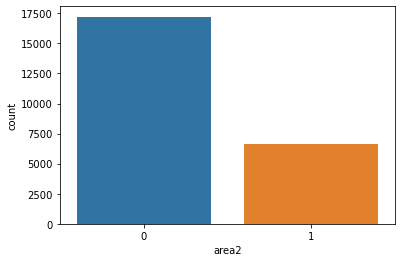

age


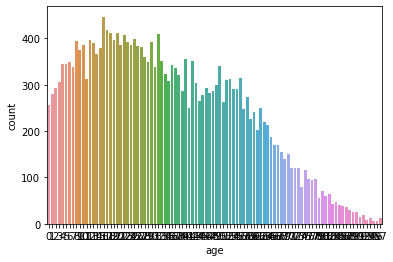

SQBescolari


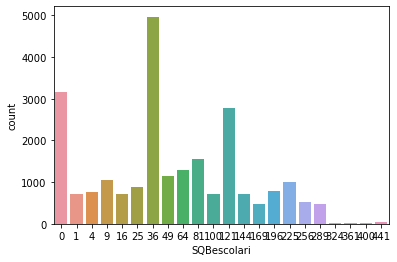

SQBage


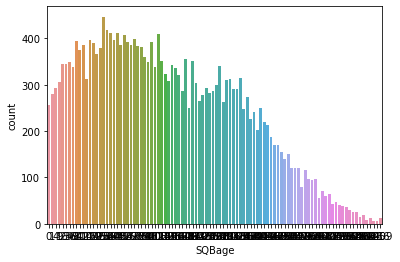

SQBhogar_total


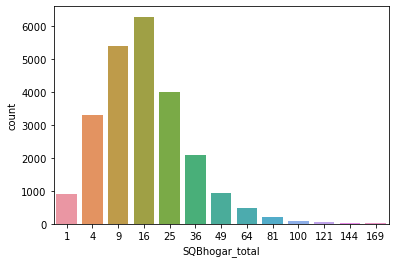

SQBedjefe


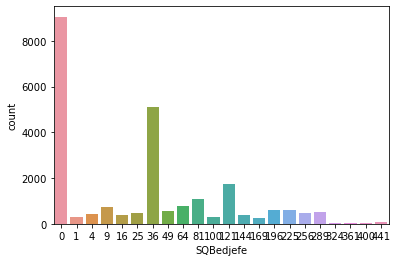

SQBhogar_nin


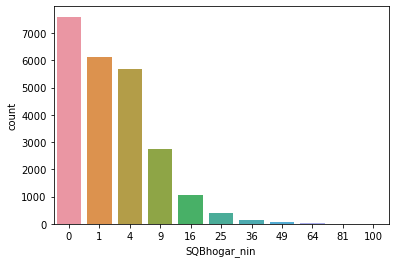

SQBovercrowding


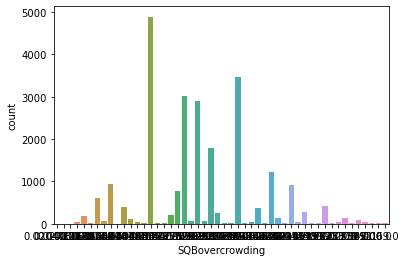

SQBdependency


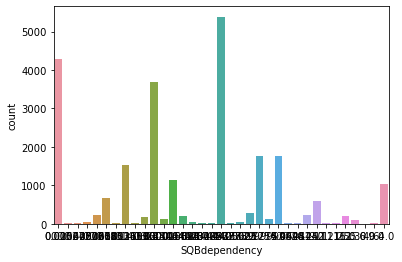

SQBmeaned


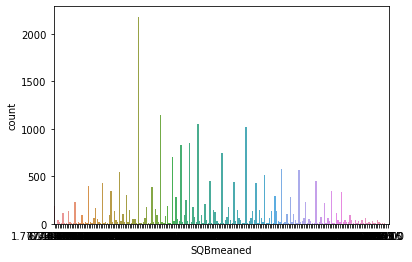

agesq


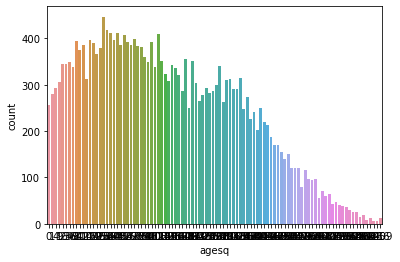

In [46]:
bias(df_te)

In [47]:
#Checking outliers in data

def outliers(n):
    for i in n.columns:
        print(i)
        sns.boxplot(n[i])
        plt.show()

v2a1


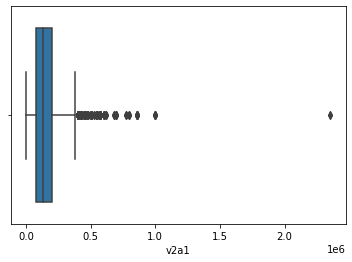

hacdor


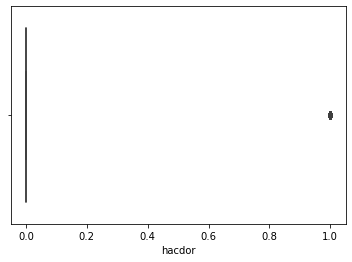

rooms


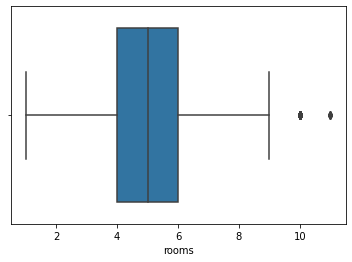

hacapo


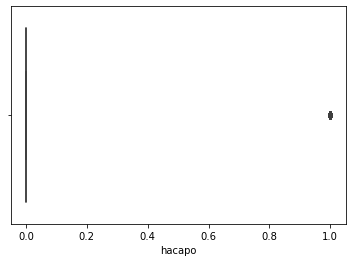

v14a


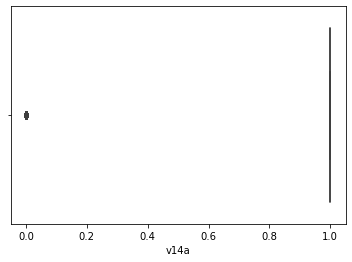

refrig


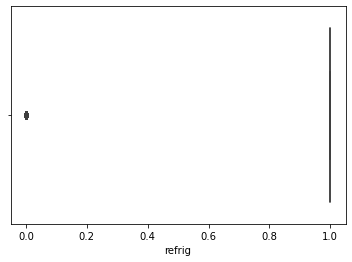

v18q


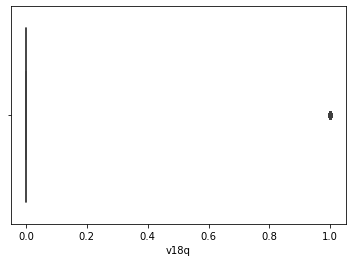

v18q1


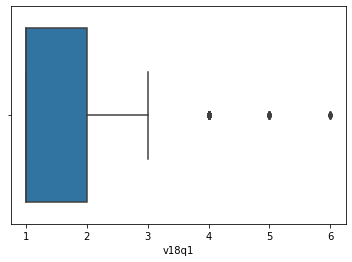

r4h1


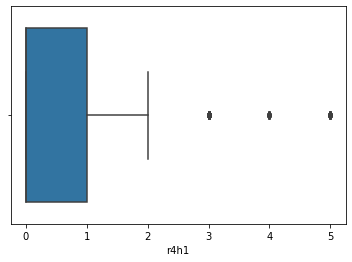

r4h2


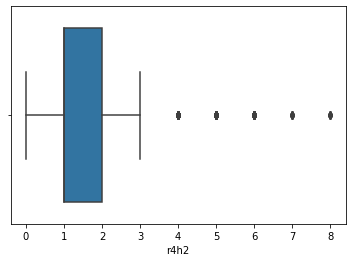

r4h3


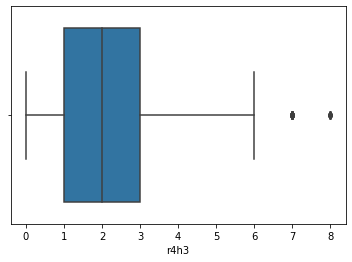

r4m1


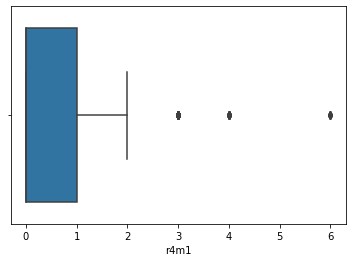

r4m2


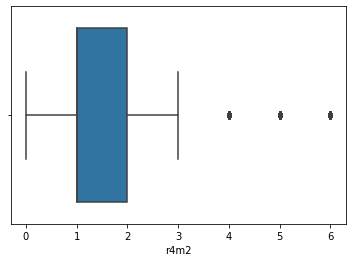

r4m3


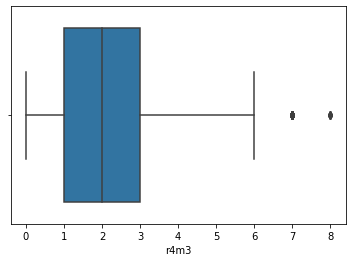

r4t1


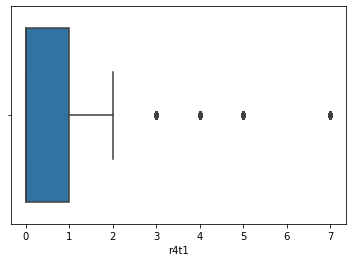

r4t2


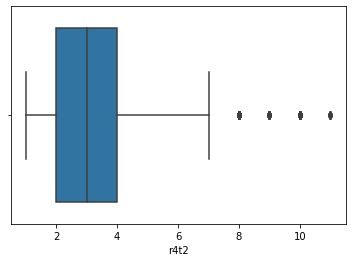

r4t3


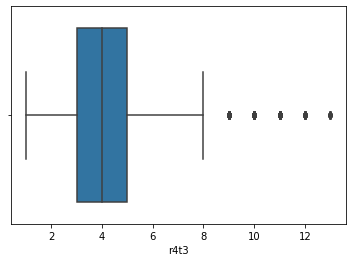

tamhog


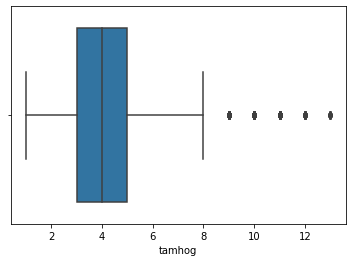

tamviv


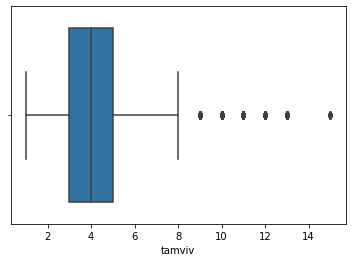

escolari


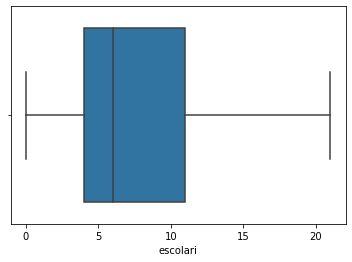

rez_esc


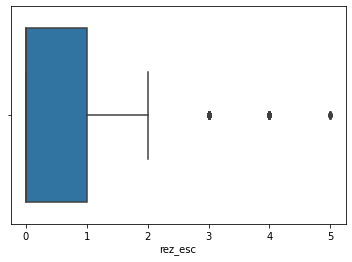

hhsize


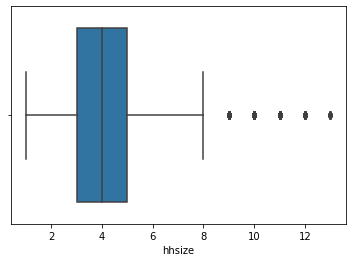

paredblolad


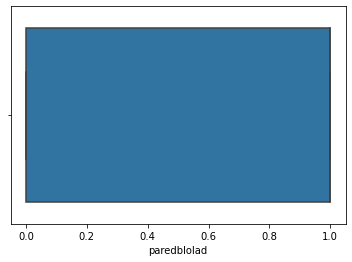

paredzocalo


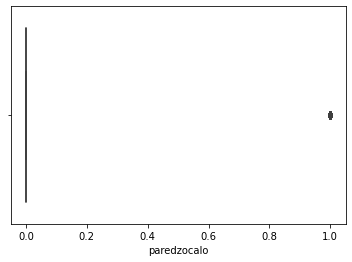

paredpreb


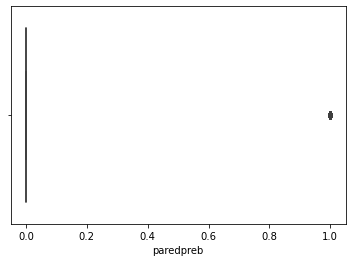

pareddes


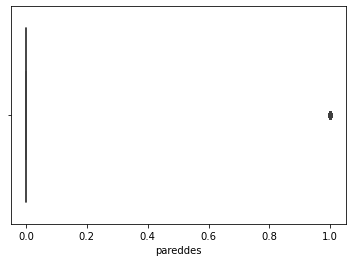

paredmad


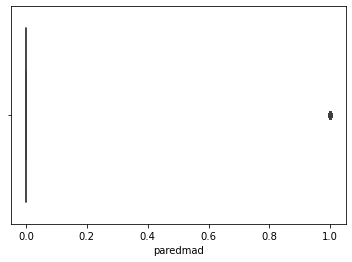

paredzinc


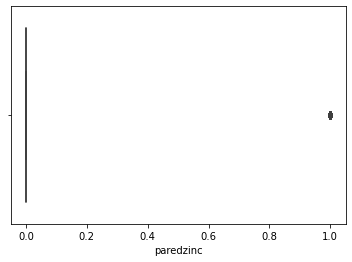

paredfibras


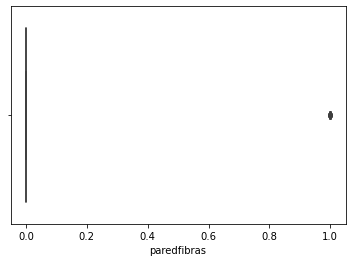

paredother


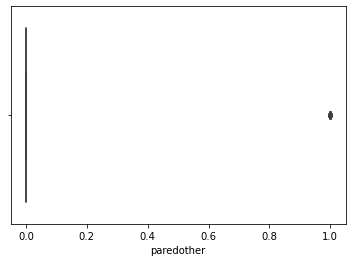

pisomoscer


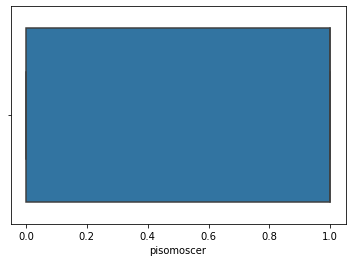

pisocemento


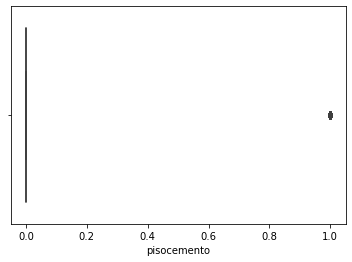

pisoother


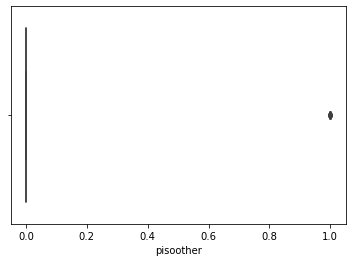

pisonatur


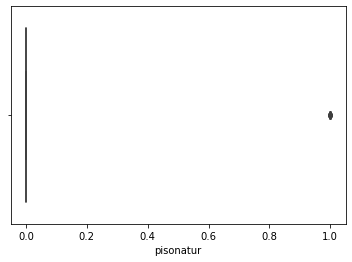

pisonotiene


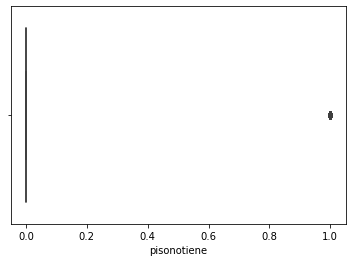

pisomadera


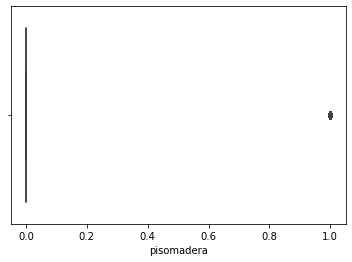

techozinc


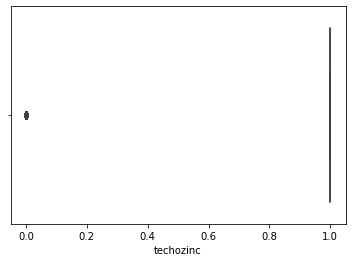

techoentrepiso


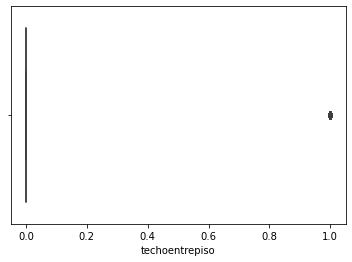

techocane


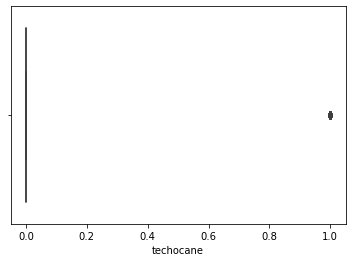

techootro


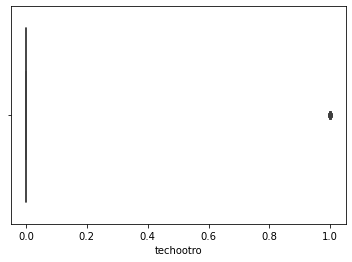

cielorazo


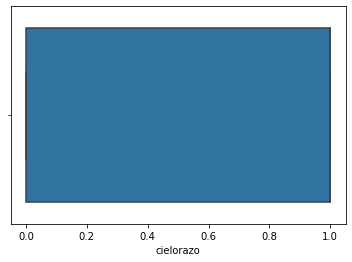

abastaguadentro


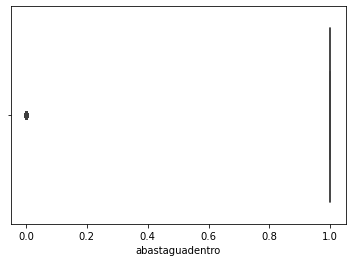

abastaguafuera


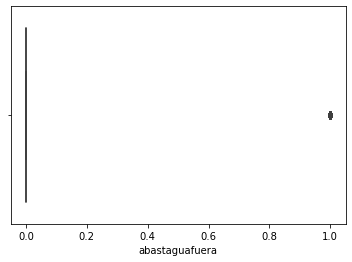

abastaguano


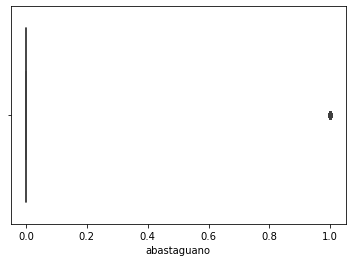

public


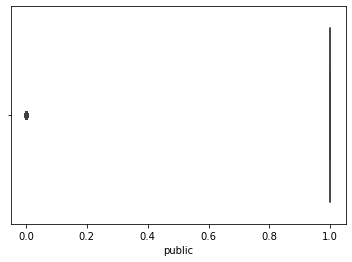

planpri


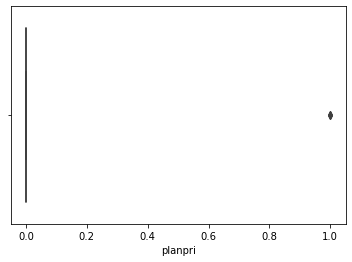

noelec


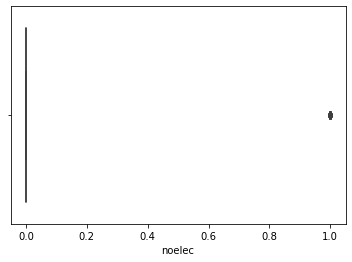

coopele


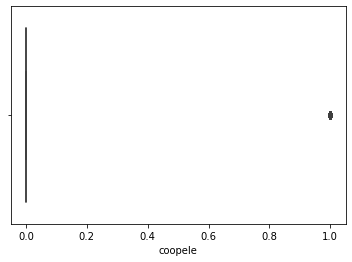

sanitario1


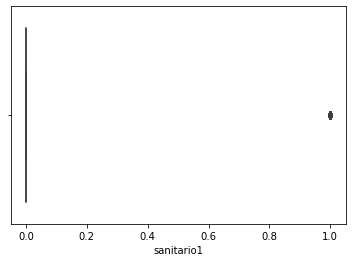

sanitario2


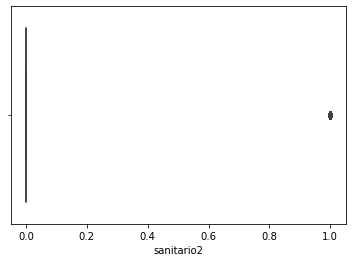

sanitario3


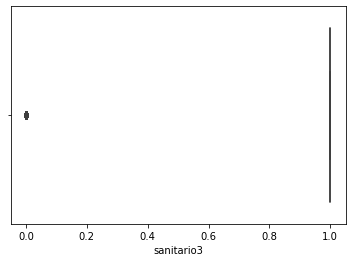

sanitario5


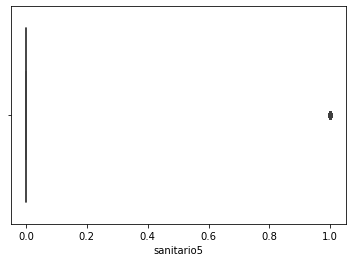

sanitario6


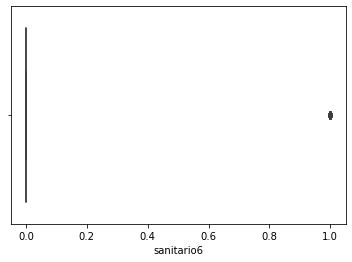

energcocinar1


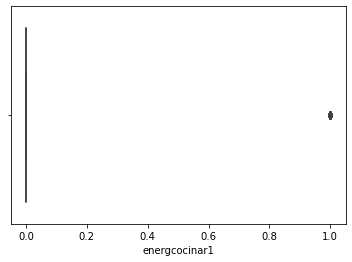

energcocinar2


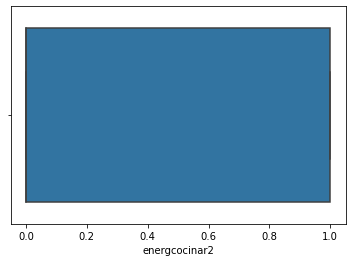

energcocinar3


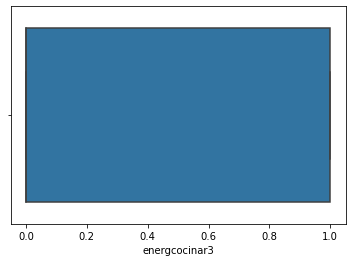

energcocinar4


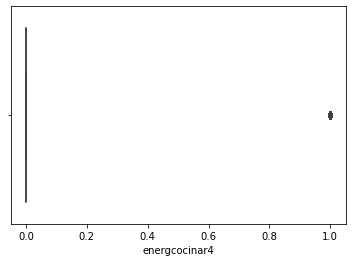

elimbasu1


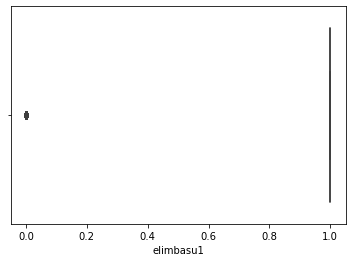

elimbasu2


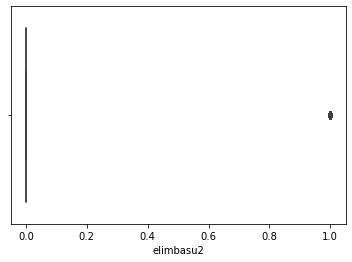

elimbasu3


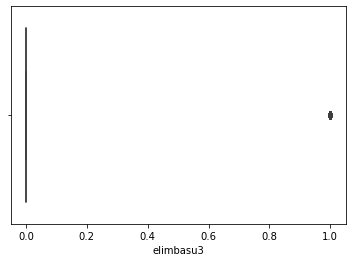

elimbasu4


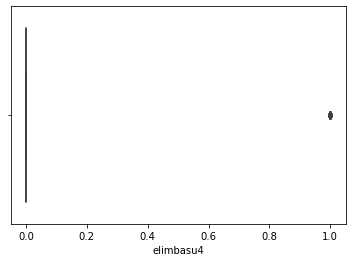

elimbasu5


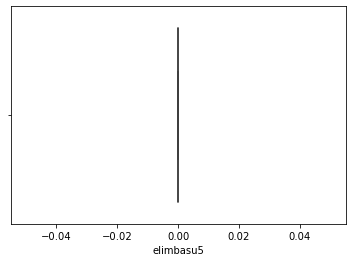

elimbasu6


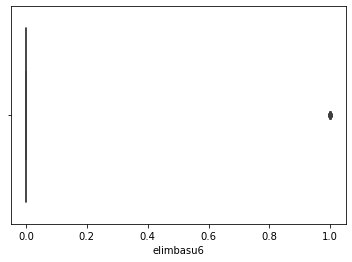

epared1


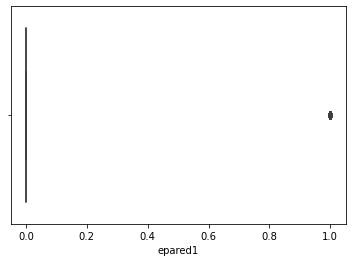

epared2


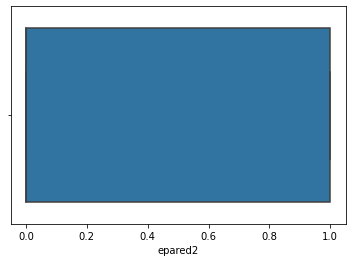

epared3


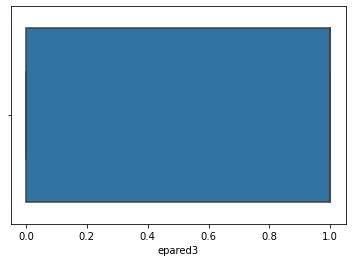

etecho1


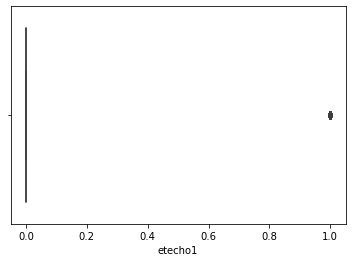

etecho2


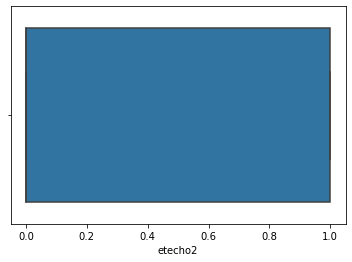

etecho3


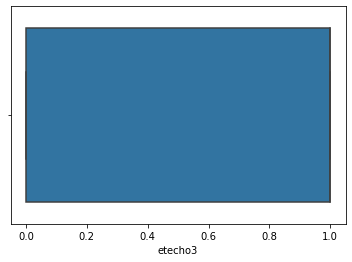

eviv1


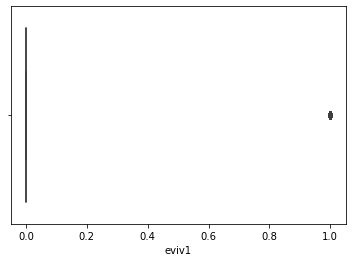

eviv2


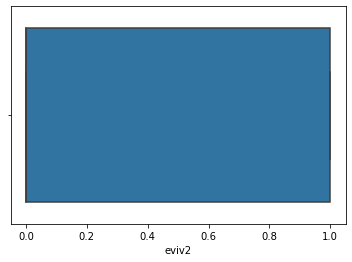

eviv3


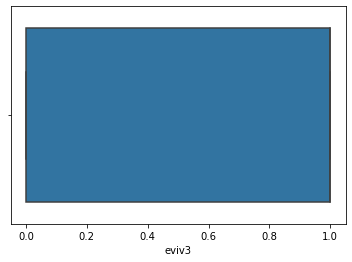

dis


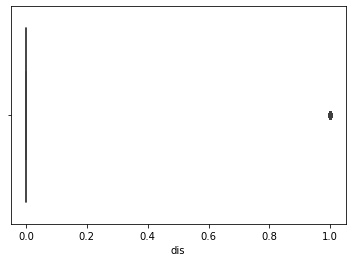

male


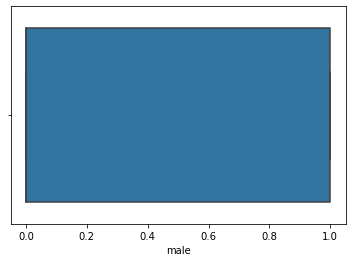

female


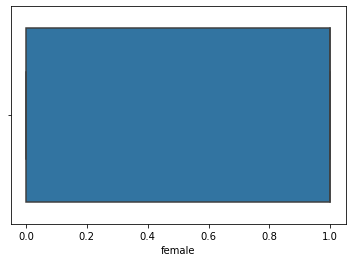

estadocivil1


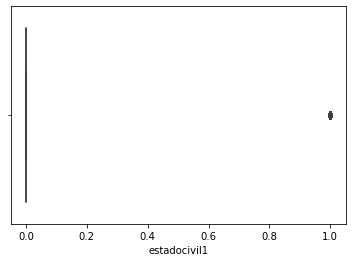

estadocivil2


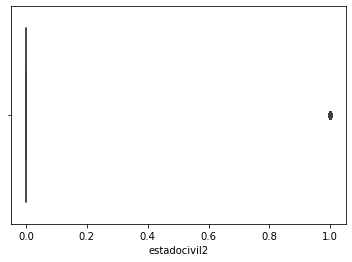

estadocivil3


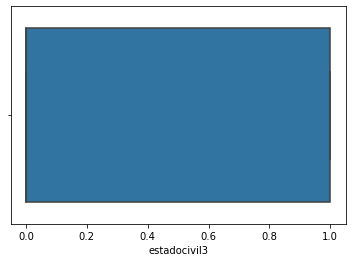

estadocivil4


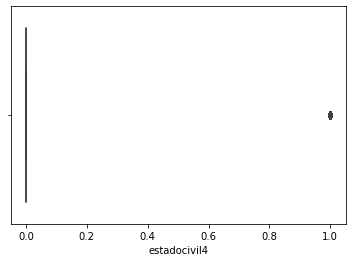

estadocivil5


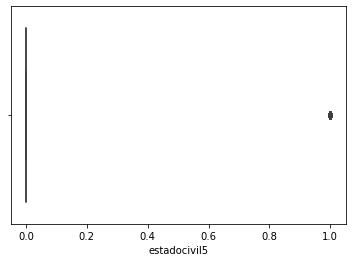

estadocivil6


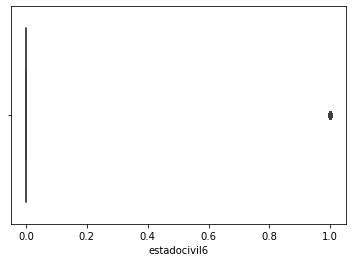

estadocivil7


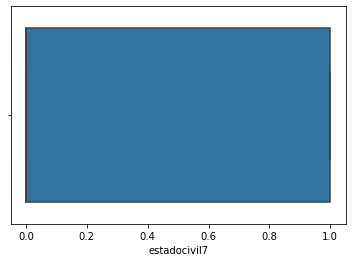

parentesco1


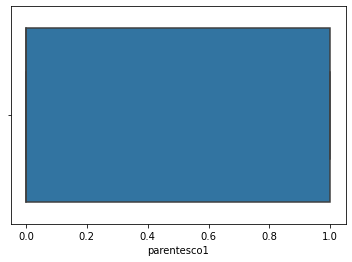

parentesco2


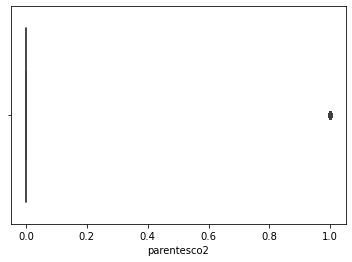

parentesco3


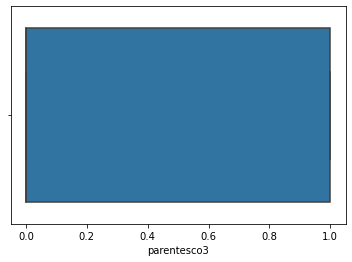

parentesco4


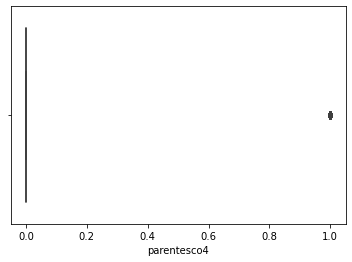

parentesco5


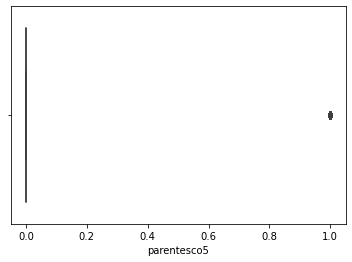

parentesco6


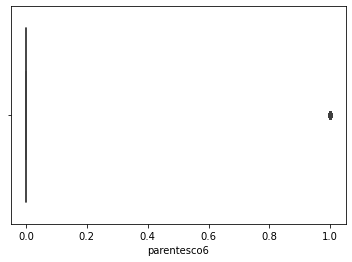

parentesco7


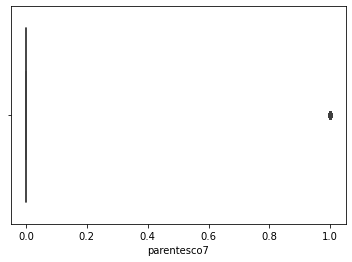

parentesco8


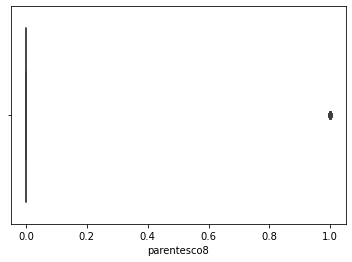

parentesco9


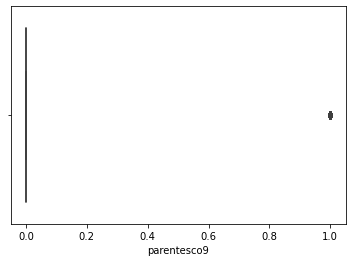

parentesco10


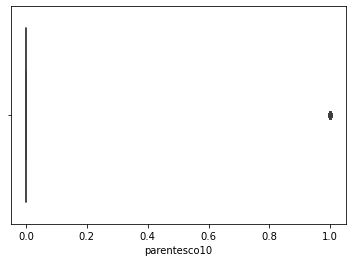

parentesco11


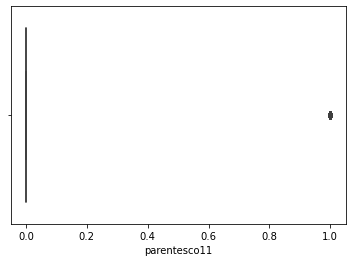

parentesco12


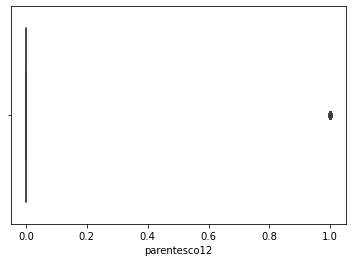

hogar_nin


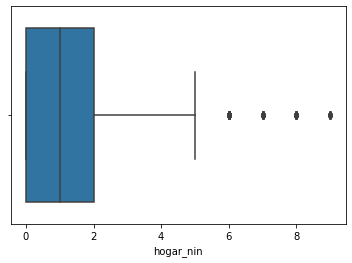

hogar_adul


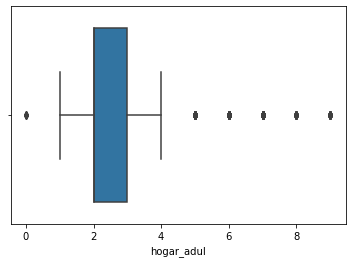

hogar_mayor


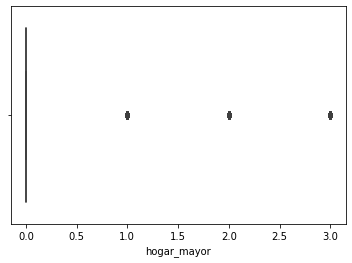

hogar_total


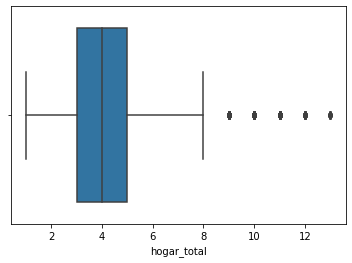

dependency


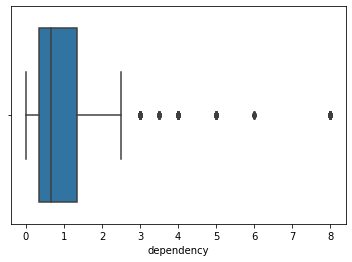

edjefe


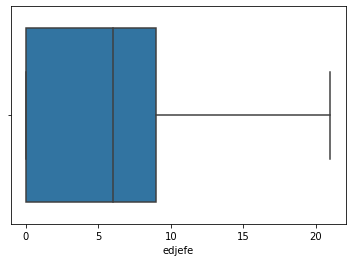

edjefa


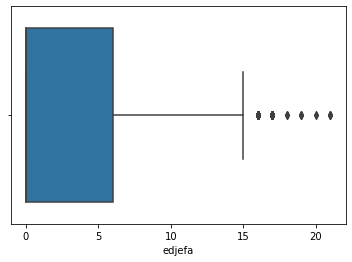

meaneduc


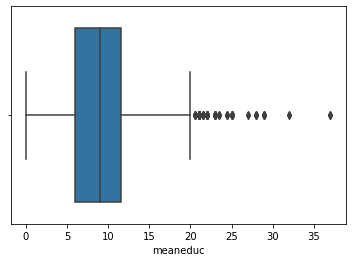

instlevel1


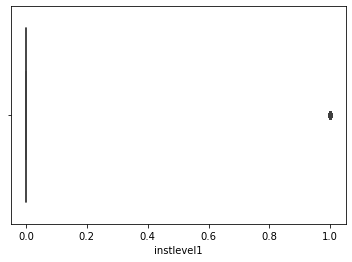

instlevel2


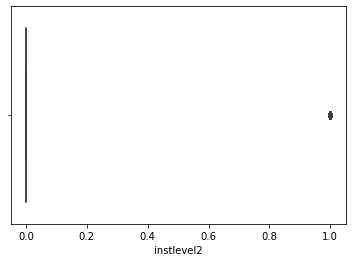

instlevel3


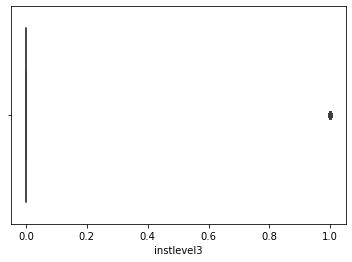

instlevel4


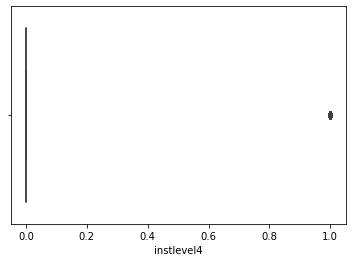

instlevel5


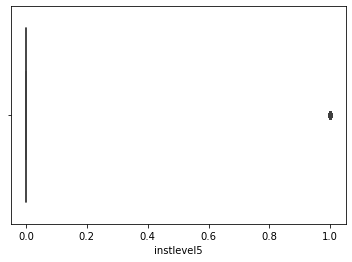

instlevel6


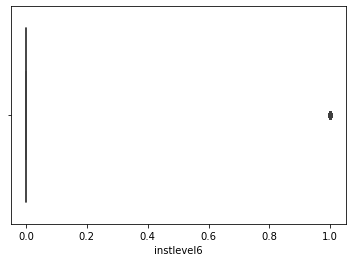

instlevel7


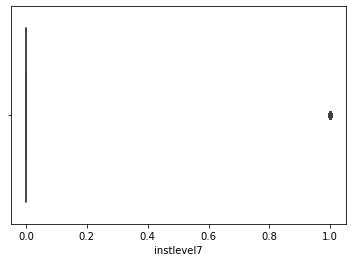

instlevel8


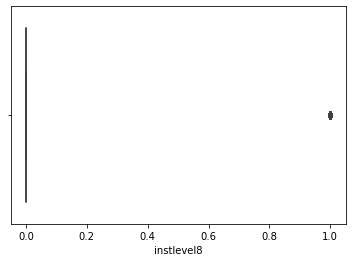

instlevel9


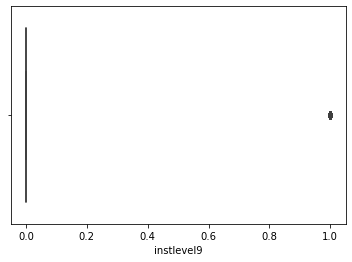

bedrooms


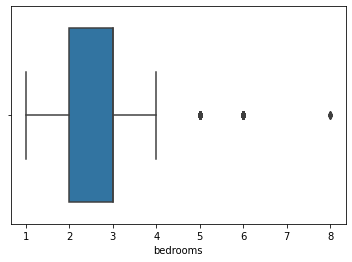

overcrowding


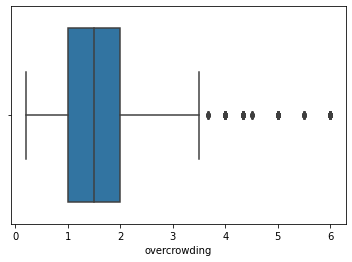

tipovivi1


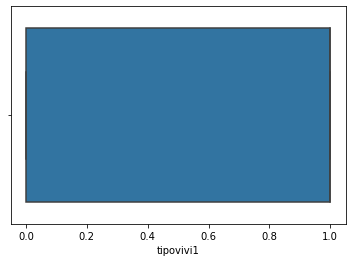

tipovivi2


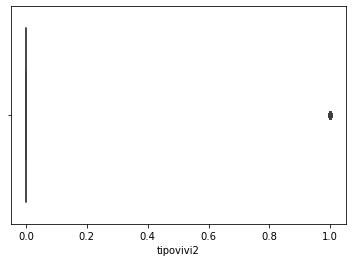

tipovivi3


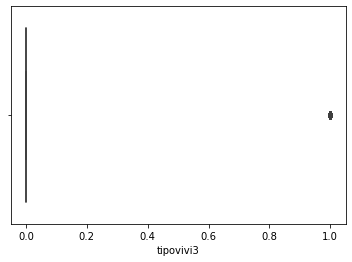

tipovivi4


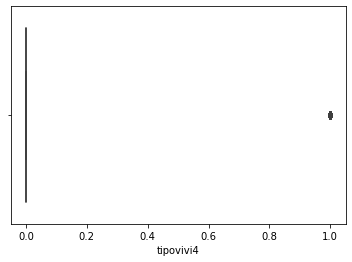

tipovivi5


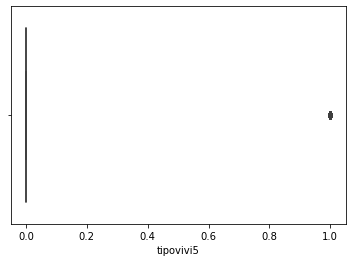

computer


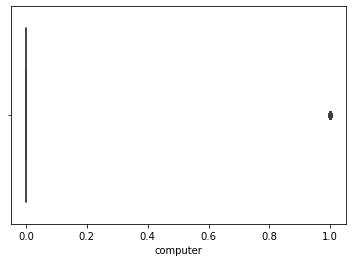

television


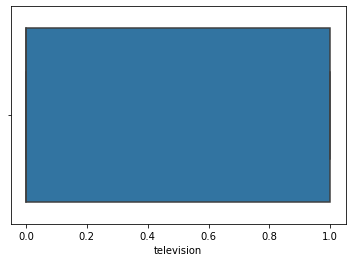

mobilephone


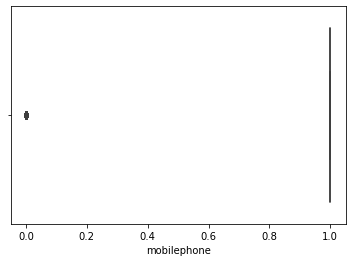

qmobilephone


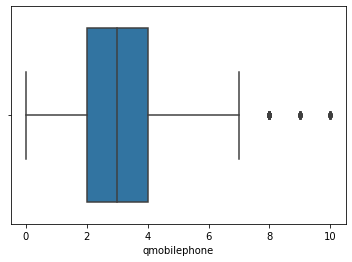

lugar1


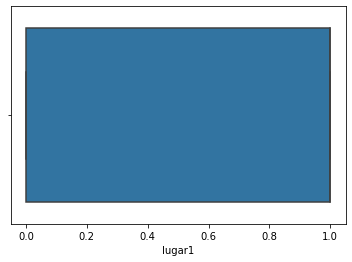

lugar2


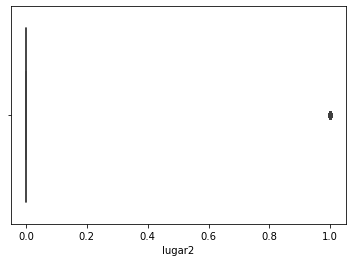

lugar3


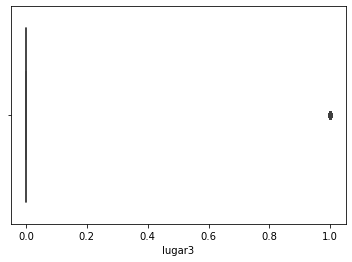

lugar4


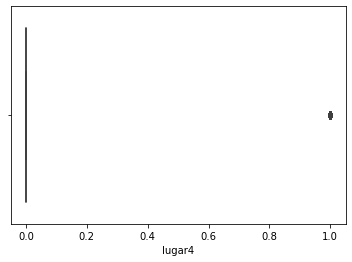

lugar5


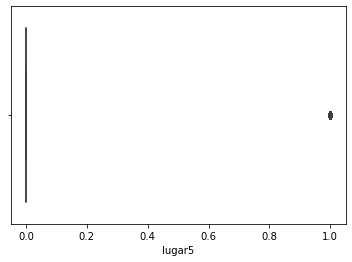

lugar6


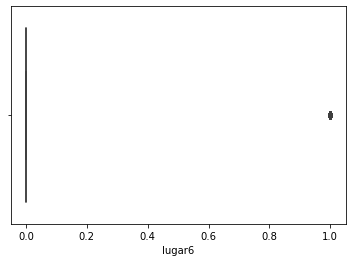

area1


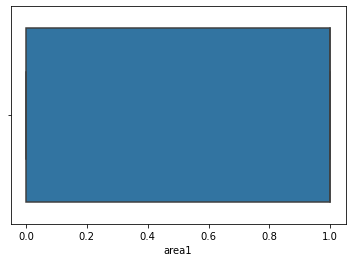

area2


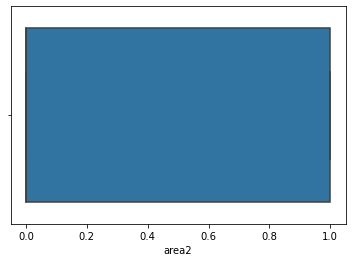

age


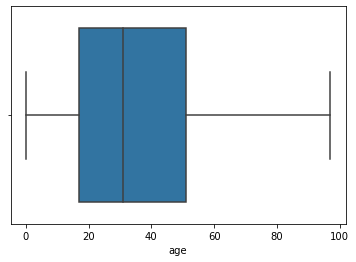

SQBescolari


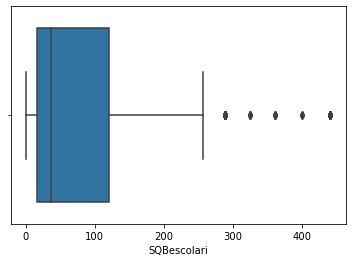

SQBage


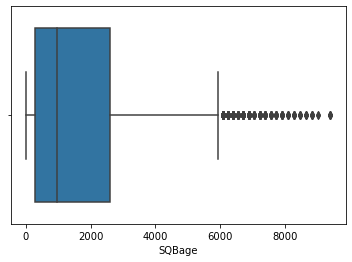

SQBhogar_total


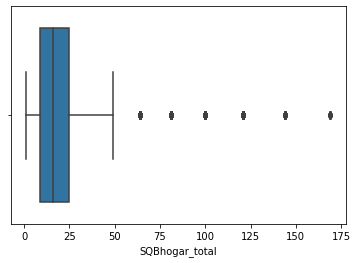

SQBedjefe


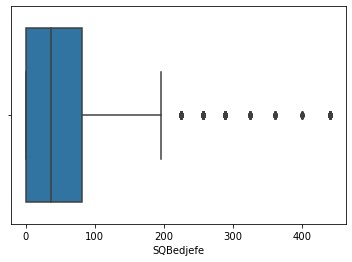

SQBhogar_nin


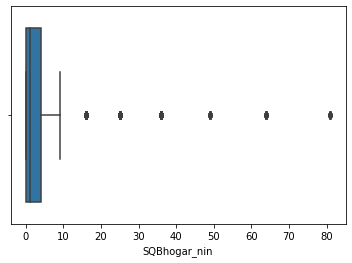

SQBovercrowding


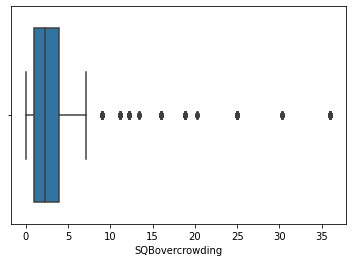

SQBdependency


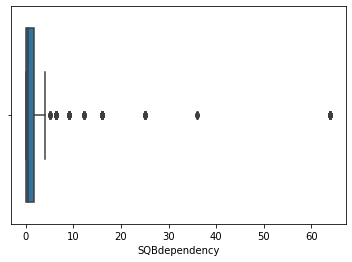

SQBmeaned


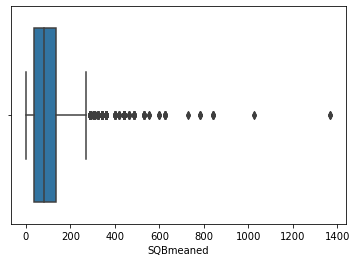

agesq


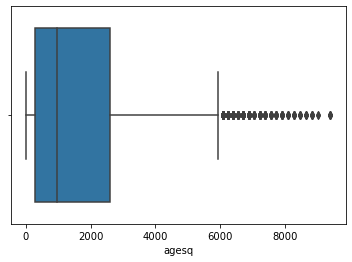

Target


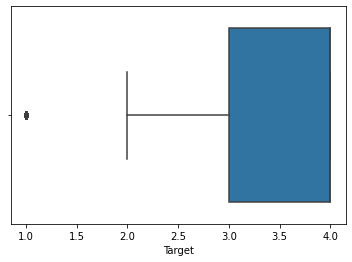

In [48]:
outliers(df_tr)  

#I see some variable has outliers it creates bias in the variables. Anyhow since we are building the random forest model\
#not request any transformation for variables. Below figures just to notice is there any outliers.

v2a1


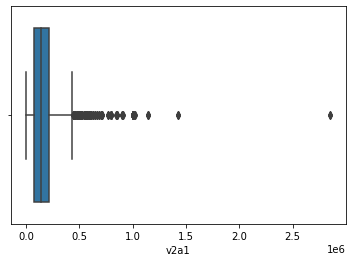

hacdor


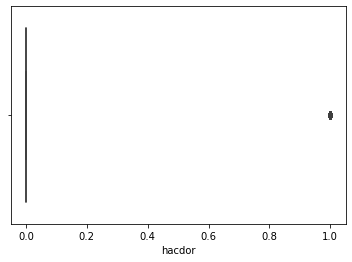

rooms


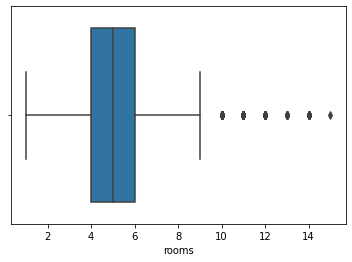

hacapo


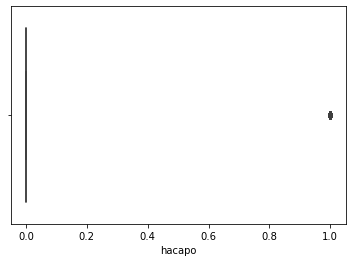

v14a


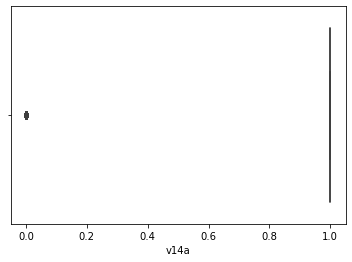

refrig


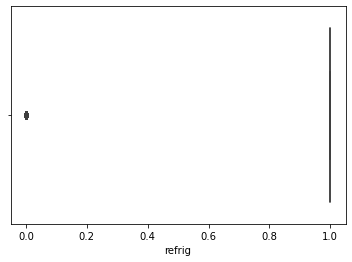

v18q


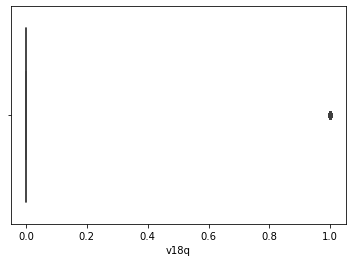

v18q1


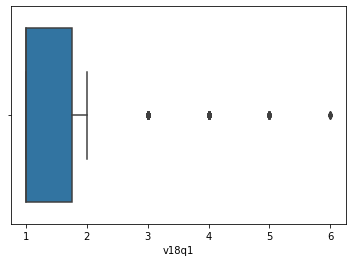

r4h1


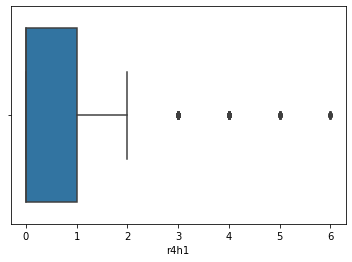

r4h2


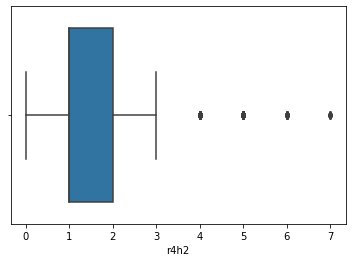

r4h3


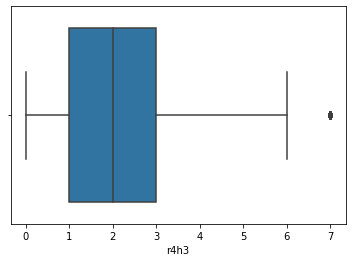

r4m1


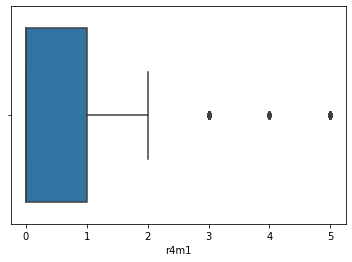

r4m2


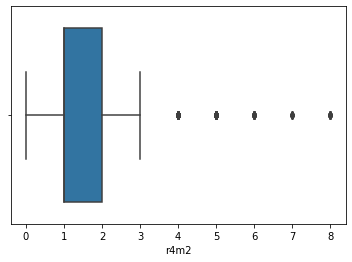

r4m3


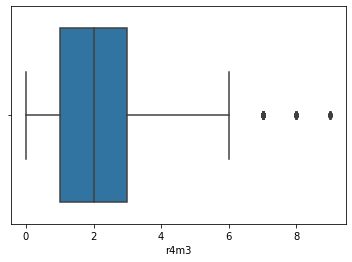

r4t1


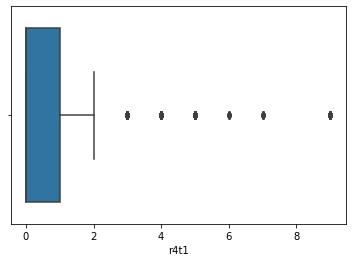

r4t2


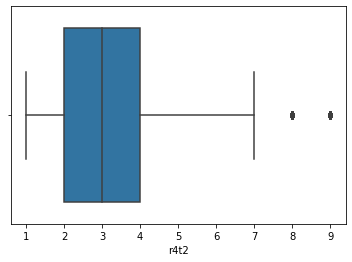

r4t3


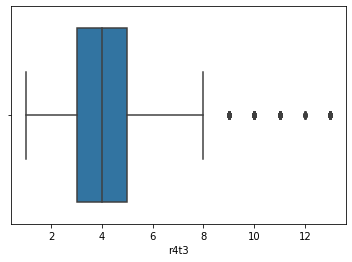

tamhog


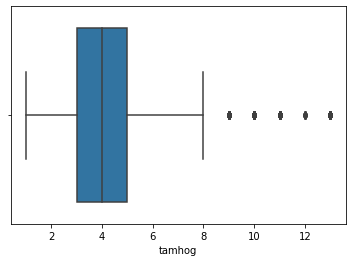

tamviv


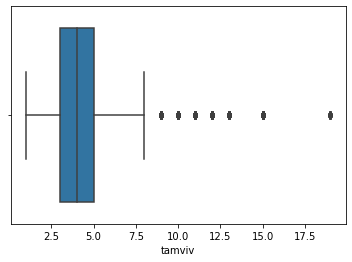

escolari


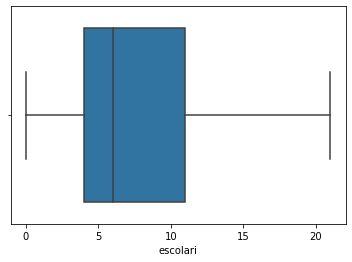

rez_esc


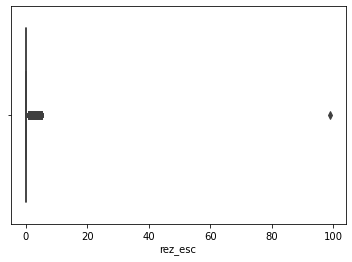

hhsize


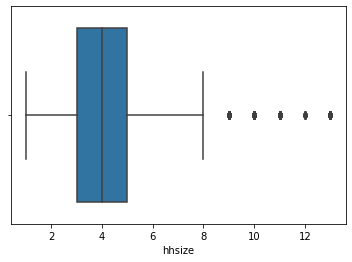

paredblolad


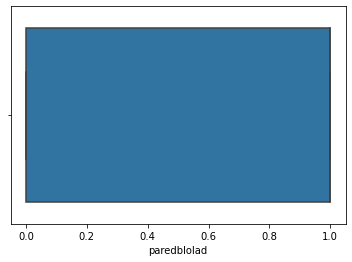

paredzocalo


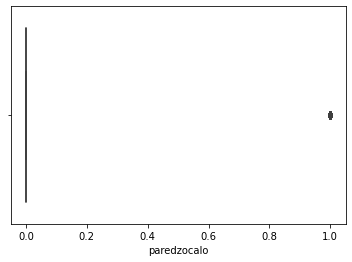

paredpreb


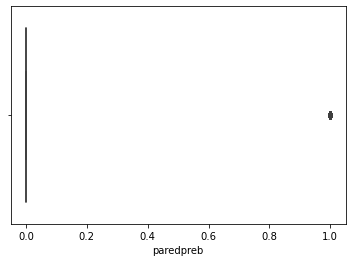

pareddes


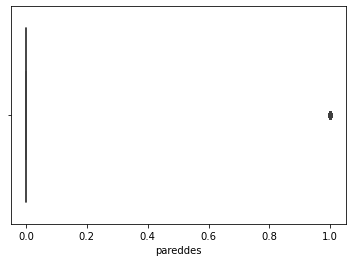

paredmad


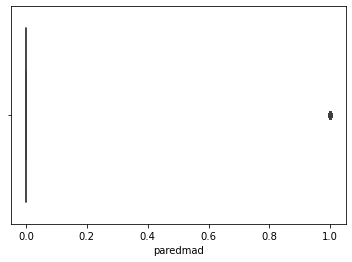

paredzinc


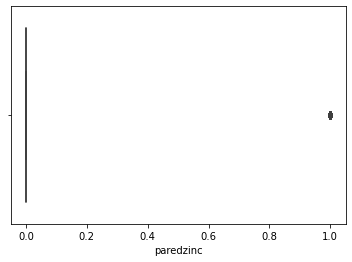

paredfibras


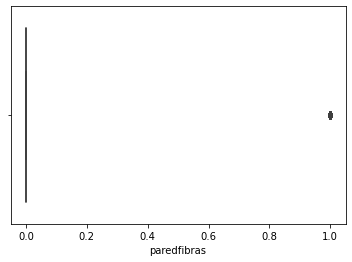

paredother


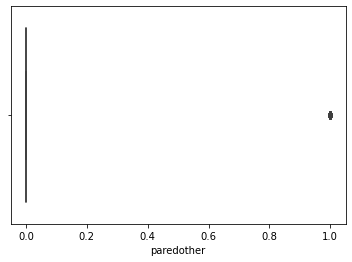

pisomoscer


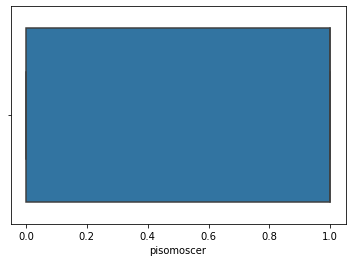

pisocemento


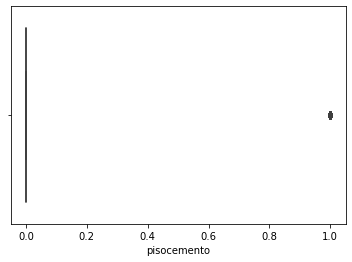

pisoother


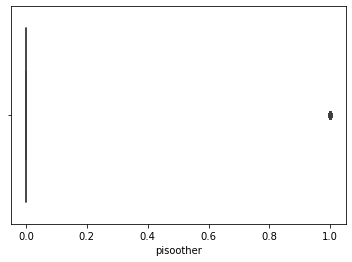

pisonatur


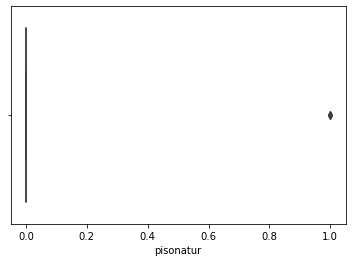

pisonotiene


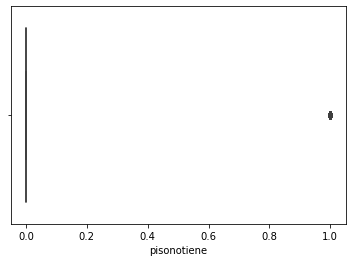

pisomadera


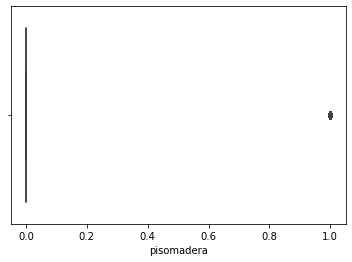

techozinc


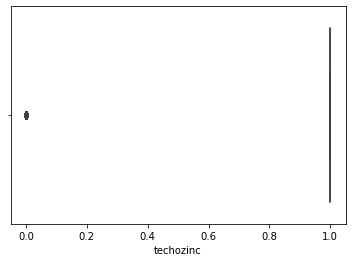

techoentrepiso


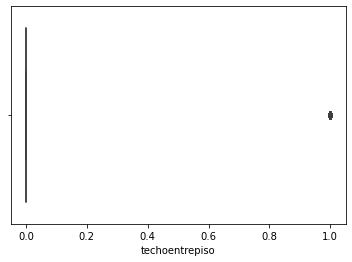

techocane


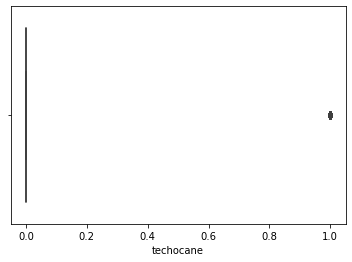

techootro


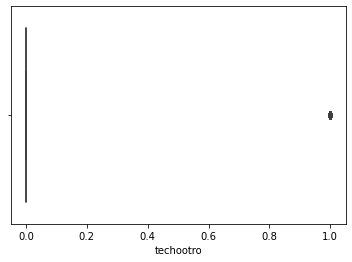

cielorazo


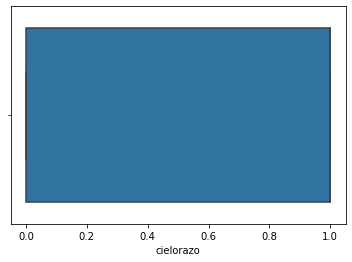

abastaguadentro


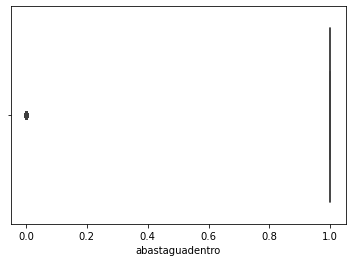

abastaguafuera


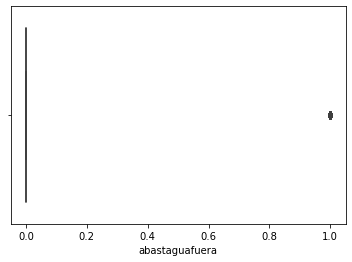

abastaguano


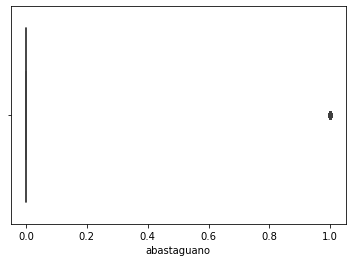

public


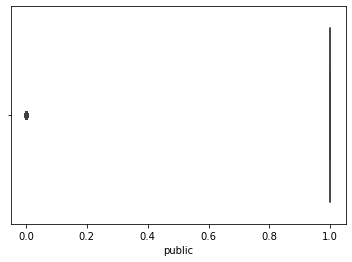

planpri


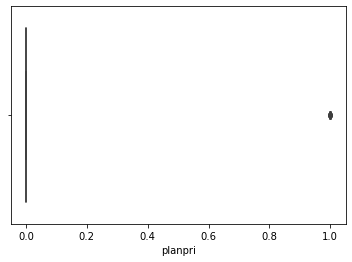

noelec


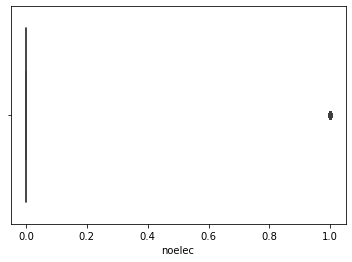

coopele


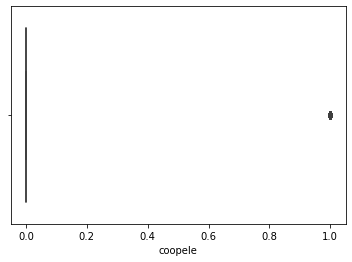

sanitario1


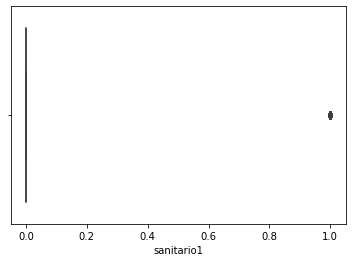

sanitario2


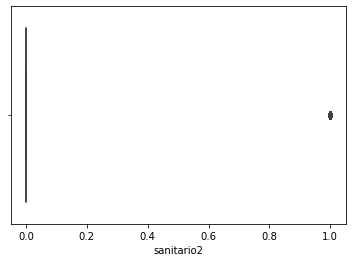

sanitario3


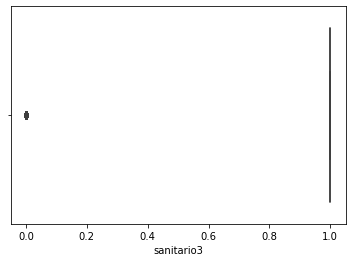

sanitario5


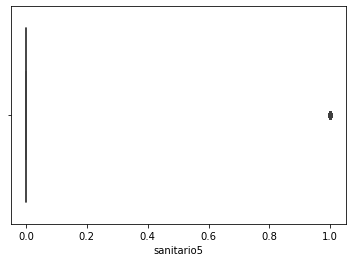

sanitario6


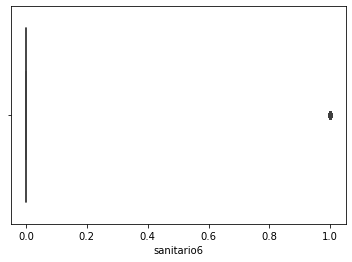

energcocinar1


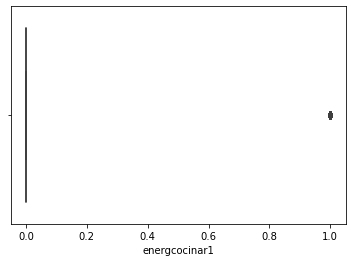

energcocinar2


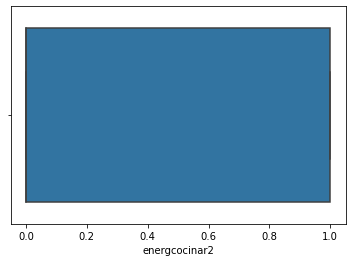

energcocinar3


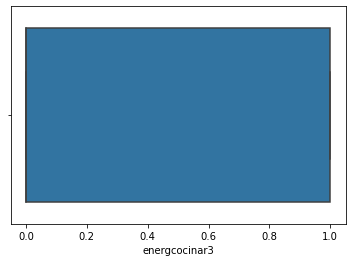

energcocinar4


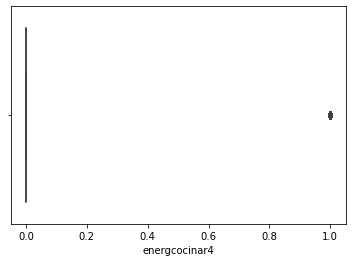

elimbasu1


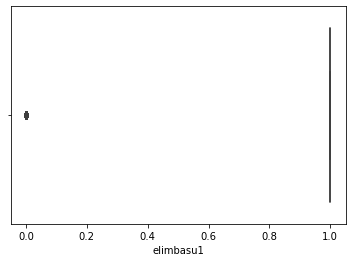

elimbasu2


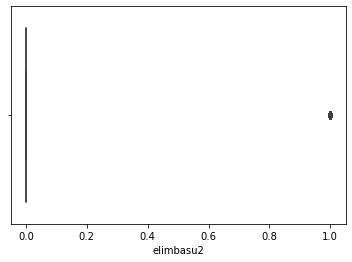

elimbasu3


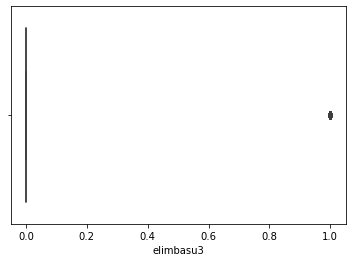

elimbasu4


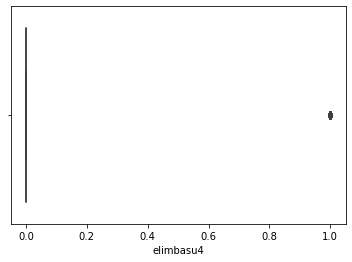

elimbasu5


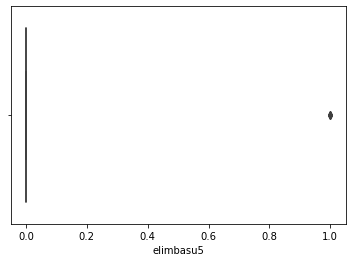

elimbasu6


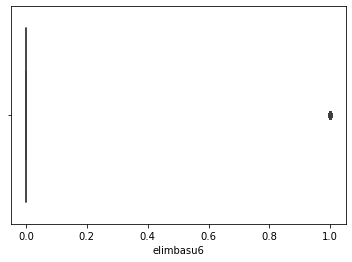

epared1


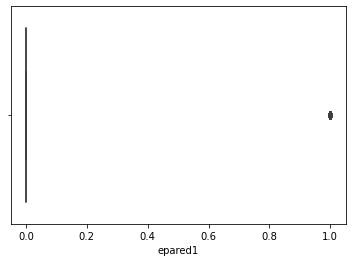

epared2


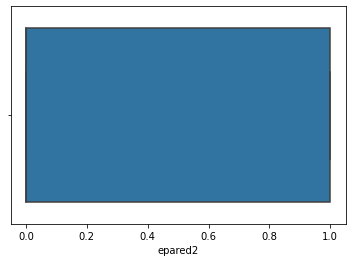

epared3


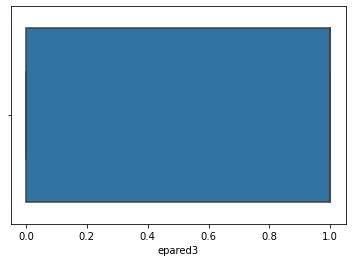

etecho1


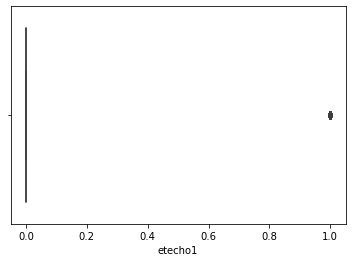

etecho2


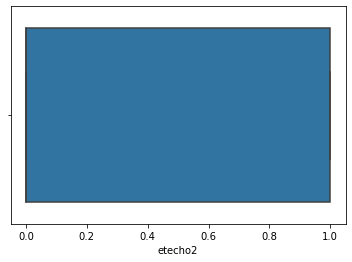

etecho3


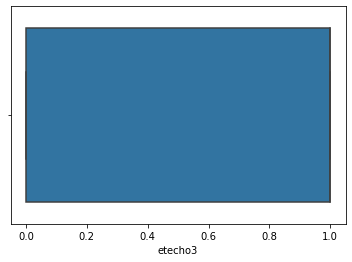

eviv1


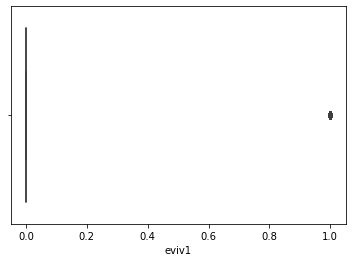

eviv2


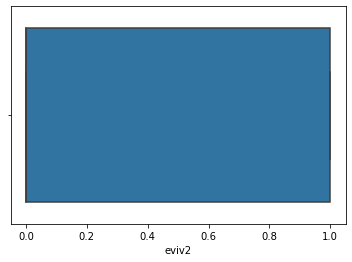

eviv3


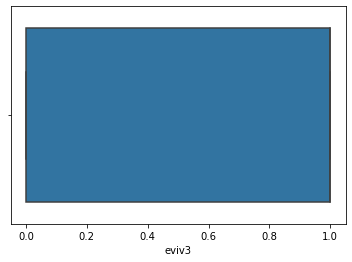

dis


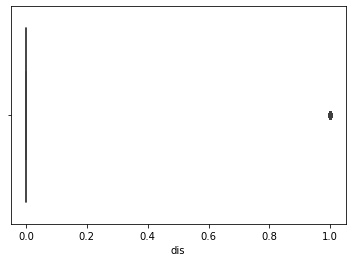

male


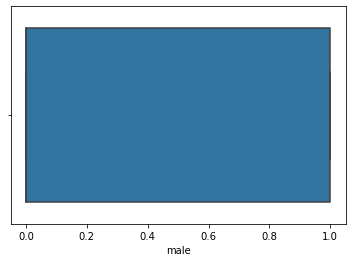

female


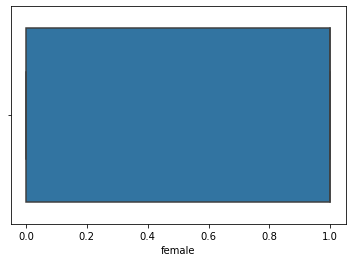

estadocivil1


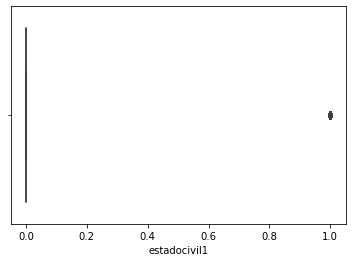

estadocivil2


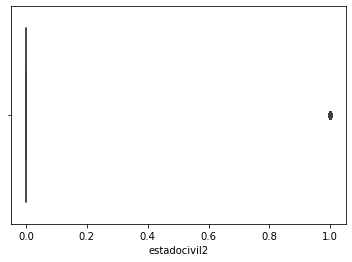

estadocivil3


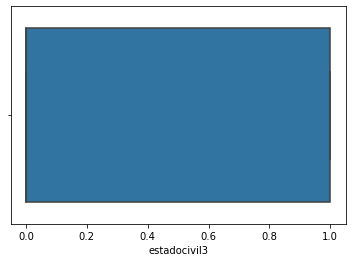

estadocivil4


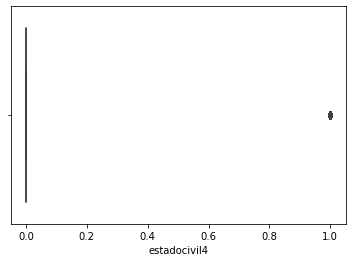

estadocivil5


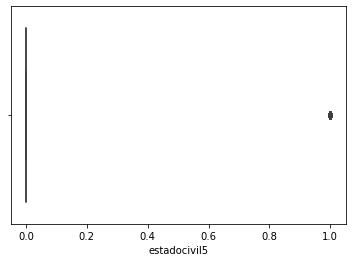

estadocivil6


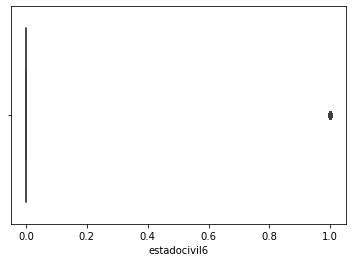

estadocivil7


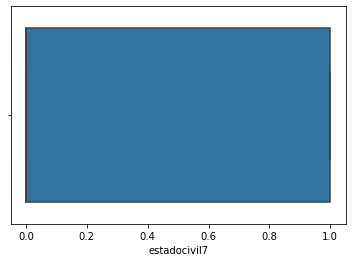

parentesco1


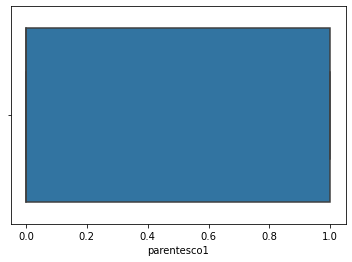

parentesco2


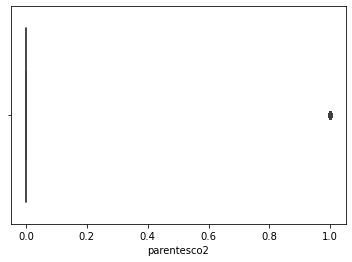

parentesco3


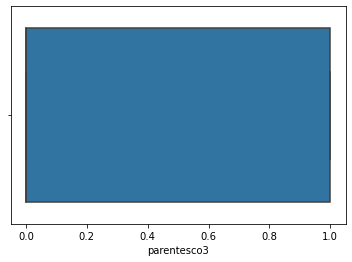

parentesco4


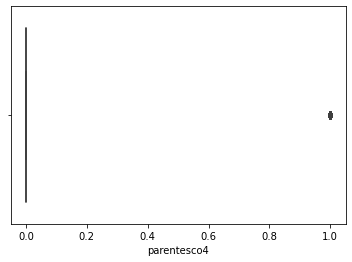

parentesco5


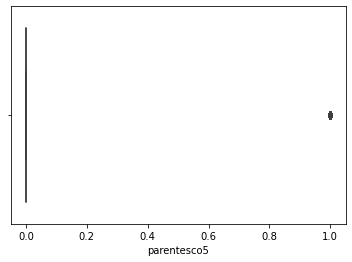

parentesco6


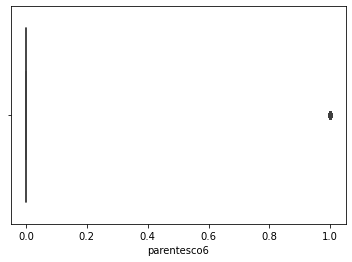

parentesco7


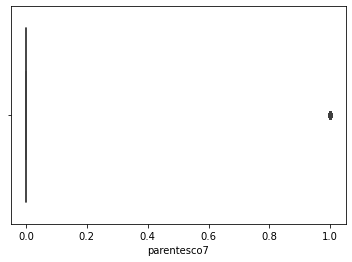

parentesco8


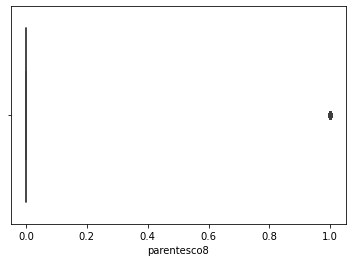

parentesco9


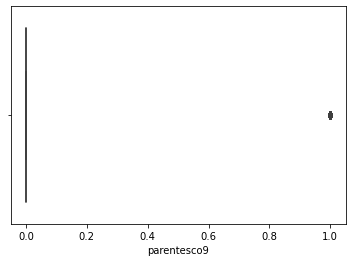

parentesco10


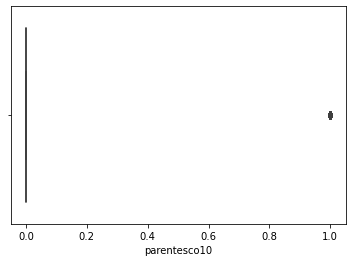

parentesco11


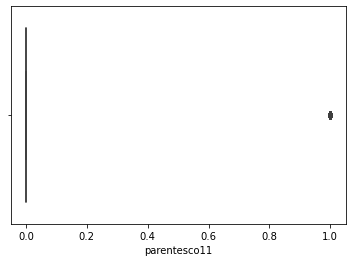

parentesco12


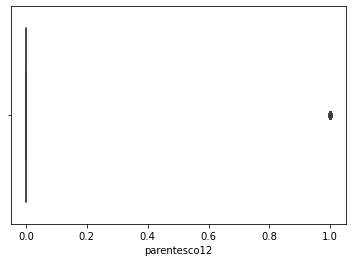

hogar_nin


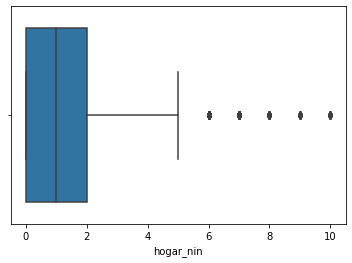

hogar_adul


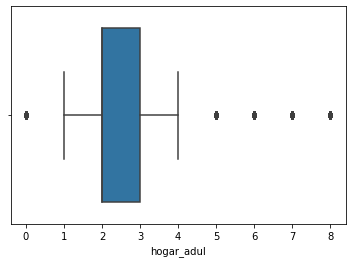

hogar_mayor


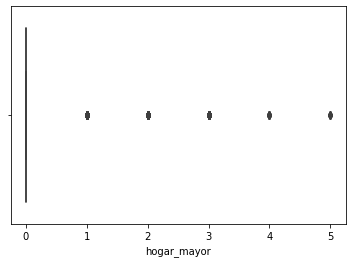

hogar_total


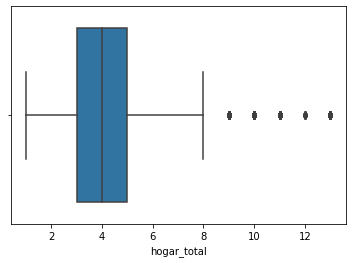

dependency


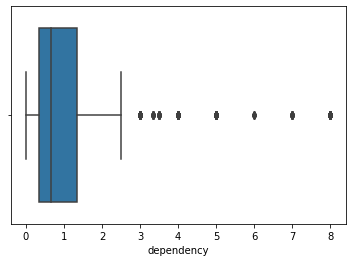

edjefe


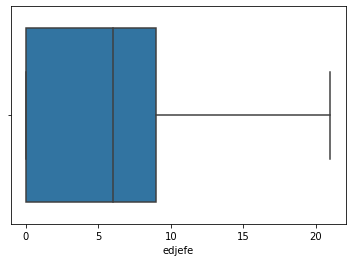

edjefa


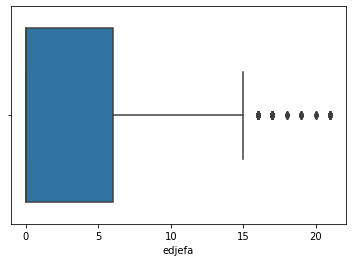

meaneduc


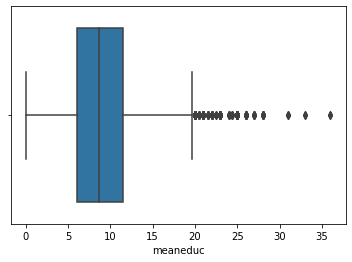

instlevel1


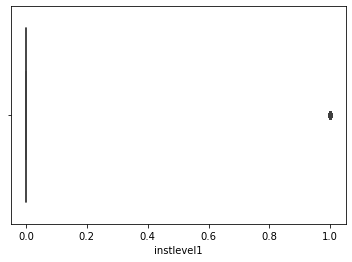

instlevel2


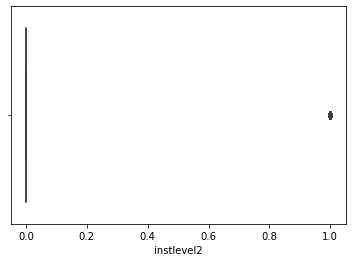

instlevel3


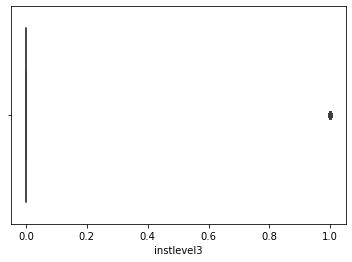

instlevel4


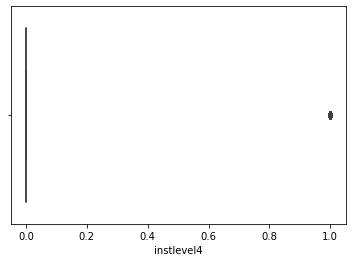

instlevel5


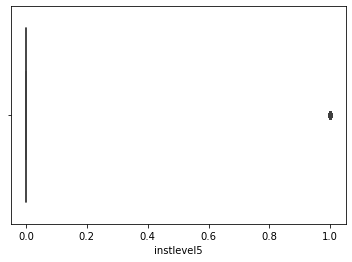

instlevel6


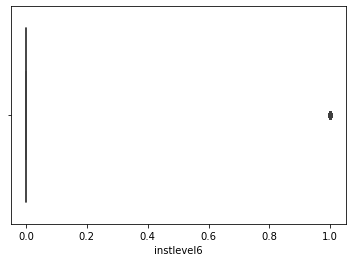

instlevel7


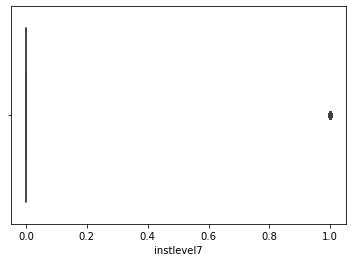

instlevel8


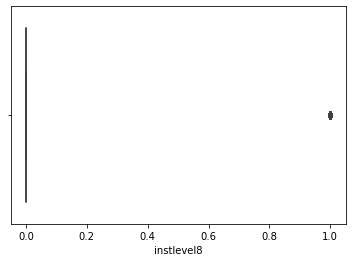

instlevel9


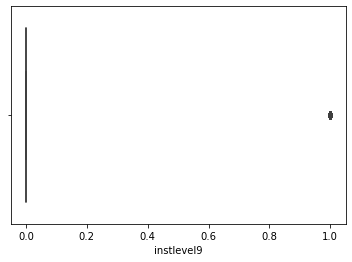

bedrooms


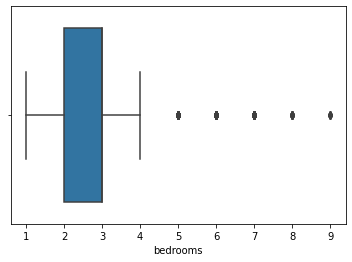

overcrowding


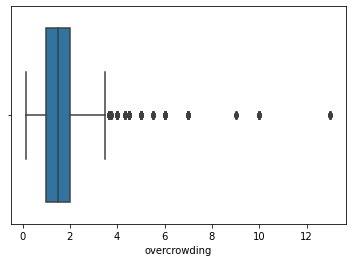

tipovivi1


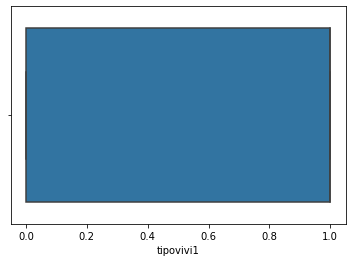

tipovivi2


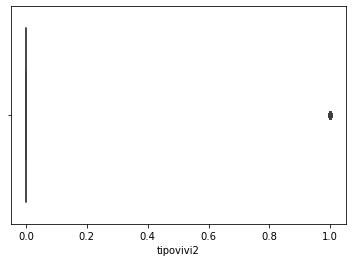

tipovivi3


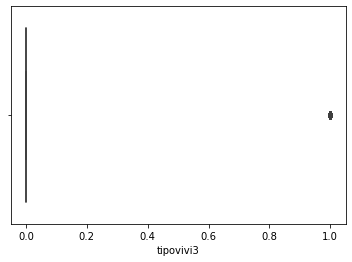

tipovivi4


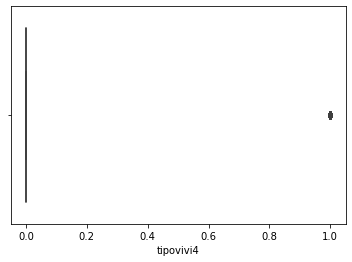

tipovivi5


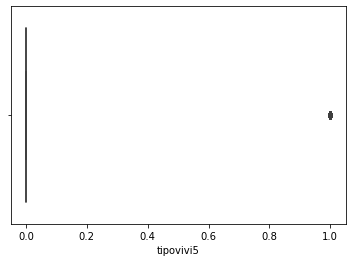

computer


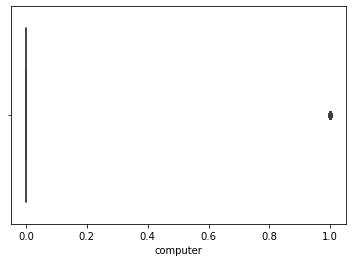

television


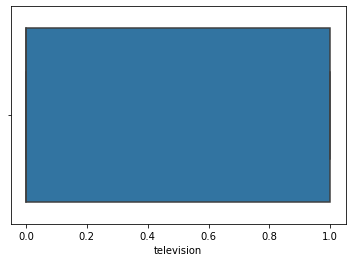

mobilephone


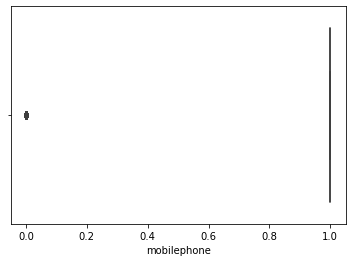

qmobilephone


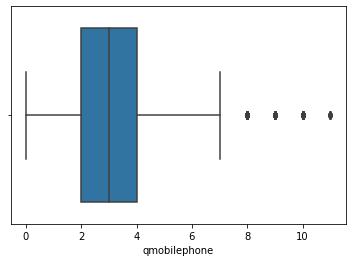

lugar1


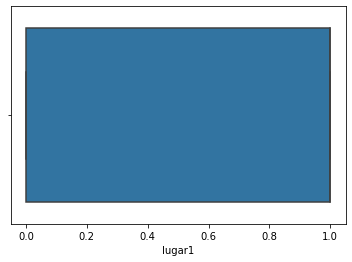

lugar2


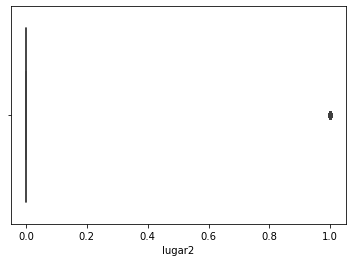

lugar3


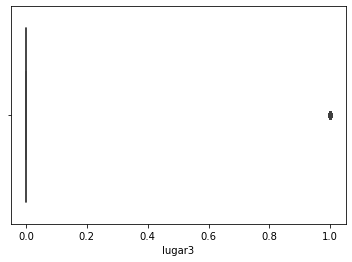

lugar4


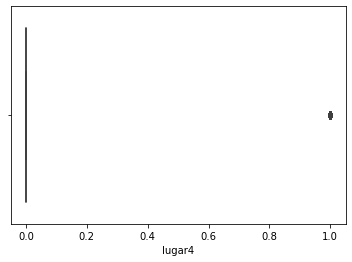

lugar5


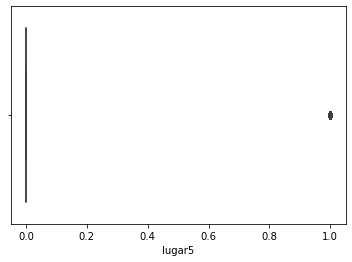

lugar6


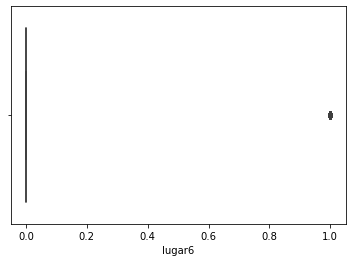

area1


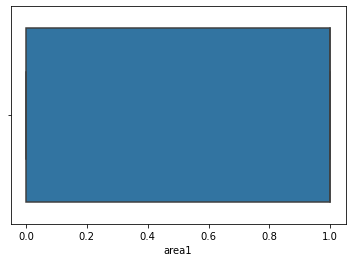

area2


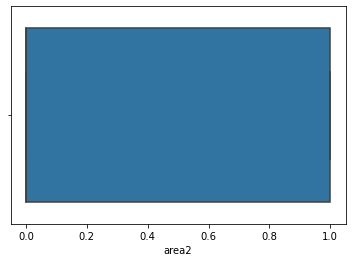

age


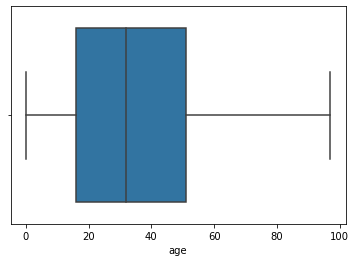

SQBescolari


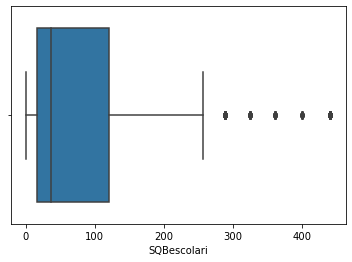

SQBage


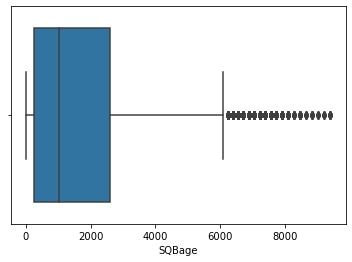

SQBhogar_total


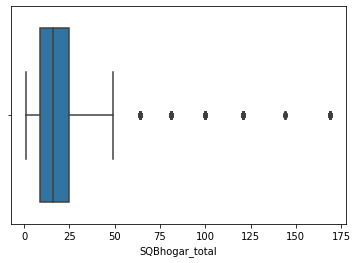

SQBedjefe


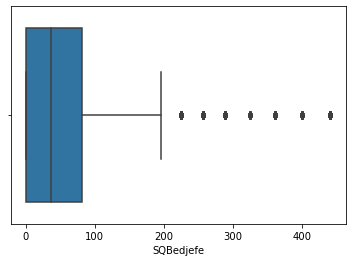

SQBhogar_nin


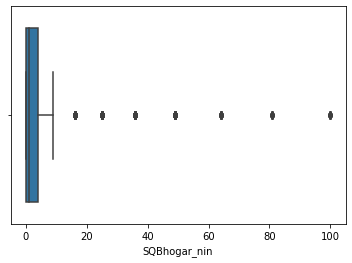

SQBovercrowding


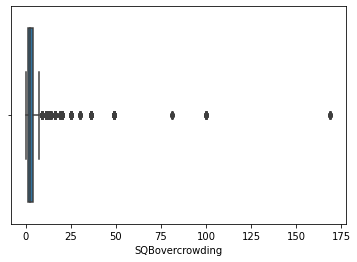

SQBdependency


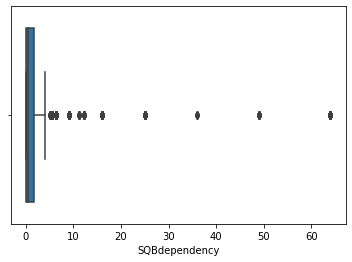

SQBmeaned


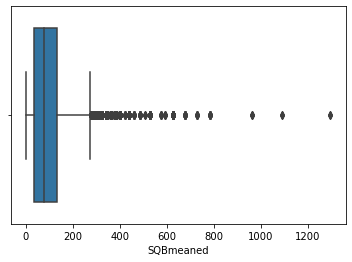

agesq


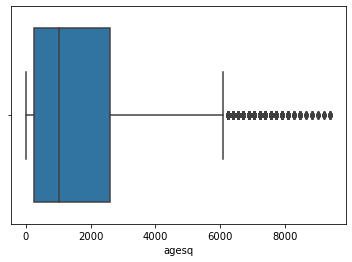

In [49]:
outliers(df_te)

In [50]:
def dis(n):
    for i in n.columns:
        print(i)
        sns.distplot(n[i])
        plt.show()

v2a1


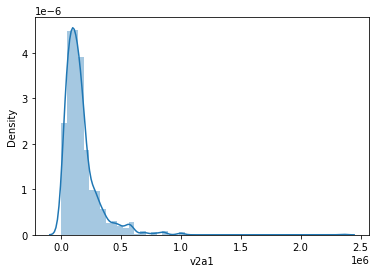

hacdor


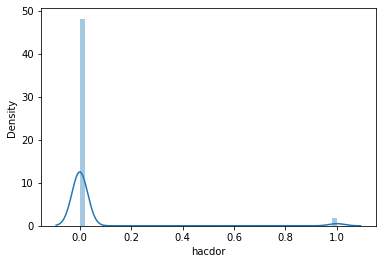

rooms


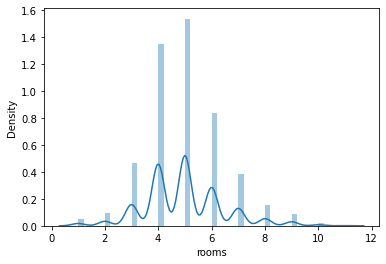

hacapo


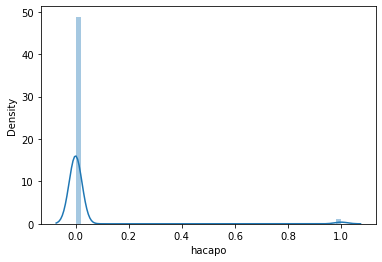

v14a


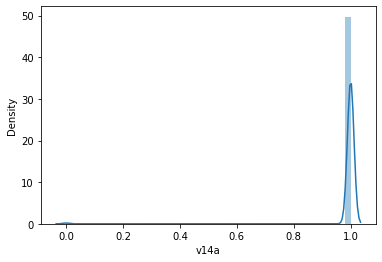

refrig


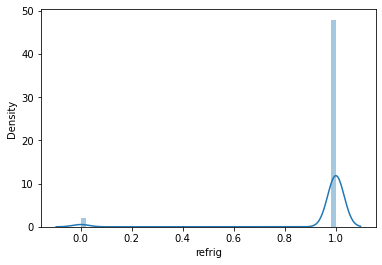

v18q


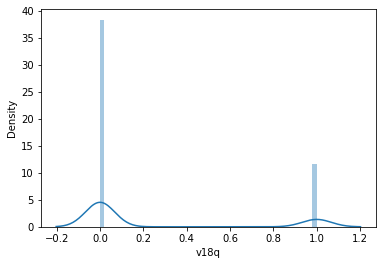

v18q1


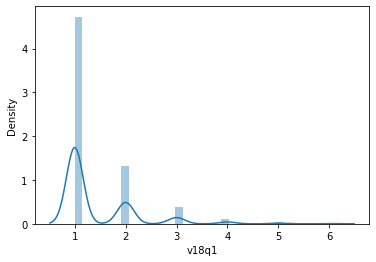

r4h1


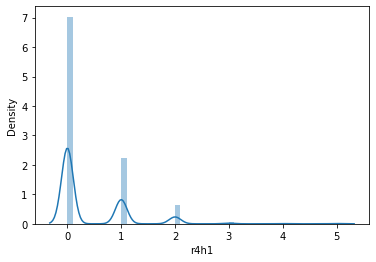

r4h2


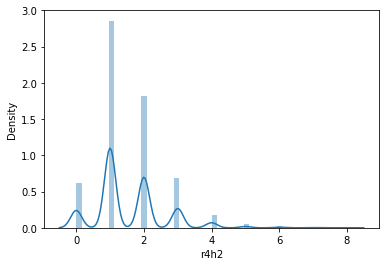

r4h3


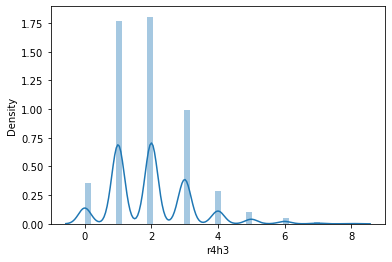

r4m1


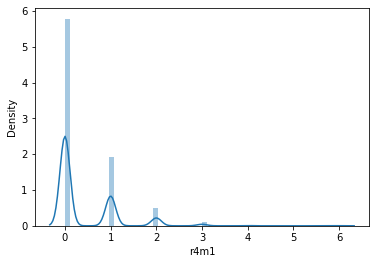

r4m2


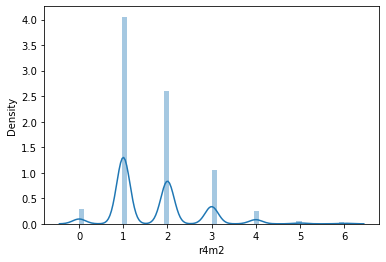

r4m3


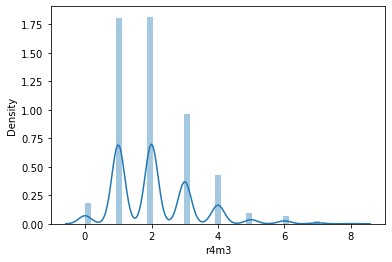

r4t1


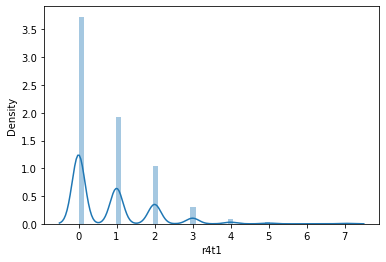

r4t2


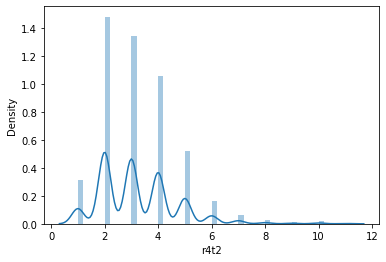

r4t3


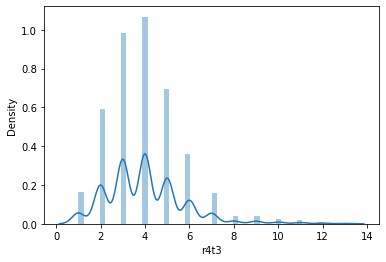

tamhog


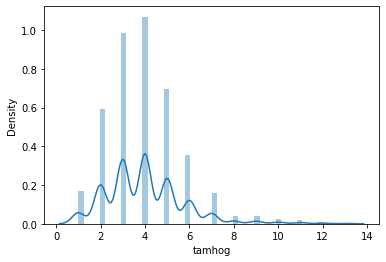

tamviv


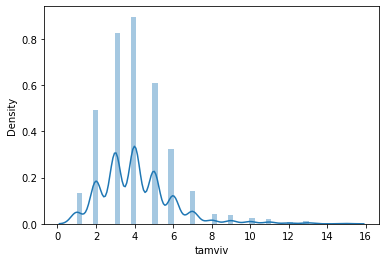

escolari


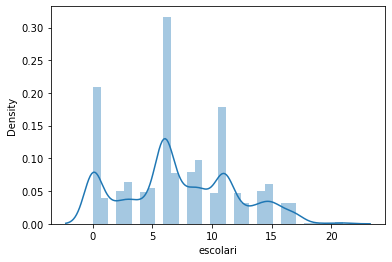

rez_esc


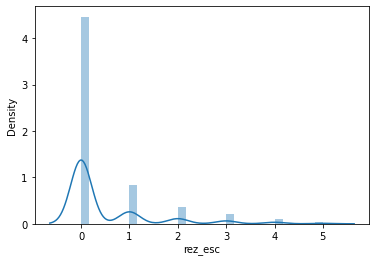

hhsize


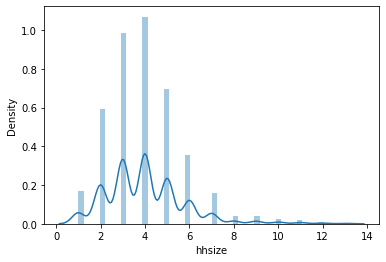

paredblolad


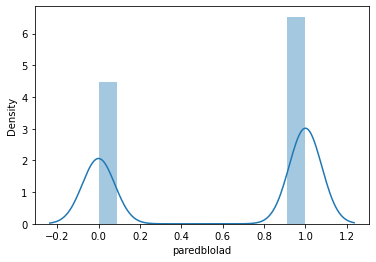

paredzocalo


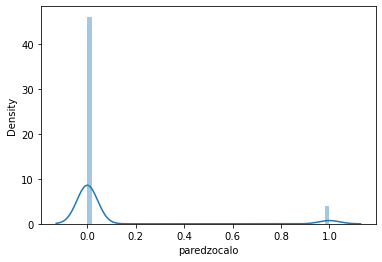

paredpreb


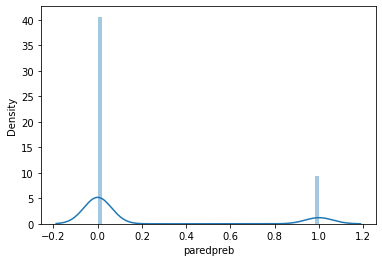

pareddes


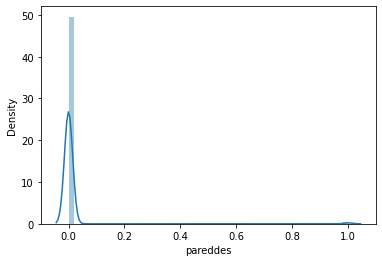

paredmad


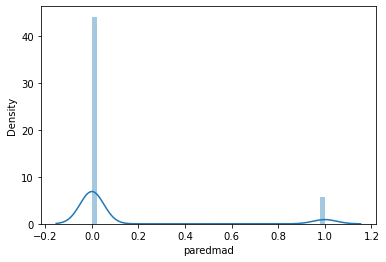

paredzinc


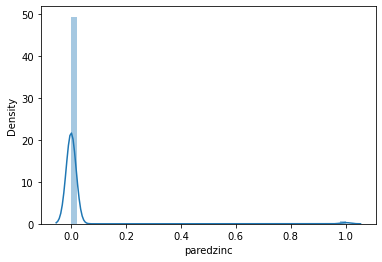

paredfibras


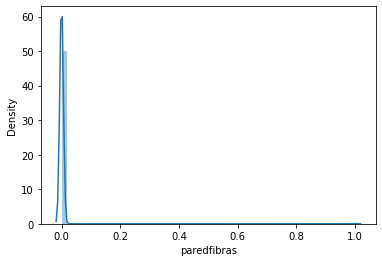

paredother


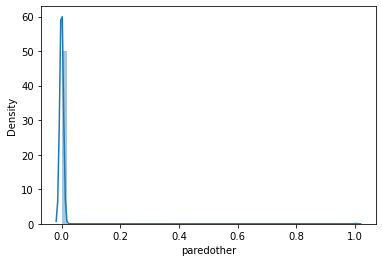

pisomoscer


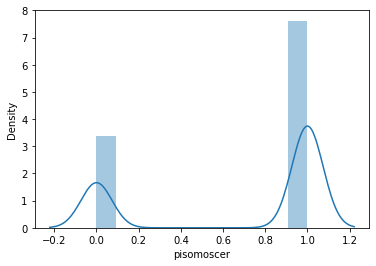

pisocemento


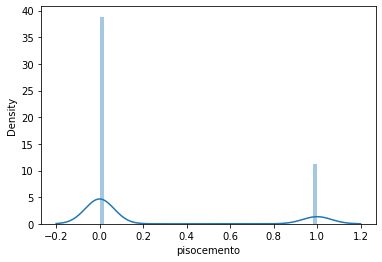

pisoother


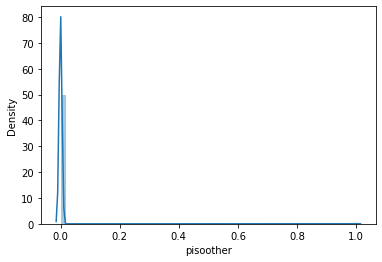

pisonatur


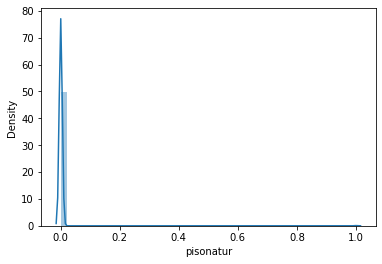

pisonotiene


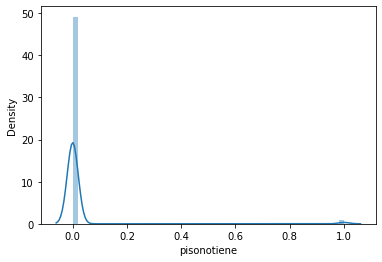

pisomadera


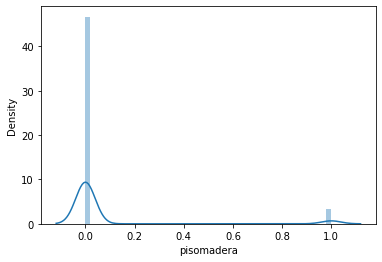

techozinc


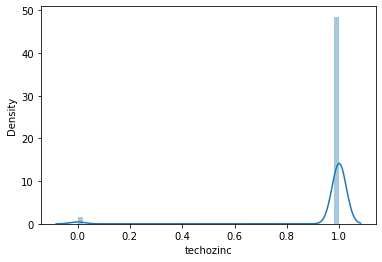

techoentrepiso


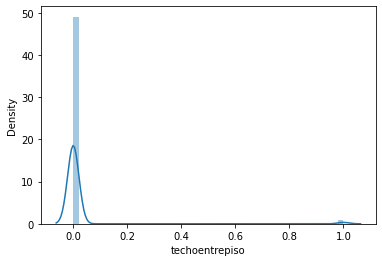

techocane


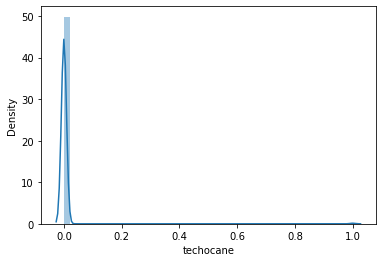

techootro


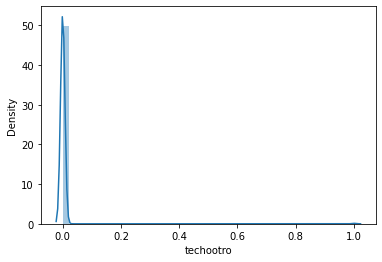

cielorazo


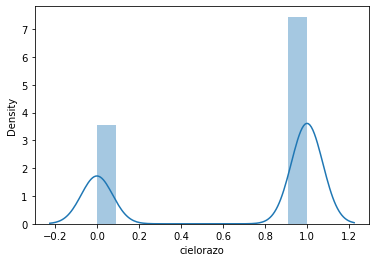

abastaguadentro


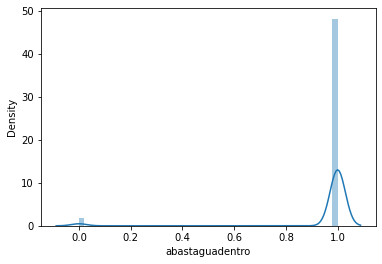

abastaguafuera


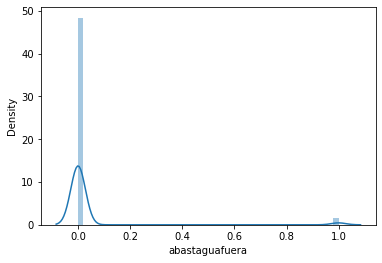

abastaguano


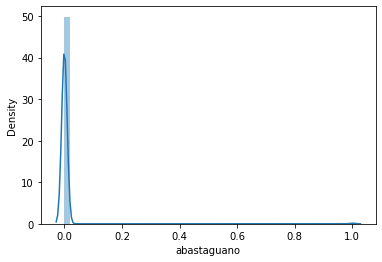

public


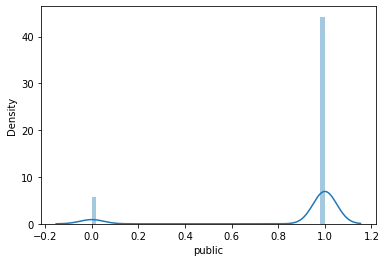

planpri


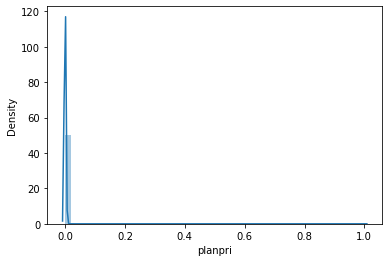

noelec


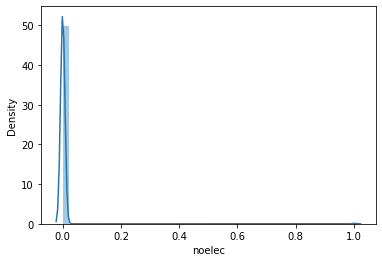

coopele


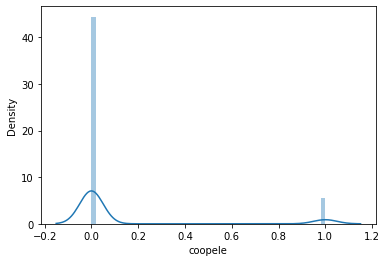

sanitario1


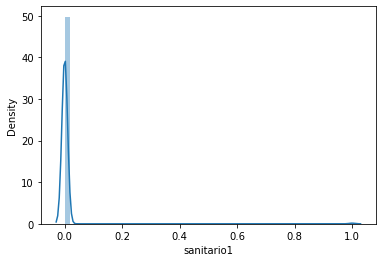

sanitario2


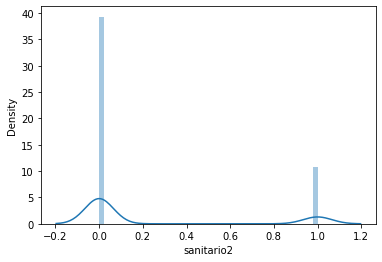

sanitario3


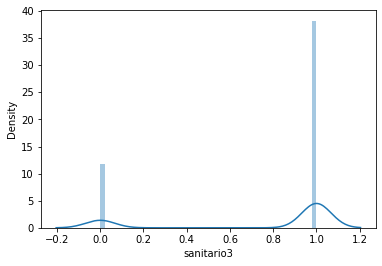

sanitario5


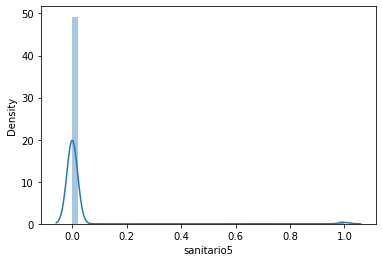

sanitario6


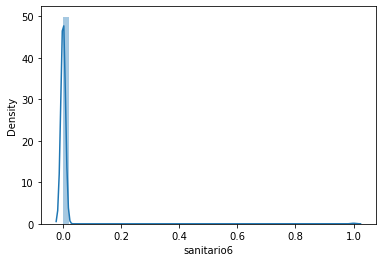

energcocinar1


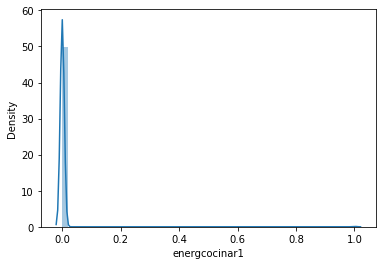

energcocinar2


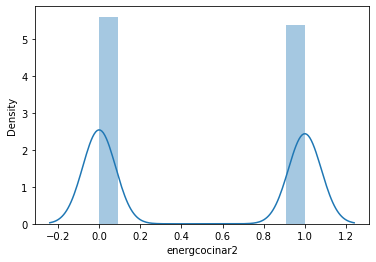

energcocinar3


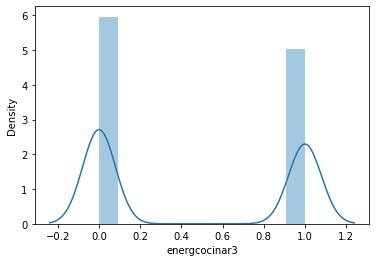

energcocinar4


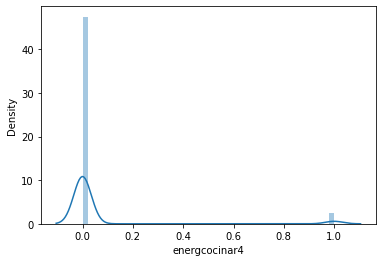

elimbasu1


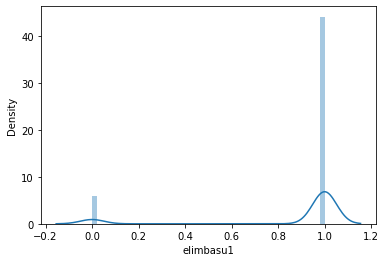

elimbasu2


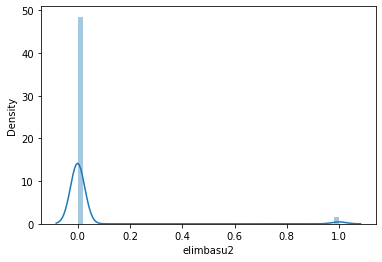

elimbasu3


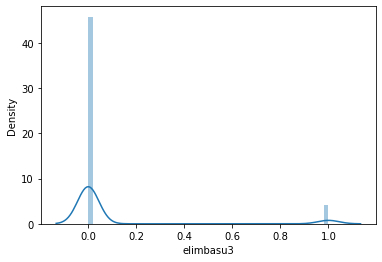

elimbasu4


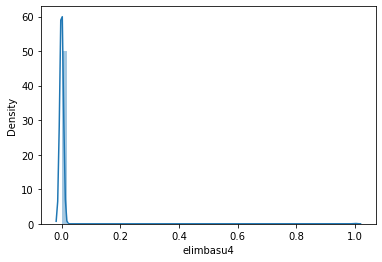

elimbasu5


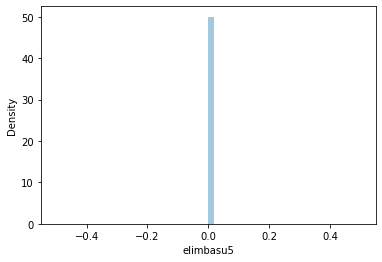

elimbasu6


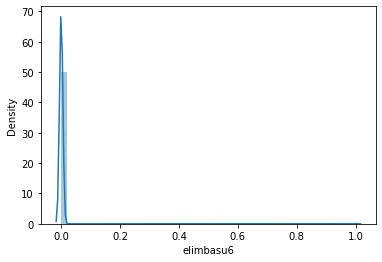

epared1


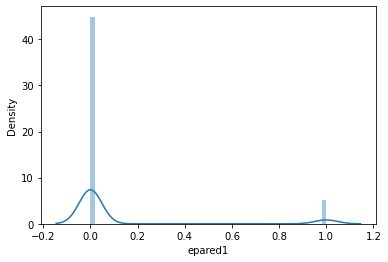

epared2


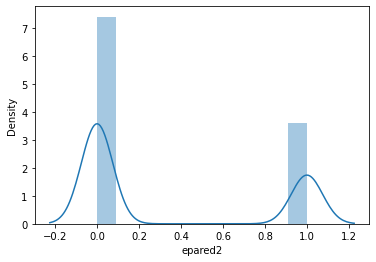

epared3


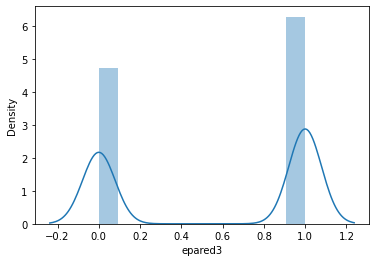

etecho1


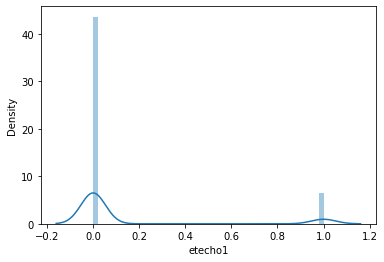

etecho2


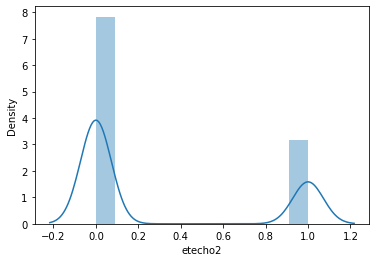

etecho3


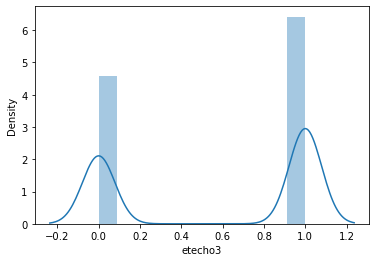

eviv1


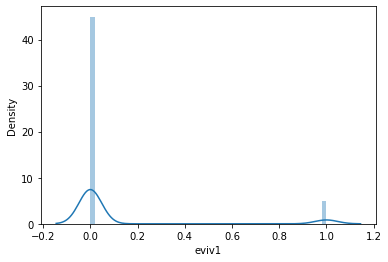

eviv2


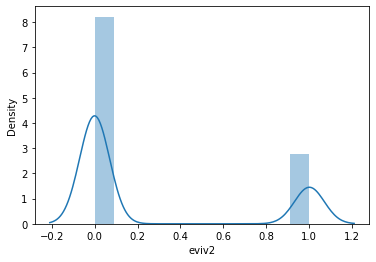

eviv3


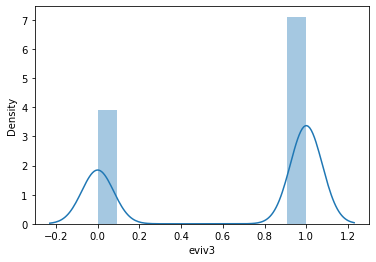

dis


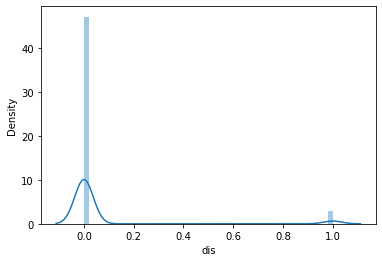

male


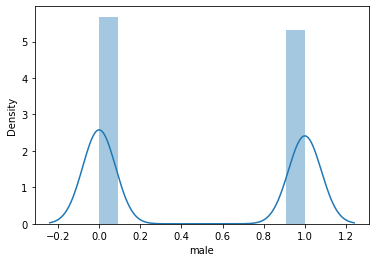

female


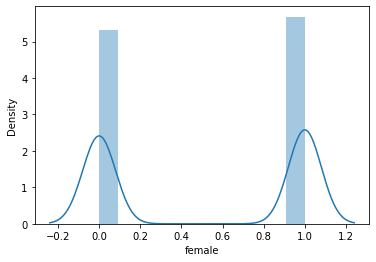

estadocivil1


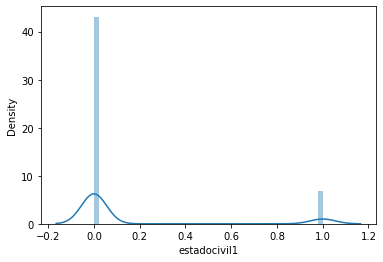

estadocivil2


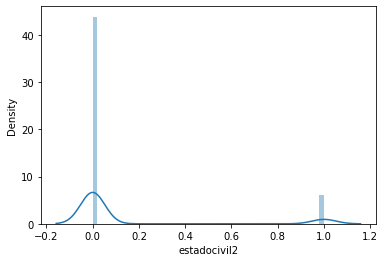

estadocivil3


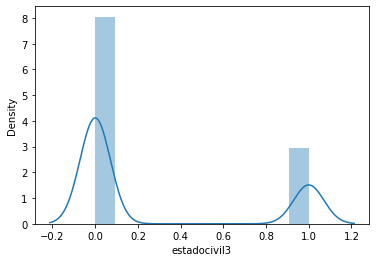

estadocivil4


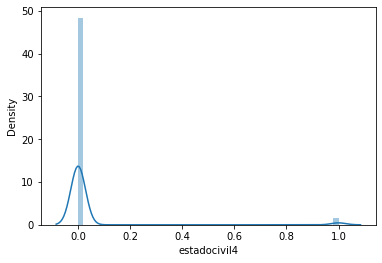

estadocivil5


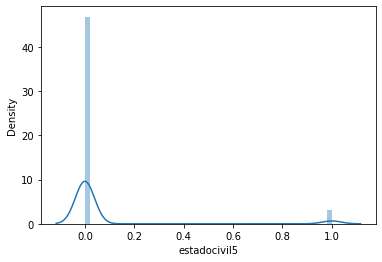

estadocivil6


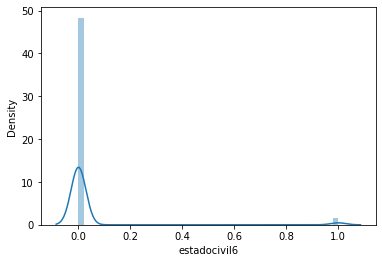

estadocivil7


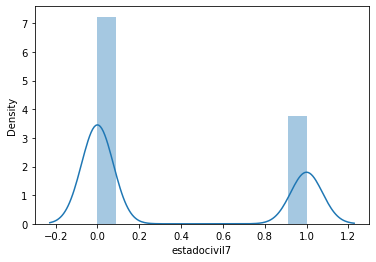

parentesco1


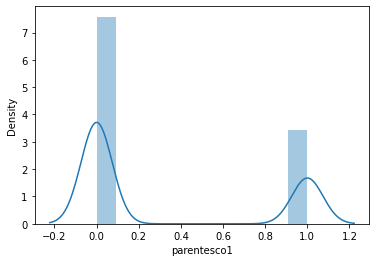

parentesco2


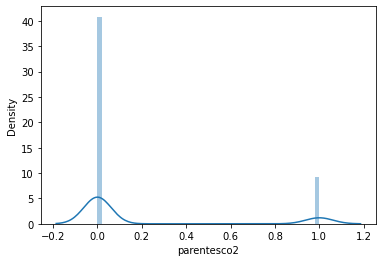

parentesco3


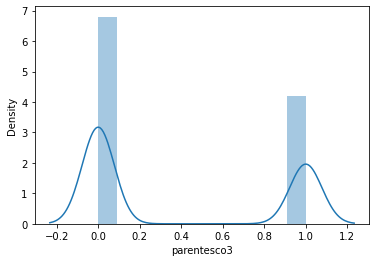

parentesco4


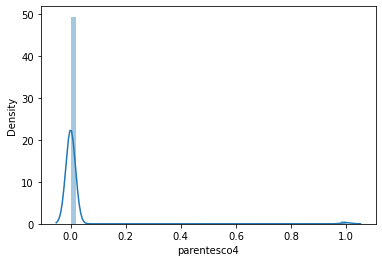

parentesco5


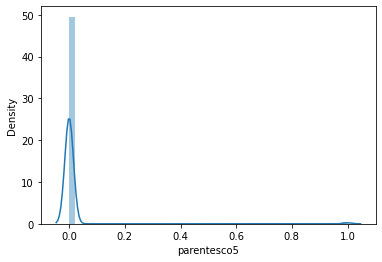

parentesco6


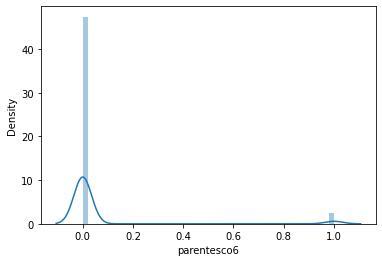

parentesco7


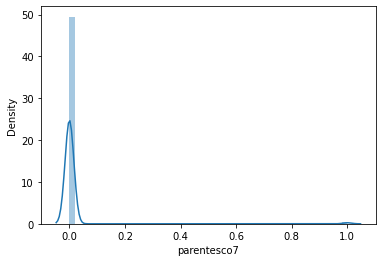

parentesco8


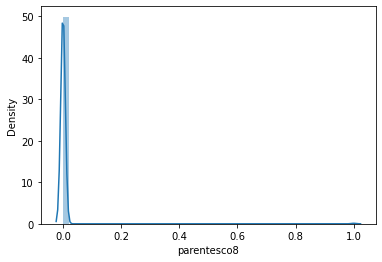

parentesco9


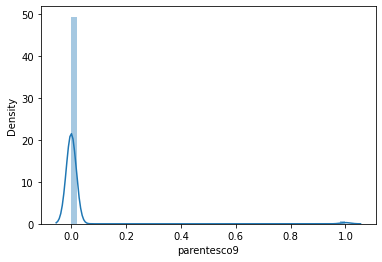

parentesco10


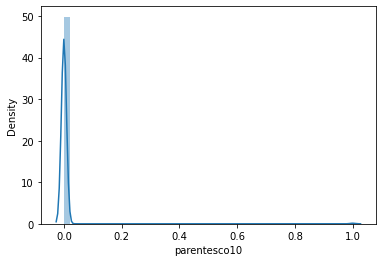

parentesco11


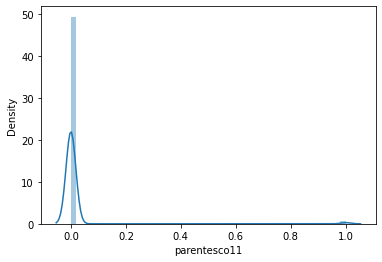

parentesco12


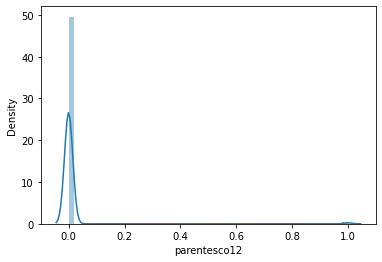

hogar_nin


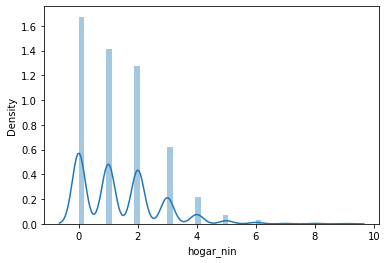

hogar_adul


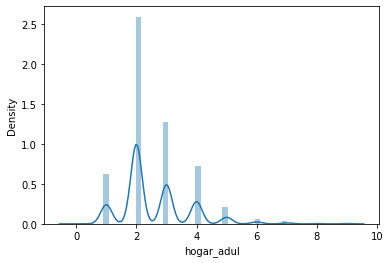

hogar_mayor


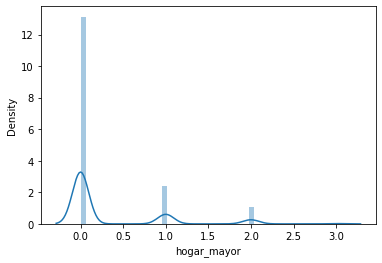

hogar_total


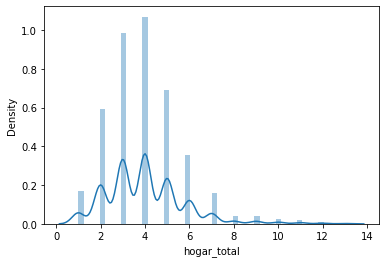

dependency


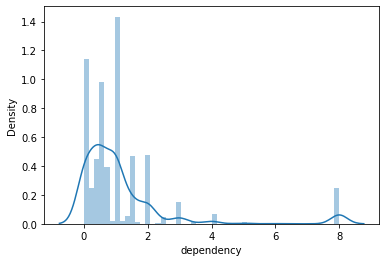

edjefe


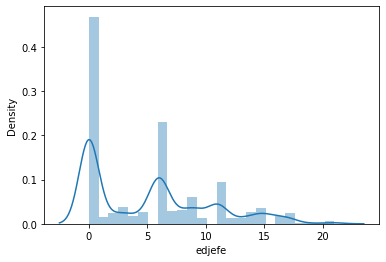

edjefa


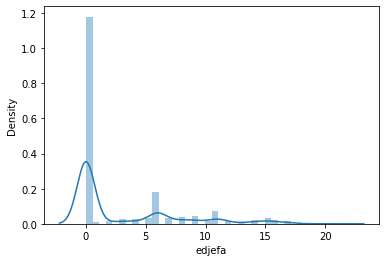

meaneduc


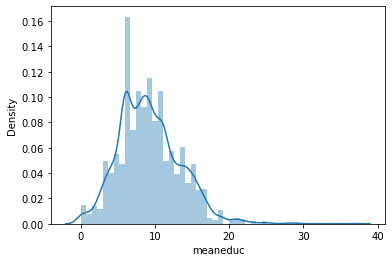

instlevel1


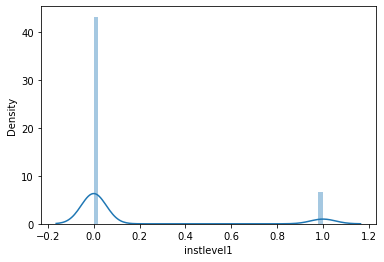

instlevel2


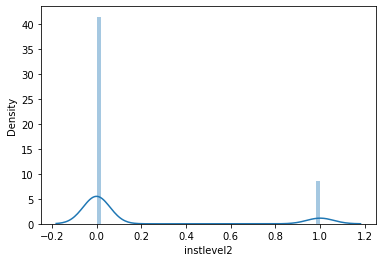

instlevel3


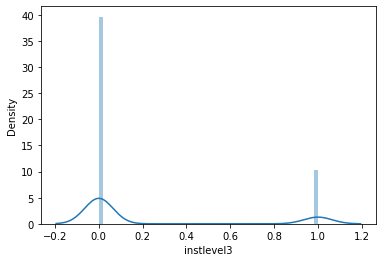

instlevel4


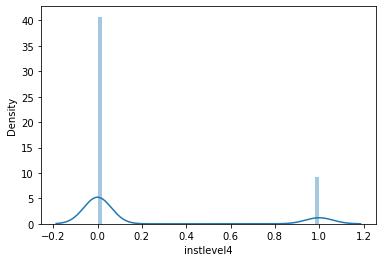

instlevel5


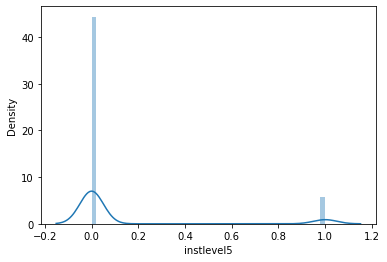

instlevel6


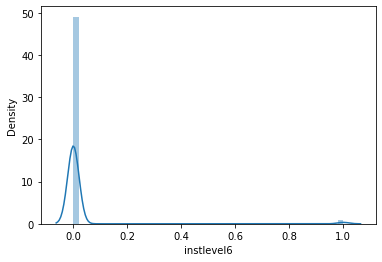

instlevel7


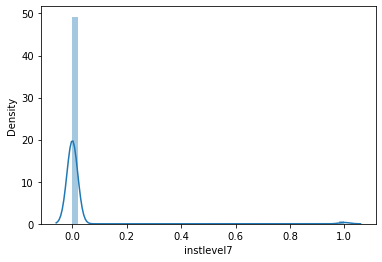

instlevel8


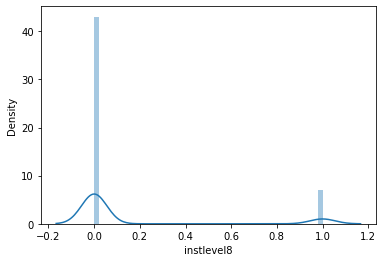

instlevel9


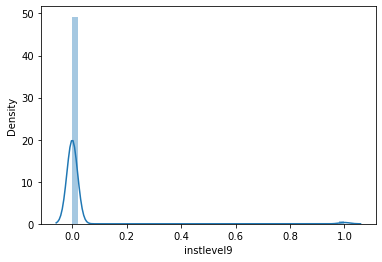

bedrooms


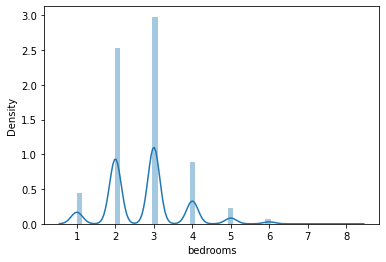

overcrowding


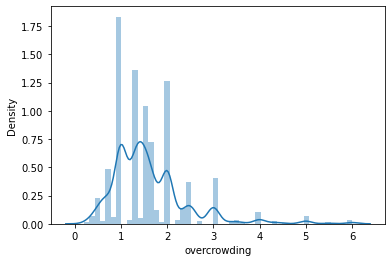

tipovivi1


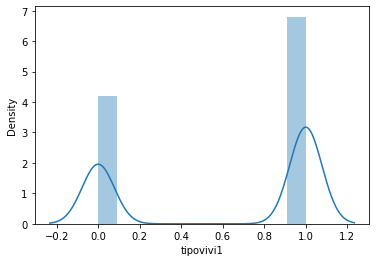

tipovivi2


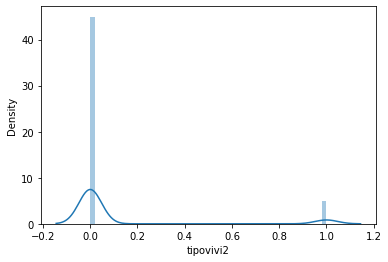

tipovivi3


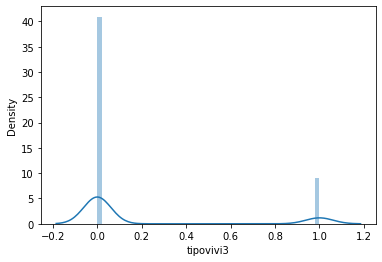

tipovivi4


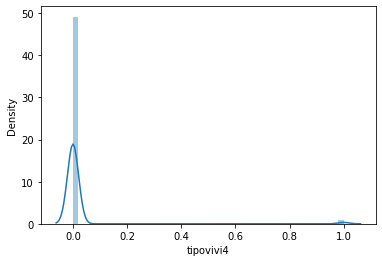

tipovivi5


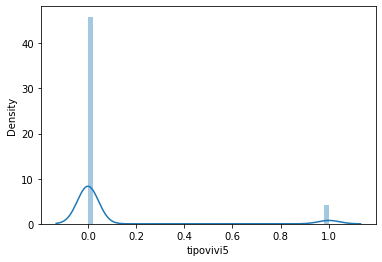

computer


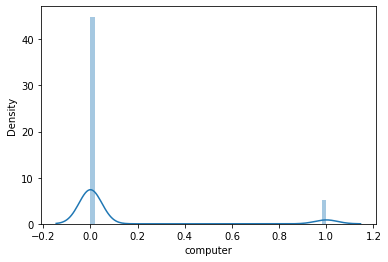

television


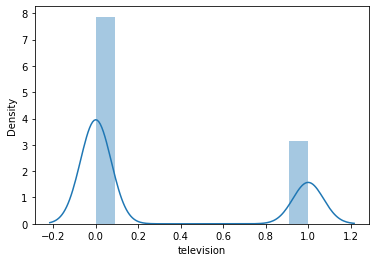

mobilephone


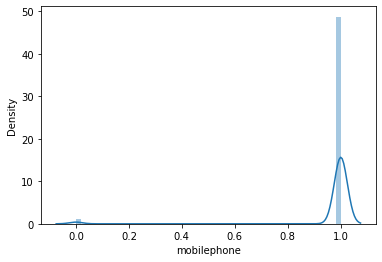

qmobilephone


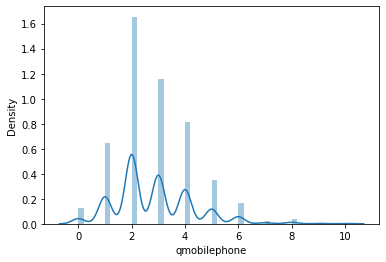

lugar1


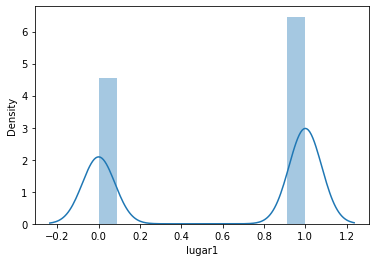

lugar2


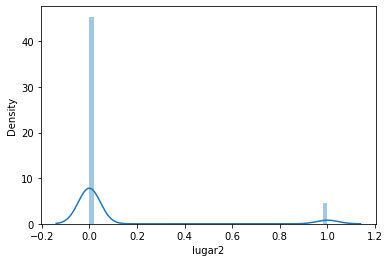

lugar3


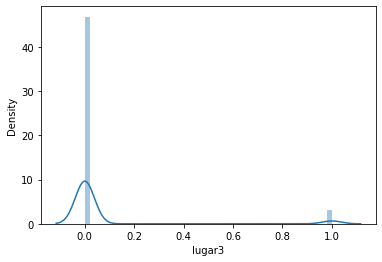

lugar4


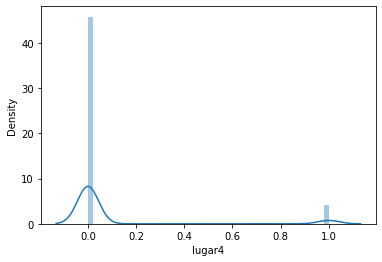

lugar5


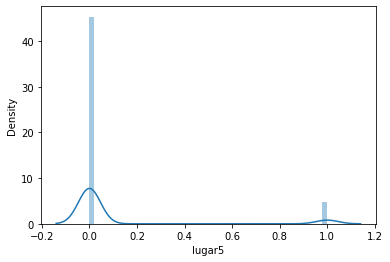

lugar6


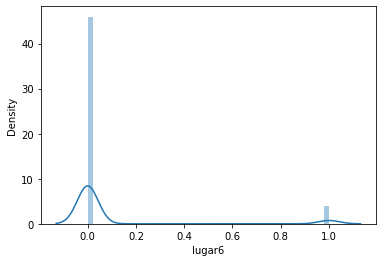

area1


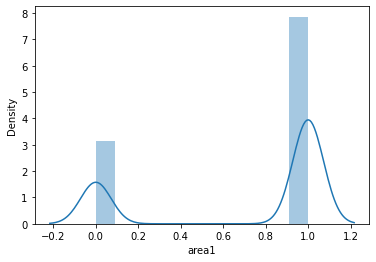

area2


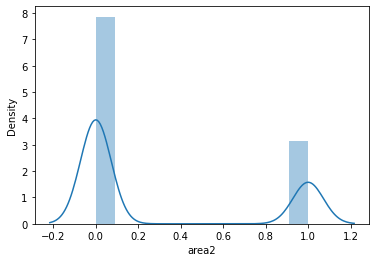

age


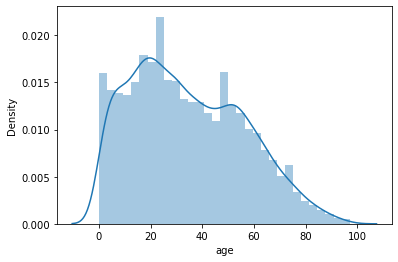

SQBescolari


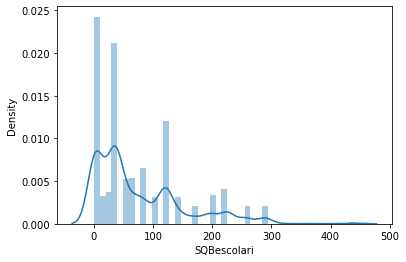

SQBage


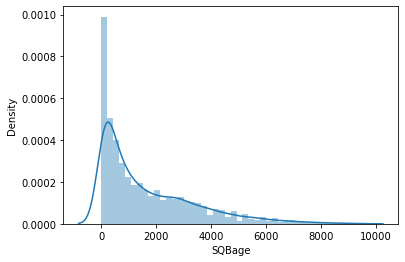

SQBhogar_total


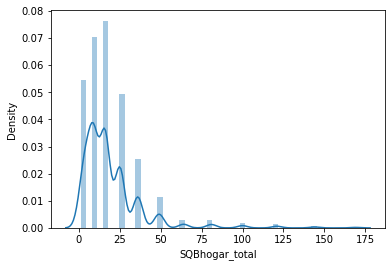

SQBedjefe


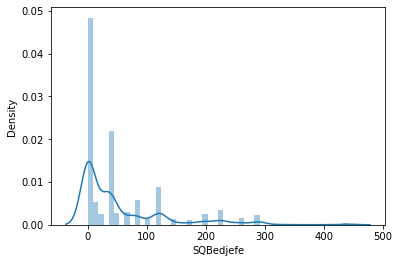

SQBhogar_nin


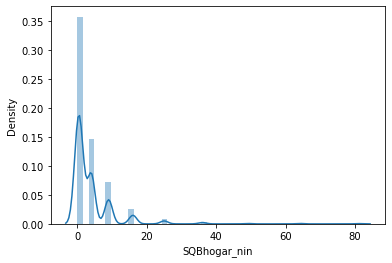

SQBovercrowding


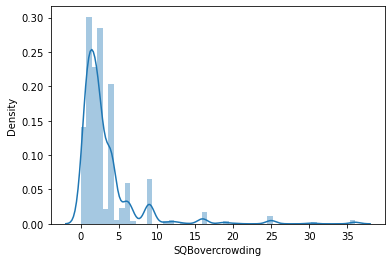

SQBdependency


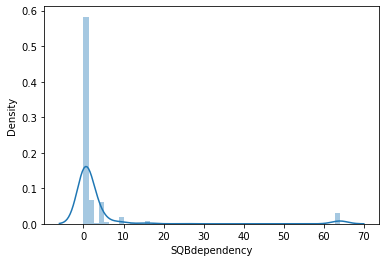

SQBmeaned


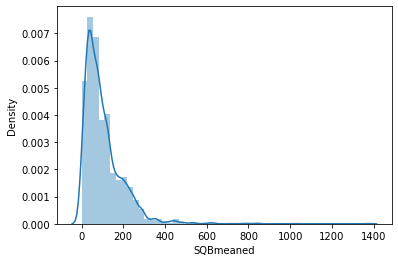

agesq


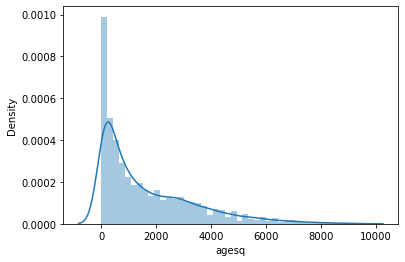

Target


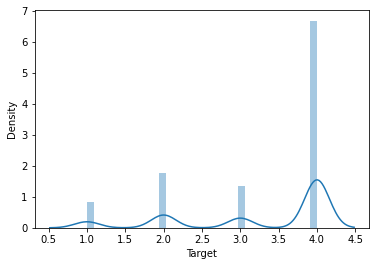

In [51]:
dis(df_tr)  #Just checking the data is ND.

v2a1


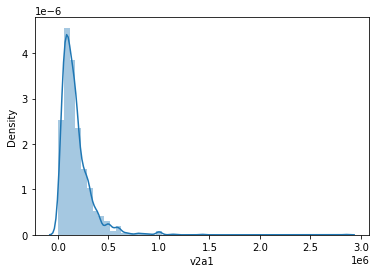

hacdor


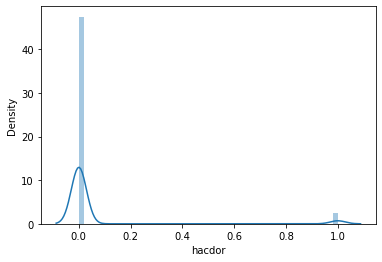

rooms


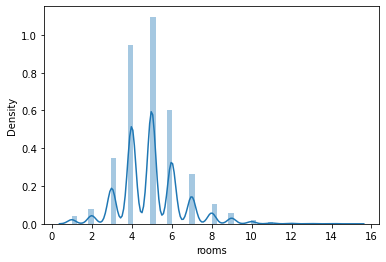

hacapo


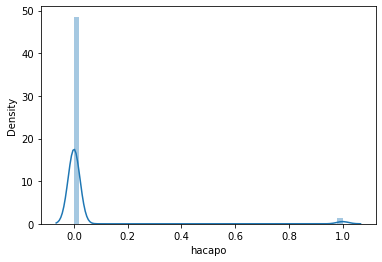

v14a


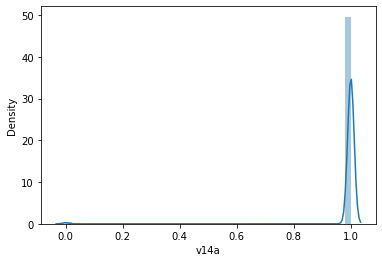

refrig


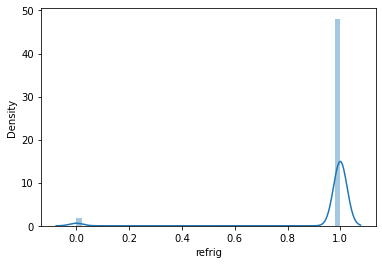

v18q


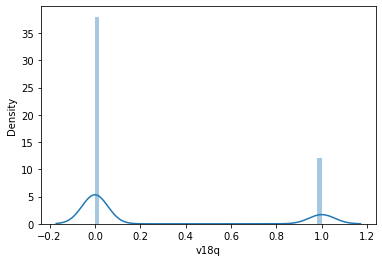

v18q1


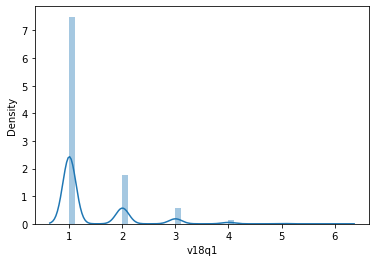

r4h1


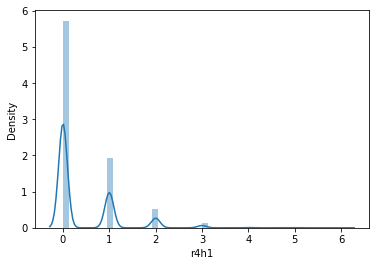

r4h2


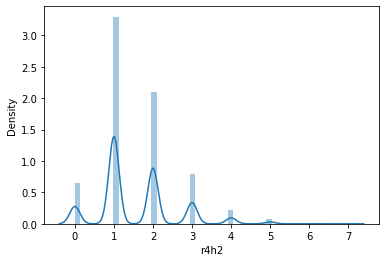

r4h3


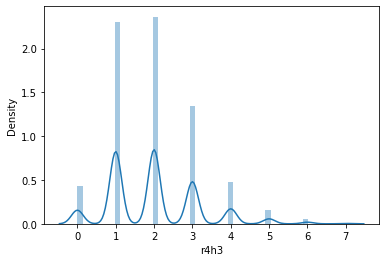

r4m1


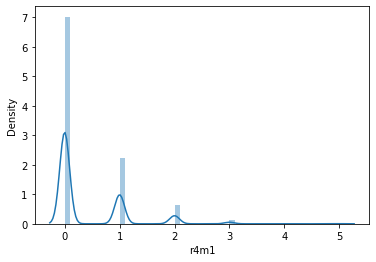

r4m2


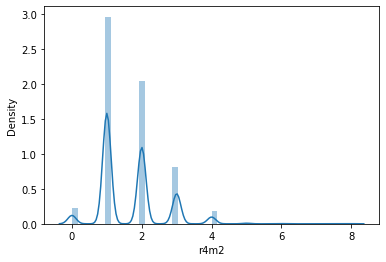

r4m3


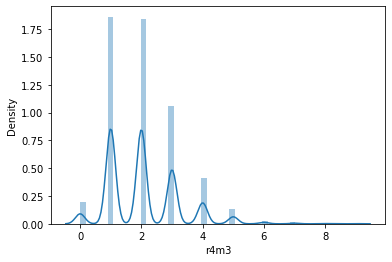

r4t1


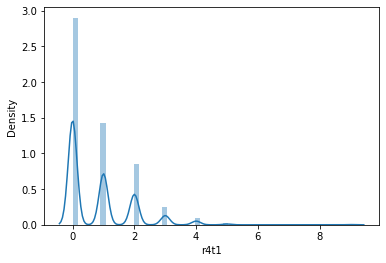

r4t2


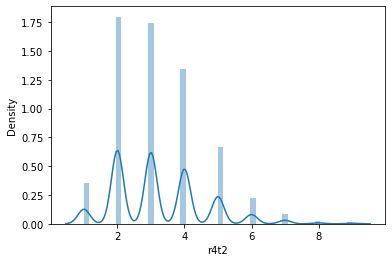

r4t3


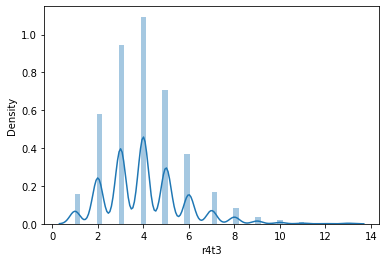

tamhog


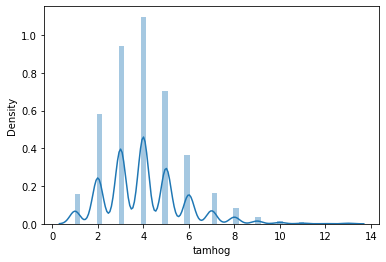

tamviv


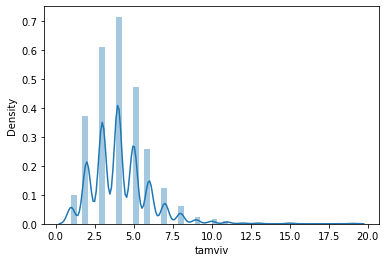

escolari


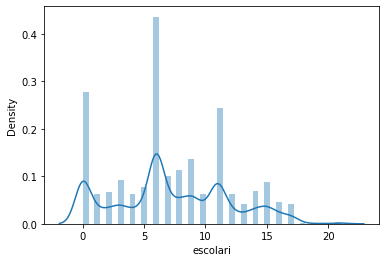

rez_esc


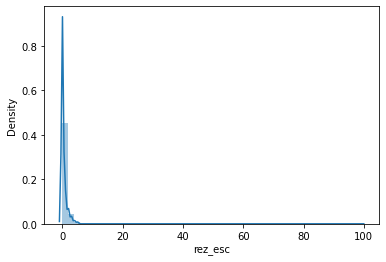

hhsize


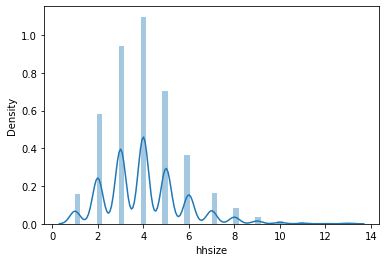

paredblolad


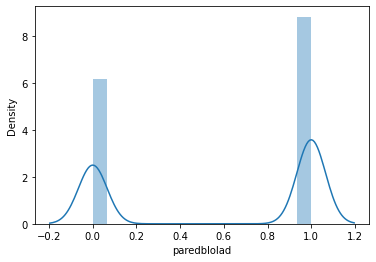

paredzocalo


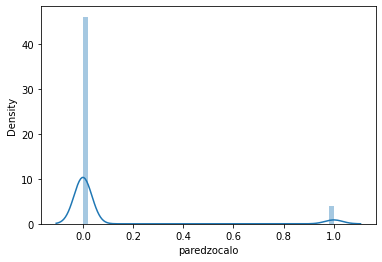

paredpreb


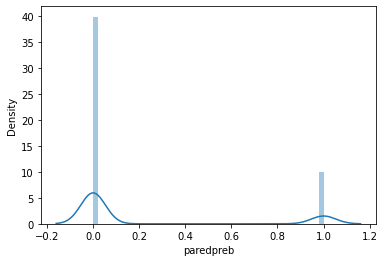

pareddes


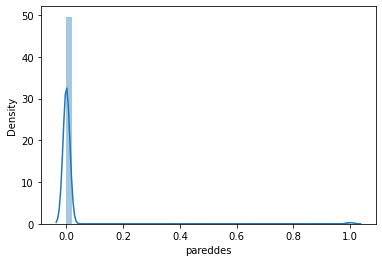

paredmad


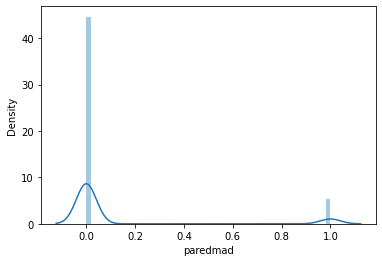

paredzinc


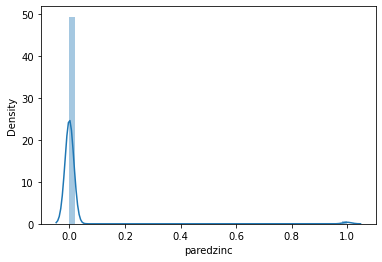

paredfibras


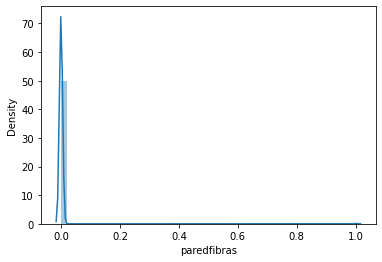

paredother


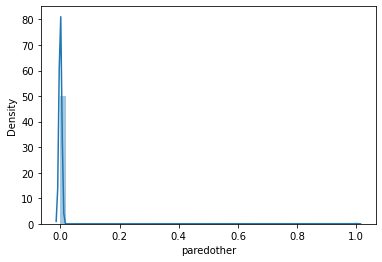

pisomoscer


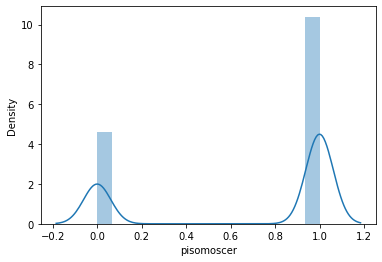

pisocemento


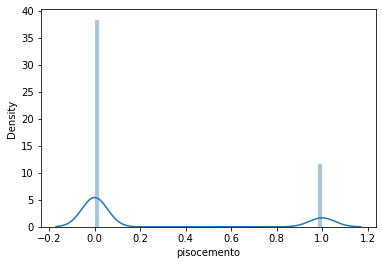

pisoother


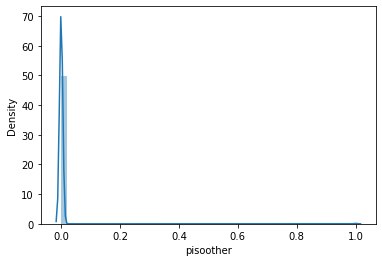

pisonatur


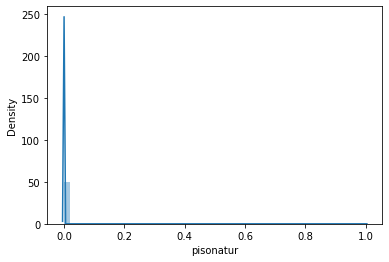

pisonotiene


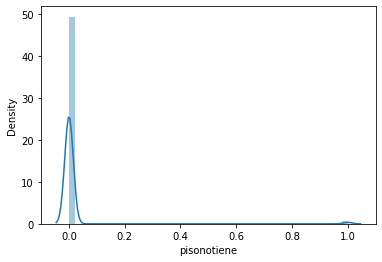

pisomadera


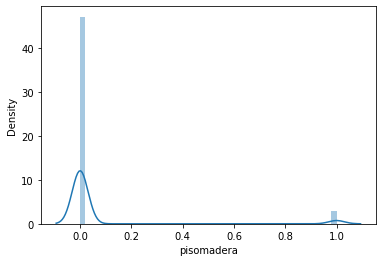

techozinc


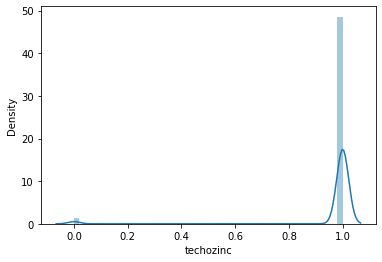

techoentrepiso


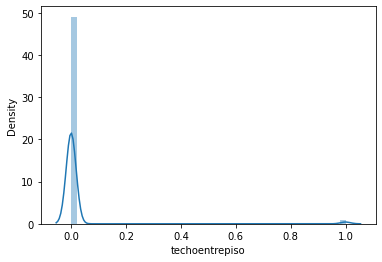

techocane


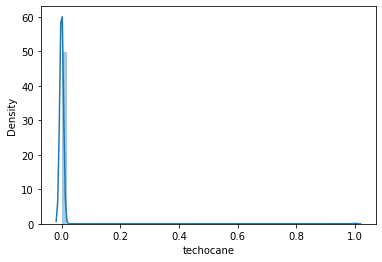

techootro


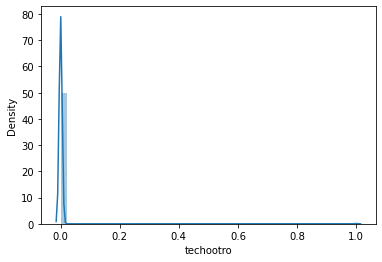

cielorazo


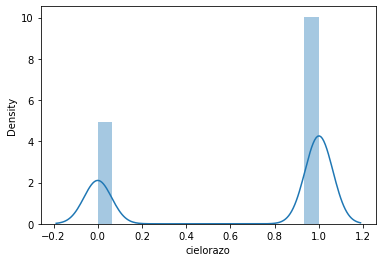

abastaguadentro


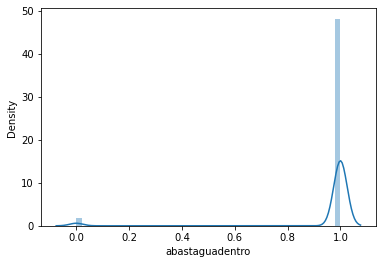

abastaguafuera


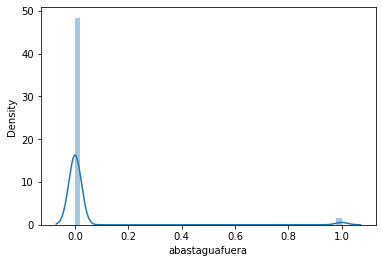

abastaguano


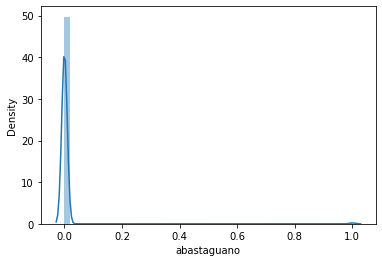

public


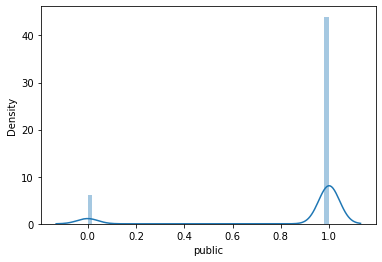

planpri


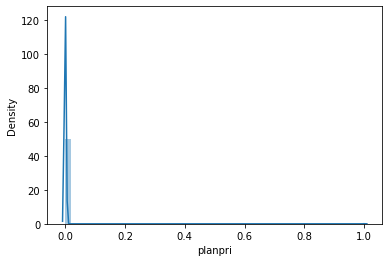

noelec


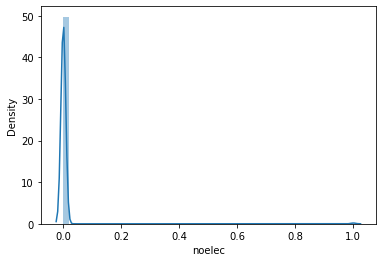

coopele


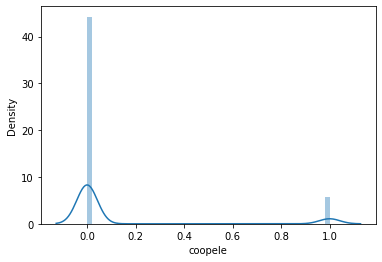

sanitario1


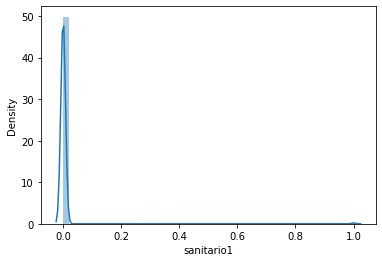

sanitario2


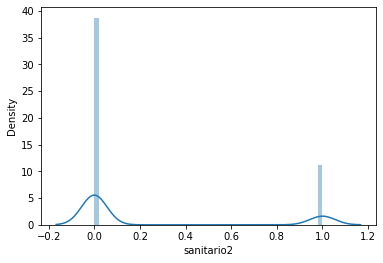

sanitario3


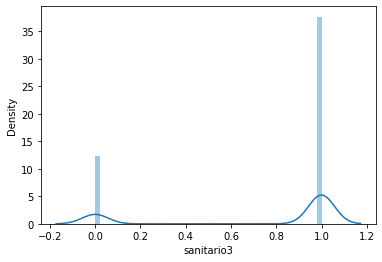

sanitario5


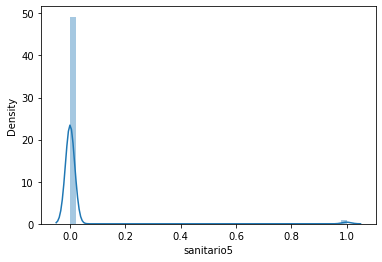

sanitario6


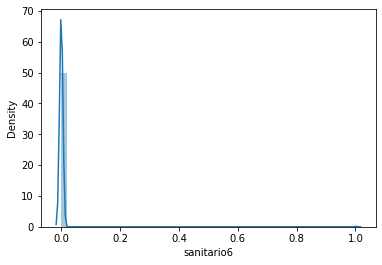

energcocinar1


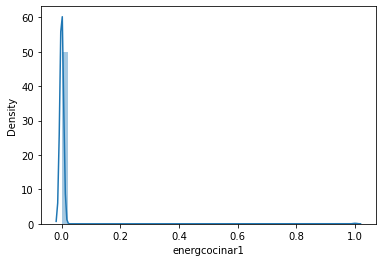

energcocinar2


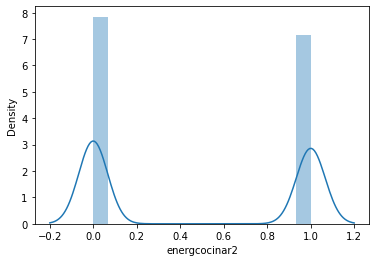

energcocinar3


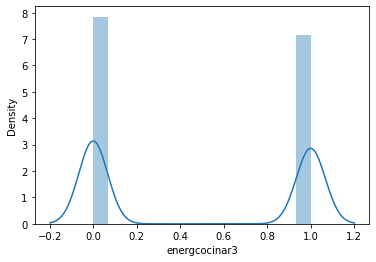

energcocinar4


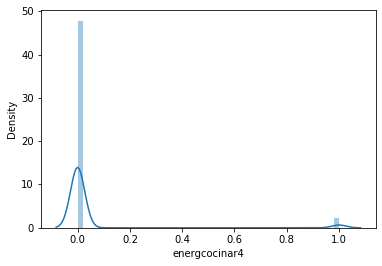

elimbasu1


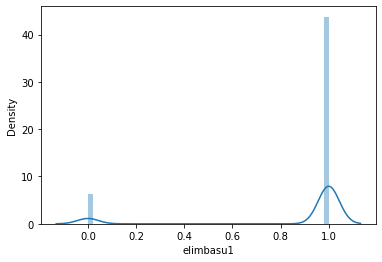

elimbasu2


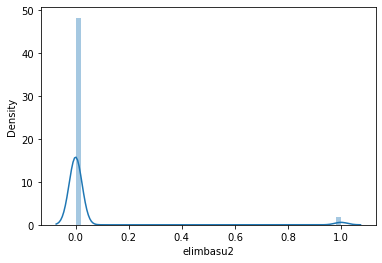

elimbasu3


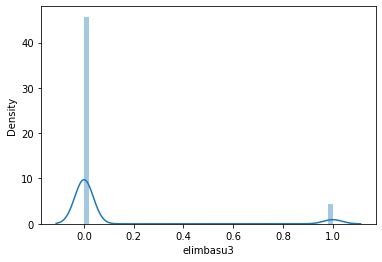

elimbasu4


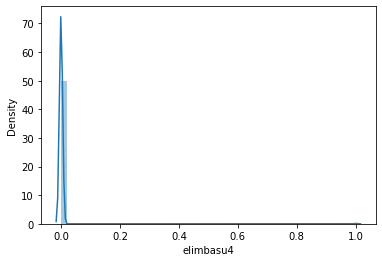

elimbasu5


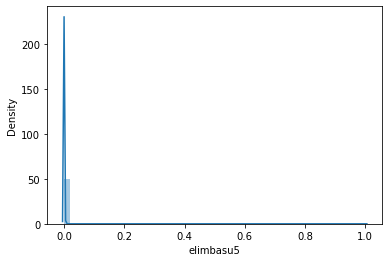

elimbasu6


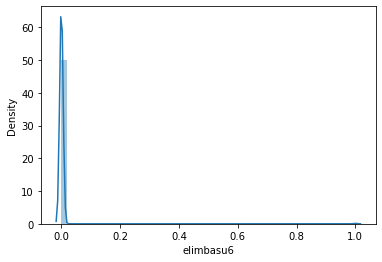

epared1


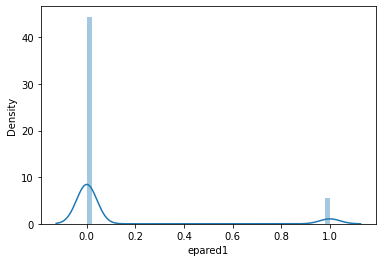

epared2


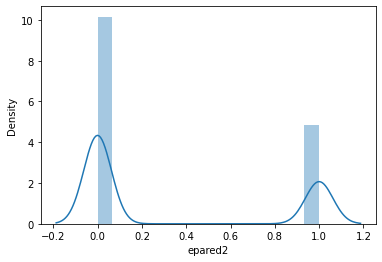

epared3


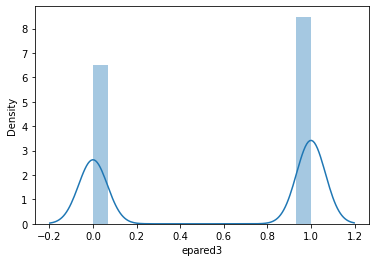

etecho1


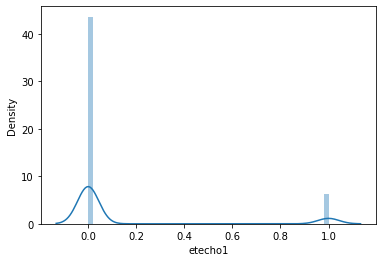

etecho2


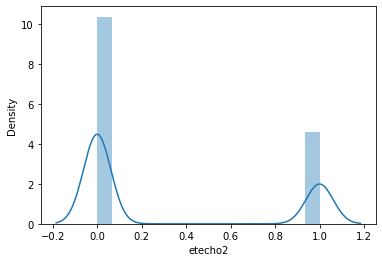

etecho3


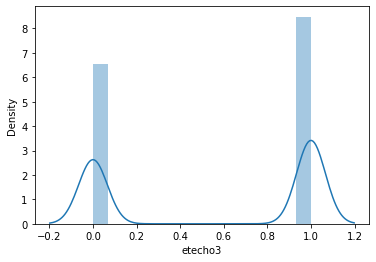

eviv1


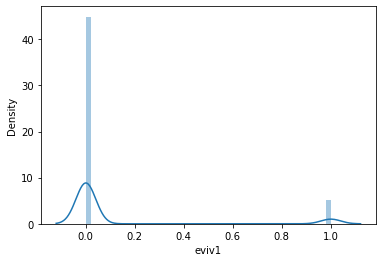

eviv2


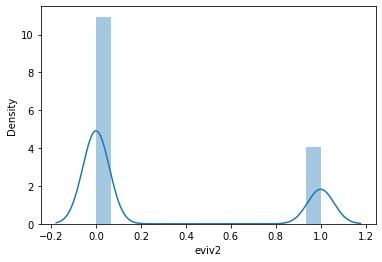

eviv3


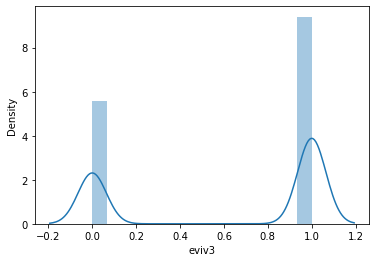

dis


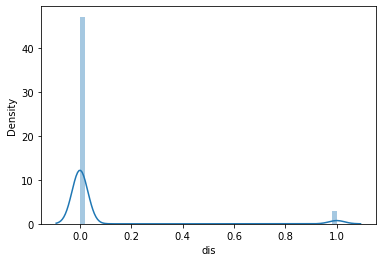

male


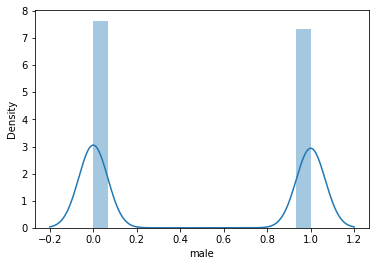

female


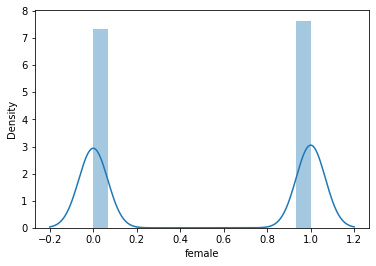

estadocivil1


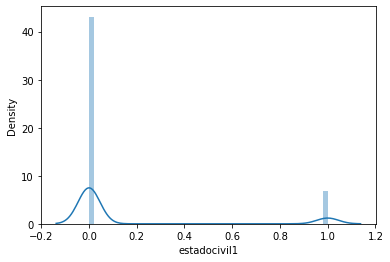

estadocivil2


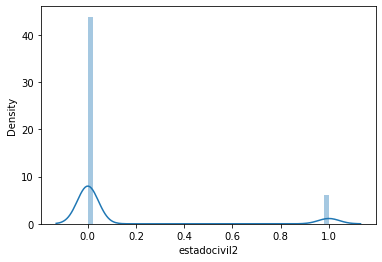

estadocivil3


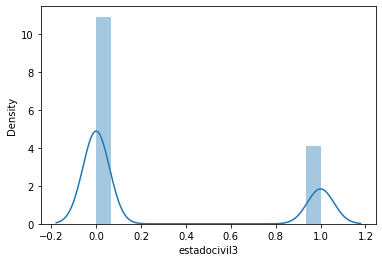

estadocivil4


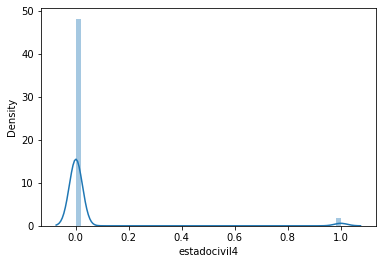

estadocivil5


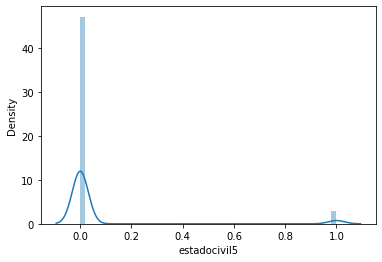

estadocivil6


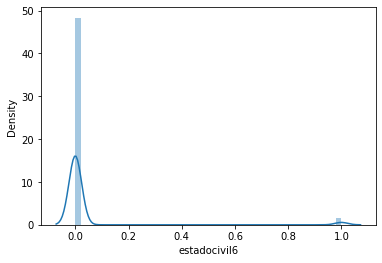

estadocivil7


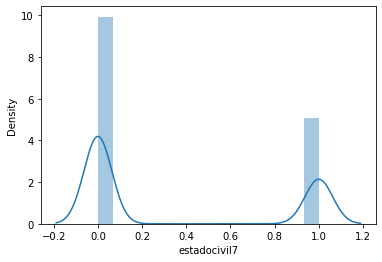

parentesco1


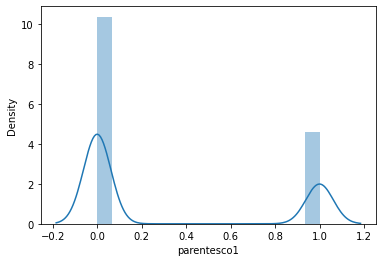

parentesco2


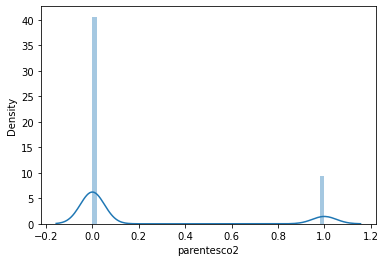

parentesco3


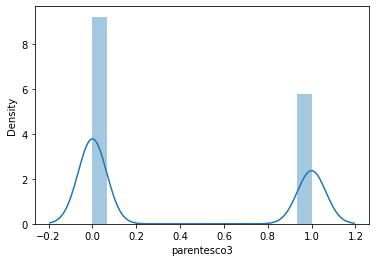

parentesco4


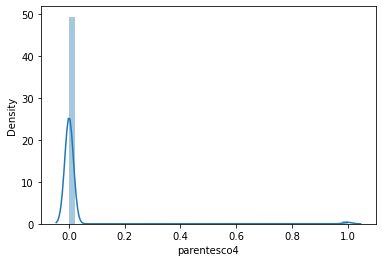

parentesco5


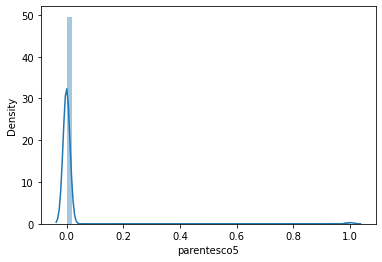

parentesco6


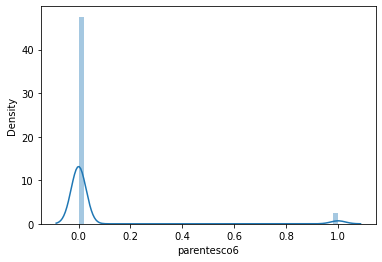

parentesco7


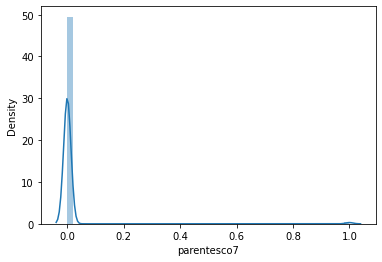

parentesco8


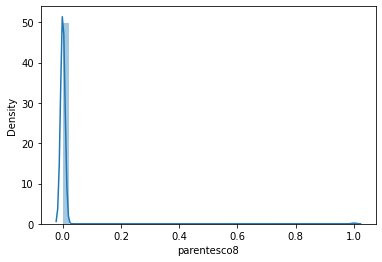

parentesco9


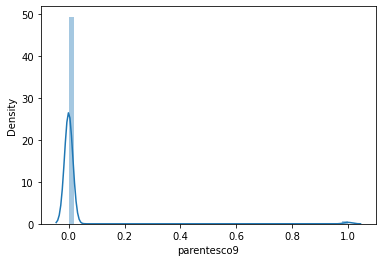

parentesco10


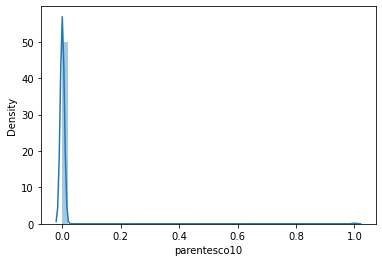

parentesco11


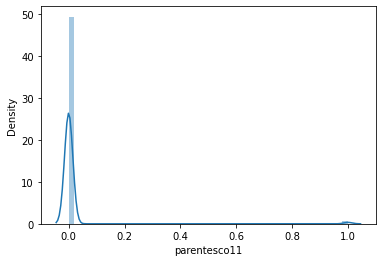

parentesco12


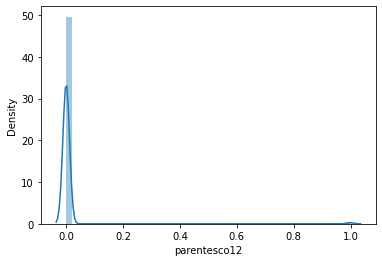

hogar_nin


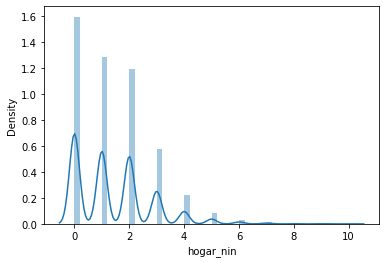

hogar_adul


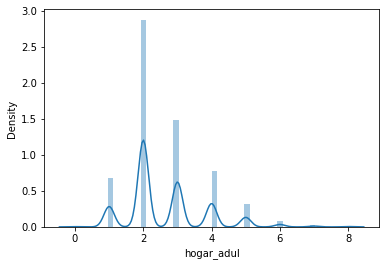

hogar_mayor


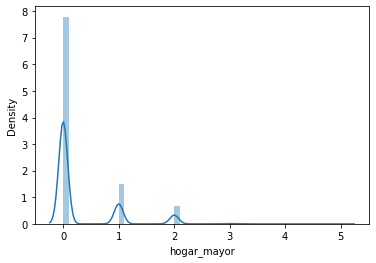

hogar_total


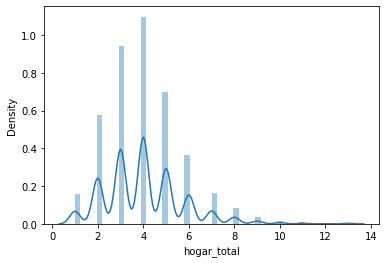

dependency


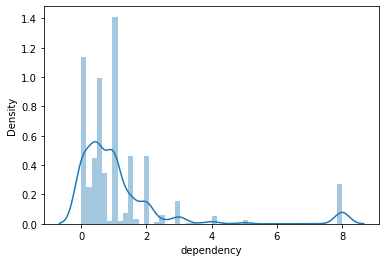

edjefe


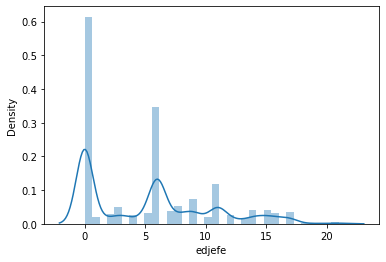

edjefa


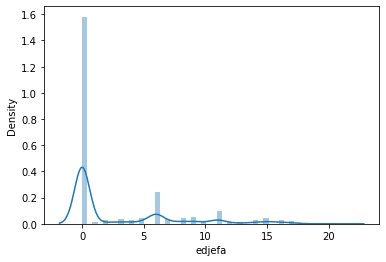

meaneduc


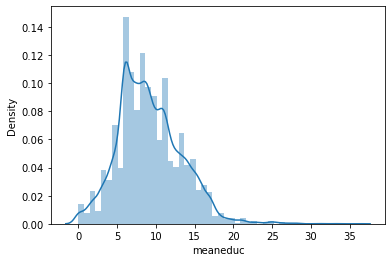

instlevel1


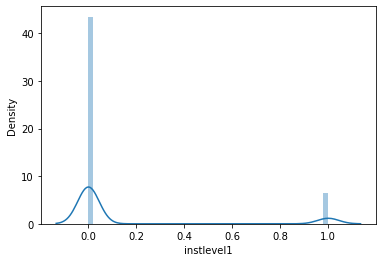

instlevel2


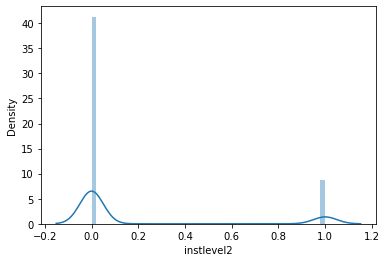

instlevel3


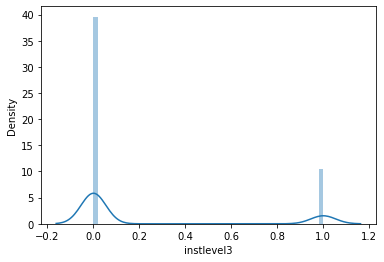

instlevel4


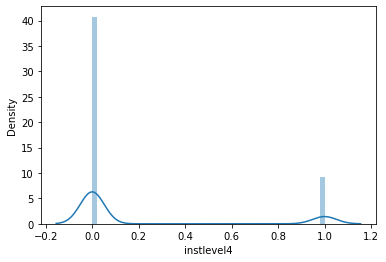

instlevel5


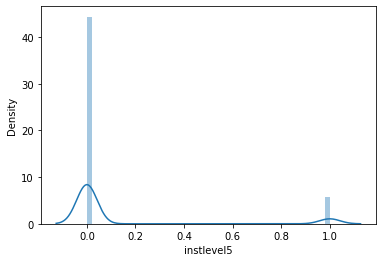

instlevel6


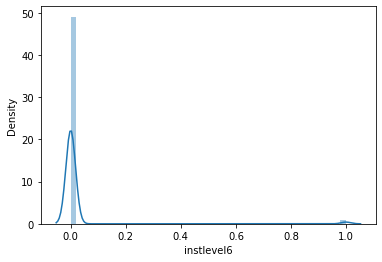

instlevel7


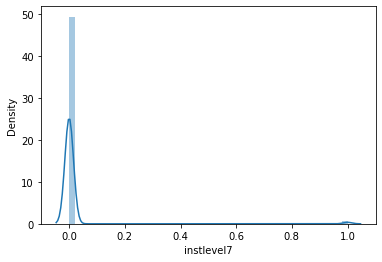

instlevel8


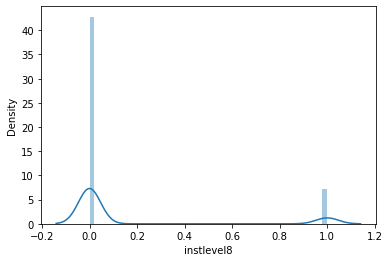

instlevel9


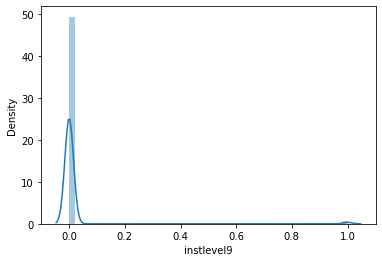

bedrooms


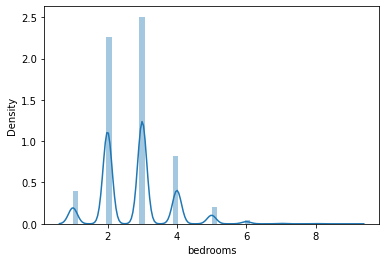

overcrowding


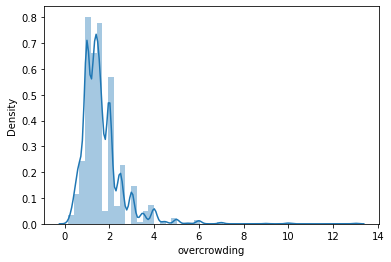

tipovivi1


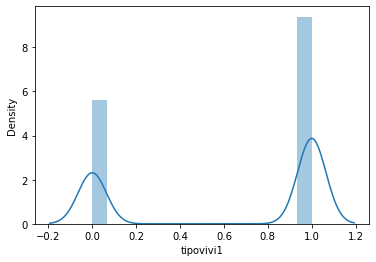

tipovivi2


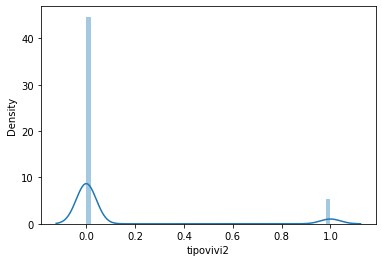

tipovivi3


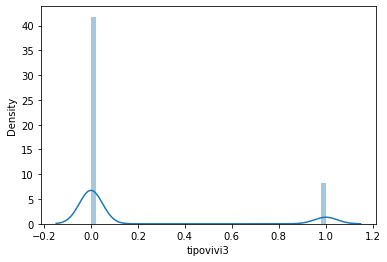

tipovivi4


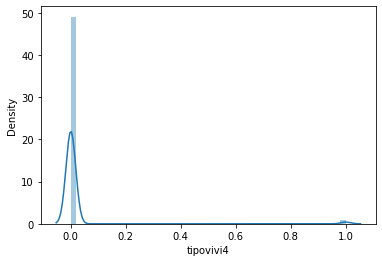

tipovivi5


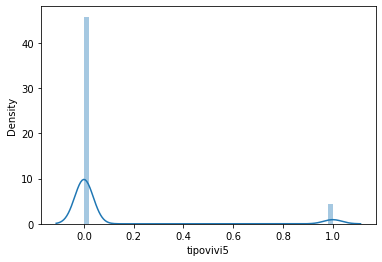

computer


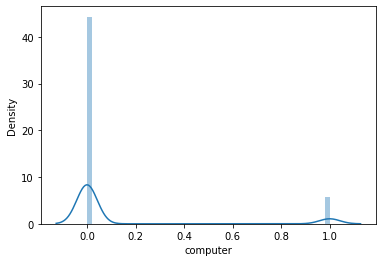

television


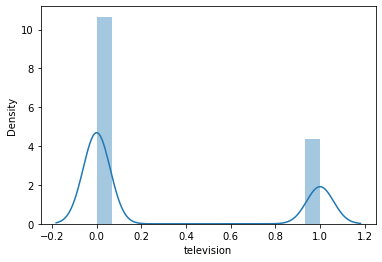

mobilephone


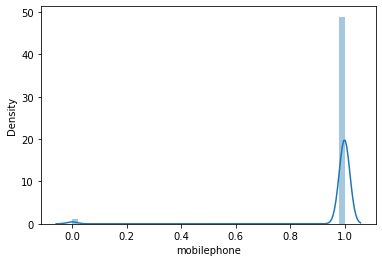

qmobilephone


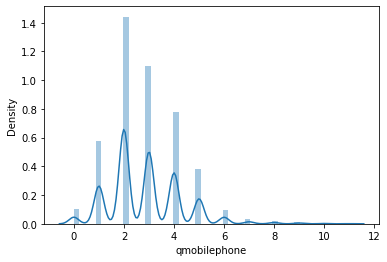

lugar1


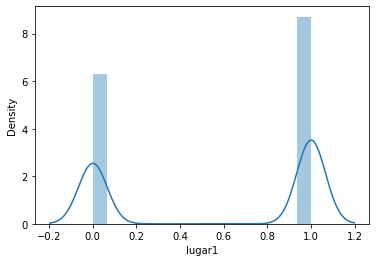

lugar2


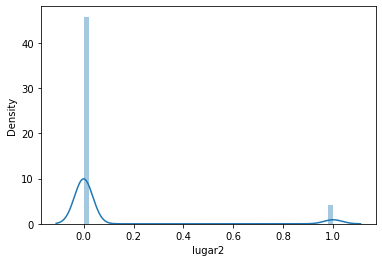

lugar3


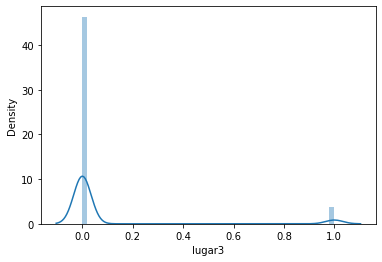

lugar4


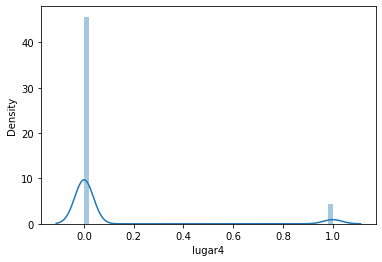

lugar5


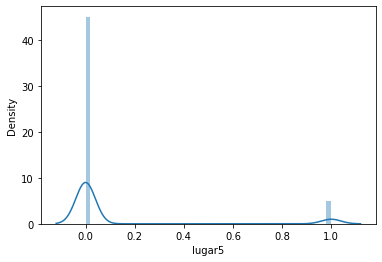

lugar6


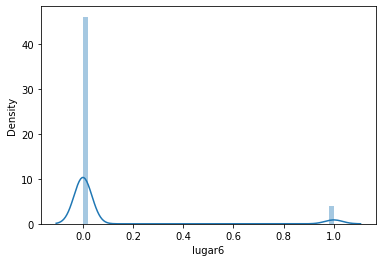

area1


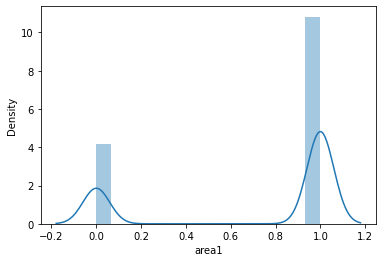

area2


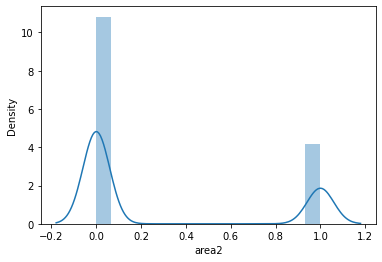

age


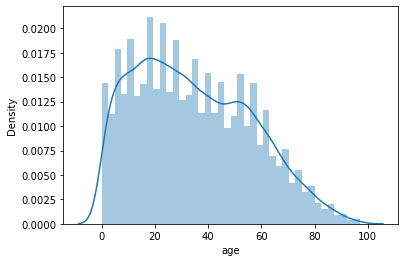

SQBescolari


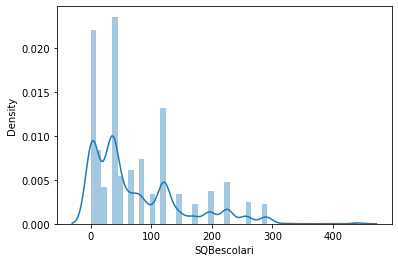

SQBage


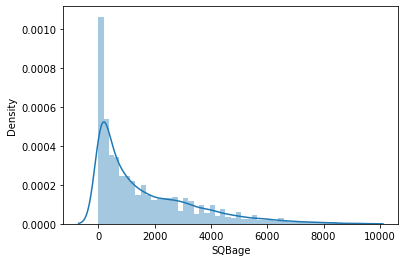

SQBhogar_total


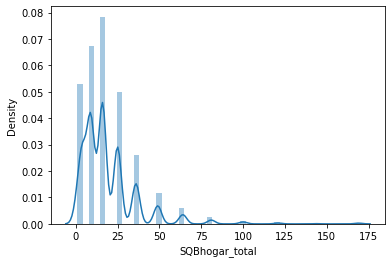

SQBedjefe


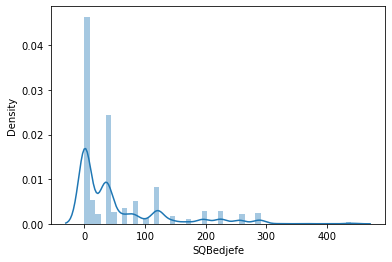

SQBhogar_nin


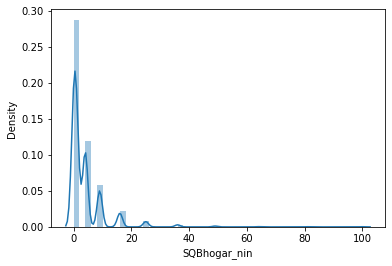

SQBovercrowding


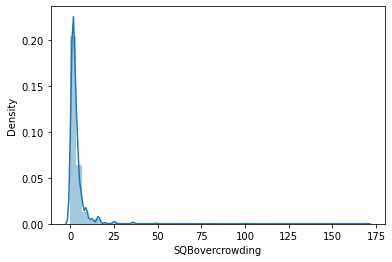

SQBdependency


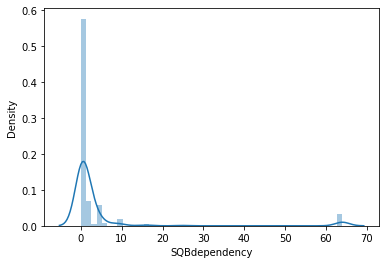

SQBmeaned


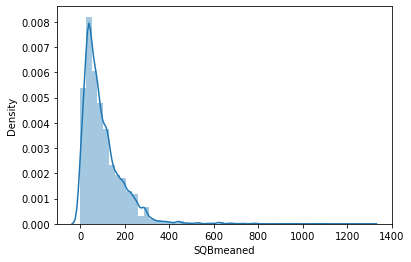

agesq


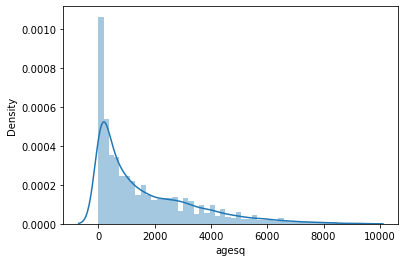

In [52]:
dis(df_te)

#### 4. Check whether all members of the house have the same poverty level.

In [53]:
#Here variable r4t3 tells the total persons in the house and 
#Target variable tells the poverty level. Hence will try to plot some bi-variate charts to see the variation

sorted(df_tr['r4t3'].unique())

#we see that there is 13 people in the house as maximum

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

<AxesSubplot:xlabel='r4t3', ylabel='count'>

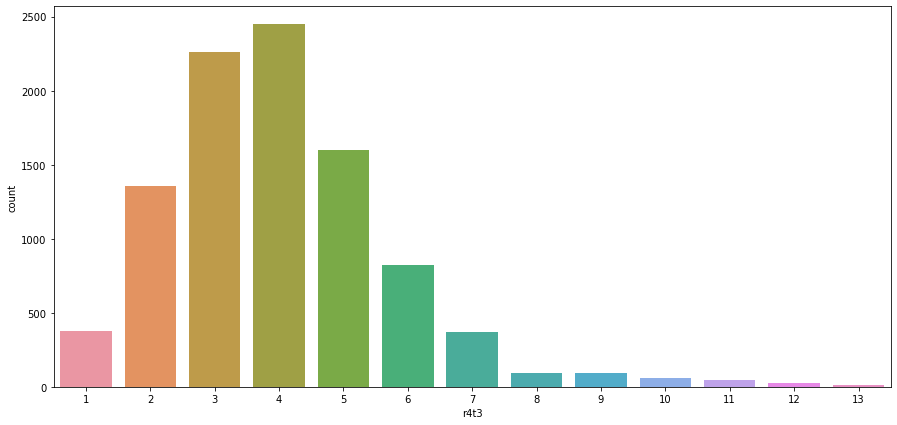

In [54]:
plt.figure(figsize = (15,7))
sns.countplot(df_tr['r4t3'])  #we see that most of the house has 4 members, 3 members, 5 members respectively

<AxesSubplot:xlabel='r4t3', ylabel='count'>

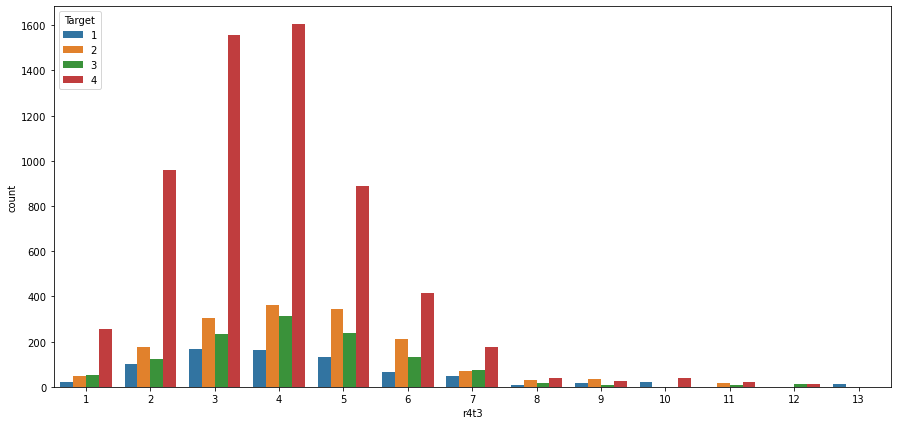

In [55]:
plt.figure(figsize = (15,7))
sns.countplot(df_tr['r4t3'], hue = df_tr['Target'])  #we see that members of house has different poverty levels

In [56]:
a = df_tr.groupby('Target')['r4t3'].value_counts()

a = pd.DataFrame(a)

In [57]:
a.index.names = ['Target','Members']

a.reset_index(inplace = True)

a = a.rename(columns = {'r4t3':'Count'})

In [58]:
a.sort_values(['Members','Target']).head(10)

#from the below data we can see that the poverty level, members of house and count of respective members in that poverty Le
#for example1, Where the members of house has 1 and poverty level is 1 has 20 houses
#for example2, Where the members of house has 1 and poverty level is 4 has 257 houses
#for example3, Where the members of house has 3 and poverty level is 1 has 166 houses

Target  Members  Count
6        1        1     20
17       2        1     47
27       3        1     54
37       4        1    257
3        1        2     99
15       2        2    176
25       3        2    122
34       4        2    958
0        1        3    166
13       2        3    303

In [59]:
a.sort_values(['Count']).head(1)

Target  Members  Count
31       3       11      7

In [60]:
a.sort_values(['Count'], ascending=False).head(1)

Target  Members  Count
32       4        4   1604

<AxesSubplot:xlabel='Members', ylabel='Count'>

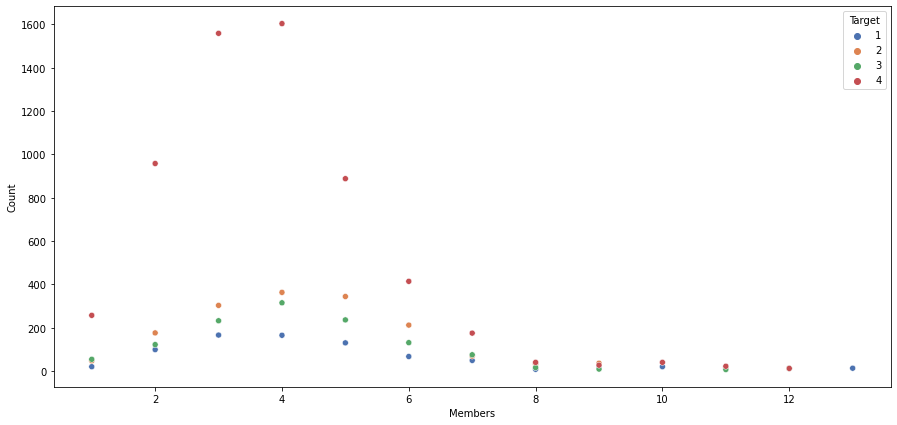

In [61]:
plt.figure(figsize = (15,7))
sns.scatterplot(a['Members'],a['Count'], hue = a['Target'], palette="deep")

#from the scatterplot, we see that where the house has 4 members has the poverty level of 4 is maximim and 
#where the house has 11 members has the poverty level of 3 is minimum

#Conclusion: No members of the house have the same poverty level.

#### 5. Check if there is a house without a family head.

In [62]:
#Below variables shows the information regarding family head

#Here parentesco1 =1 if household head

#edjefe, years of education of male head of household, based on the interaction of \
#escolari (years of education), head of household and gender, yes=1 and no=0

#edjefa, years of education of female head of household, based on the interaction of \
#escolari (years of education), head of household and gender, yes=1 and no=0

In [63]:
df_tr['parentesco1'].unique()

array([1, 0], dtype=int64)

In [64]:
df_tr['parentesco1'].value_counts() #According to this variable 6584 houses has no head.

0    6584
1    2973
Name: parentesco1, dtype: int64

In [65]:
df_tr[df_tr['edjefe'] == 0].shape[0] #houses which has no male head

3762

In [66]:
df_tr[df_tr['edjefe'] != 0].shape[0] #houses which has male head

5795

In [67]:
df_tr[df_tr['edjefa'] == 0].shape[0] #houses which has no female head

6230

In [68]:
df_tr[df_tr['edjefa'] != 0].shape[0] #houses which has female head

3327

In [69]:
df_tr.shape[0] - (df_tr[df_tr['edjefe'] != 0].shape[0] + df_tr[df_tr['edjefa'] != 0].shape[0])

#Total houses - (houses which has male head + houses which has female head)

#Conclusion: 435 houses have no head.

435

#### 6. Set poverty level of the members and the head of the house within a family.

In [70]:
#poverty level of the family can be defined with number of variables present in the data

#like
#area1, =1 zona urbana
#area2, =2 zona rural
#tipovivi1, =1 own and fully paid house
#tipovivi2, "=1 own, paying in installments"
#tipovivi3, =1 rented
#v2a1, Monthly rent payment


#Here i am considering two variables to find out the poverty level of the family. ie v2a1 and area1

#Here i have made 3 categories to analize the data.
#1. Above poverty
#2. poverty
#3. Below poverty
#Here i am assuming people who has not paying rent will considered as no poverty and not considered to evalute.

In [71]:
df_tr['area1'].value_counts()

#6829 people living in urban area
#2728 people living in rural area

1    6829
0    2728
Name: area1, dtype: int64

In [72]:
df_tr['area2'].value_counts()

#6829 people living in urban area
#2728 people living in rural area

0    6829
1    2728
Name: area2, dtype: int64

In [73]:
df_tr['v2a1'].count()

#2697 people who are paying rent

2697

In [74]:
df_tr['tipovivi3'].value_counts()

#1736 people who own house and paying installments

0    7821
1    1736
Name: tipovivi3, dtype: int64

In [75]:
df_tr['tipovivi2'].value_counts()

#961 people are living in rented house

0    8596
1     961
Name: tipovivi2, dtype: int64

In [76]:
1736 + 961 

#people who own house and paying installments + people are living in rented house
#which is equal to people who are paying rent ie df_tr['v2a1']

2697

In [77]:
df_tr['v2a1'].isnull().sum()  

#before going to find the poverty level. I see some null present in the v2a1 variable which is not paying rent\
#so will fill null values as 0.

6860

In [78]:
df_tr['v2a1'].fillna(0,inplace=True)
df_te['v2a1'].fillna(0,inplace=True)

In [79]:
pov = df_tr[df_tr['v2a1'] !=0]

pov.shape

(2668, 141)

In [80]:
pov.groupby('area1')['v2a1'].apply(np.median)

#For rural area level if people paying rent less than 80000 is under below poverty level and greater than 80000 is under\
#above poverty level

#For Urban area level if people paying rent less than 140000 is under below poverty level and greater than 140000 is\
#under above poverty level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [81]:
def poverty(x):
    if x<80000:
        return('Below poverty level')
    elif x>140000:
        return('Above poverty level')
    elif x<140000:
        return('poverty')

In [82]:
a = pov['v2a1'].apply(poverty)

In [83]:
a.head()

0    Above poverty level
1                poverty
3    Above poverty level
4    Above poverty level
5    Above poverty level
Name: v2a1, dtype: object

In [84]:
pd.crosstab(a,pov['area1'])

#According to my scale of poverty level. below is the analysis:
#In urban 1103 families has above poverty level, 418 families has below poverty level and 663 families has poverty
#In rural 139 families has above poverty level, 208 families has below poverty level and 98 families has poverty

area1                  0     1
v2a1                          
Above poverty level  139  1103
Below poverty level  208   418
poverty               98   663

#### 7. Count how many null values are existing in columns.

In [85]:
null = df_tr.isnull().sum().to_frame().reset_index()

In [86]:
null.head()

index  0
0    v2a1  0
1  hacdor  0
2   rooms  0
3  hacapo  0
4    v14a  0

In [87]:
null.columns = ['var','sum_null']

null['per_null'] = round((null['sum_null']/df_tr.shape[0])*100,2)

null.head()

var  sum_null  per_null
0    v2a1         0       0.0
1  hacdor         0       0.0
2   rooms         0       0.0
3  hacapo         0       0.0
4    v14a         0       0.0

In [88]:
null['sum_null'].unique()

array([   0, 7342, 7928,    5], dtype=int64)

In [89]:
null[null['sum_null'] != 0] 

#we see that 4 variables has null values
#below table shows the details
#sum_null = sum of null values
#per_null = percentage of null values for that particular variable

var  sum_null  per_null
7        v18q1      7342     76.82
20     rez_esc      7928     82.95
101   meaneduc         5      0.05
138  SQBmeaned         5      0.05

In [90]:
null.tail(2)  #Target variable has no null values

var  sum_null  per_null
139   agesq         0       0.0
140  Target         0       0.0

#### 8. Remove null value rows of the target variable.

In [91]:
#from the above step we found 4 variables with null values (1 variable(v2a1) is already filled null values in step 6 \
#to perform some operation)

#v18q1, rez_esc, meaneduc and SQBmeaned has null values. Variable defination explained below.

# v18q1, number of tablets household owns
# rez_esc, Years behind in school
# meaneduc,average years of education for adults (18+)
# SQBmeaned, square of the mean years of education of adults (>=18) in the household

null[null['sum_null'] != 0] 

var  sum_null  per_null
7        v18q1      7342     76.82
20     rez_esc      7928     82.95
101   meaneduc         5      0.05
138  SQBmeaned         5      0.05

In [92]:
df_tr['v18q1'].unique()

df_tr['v18q1'].value_counts() #It looks like most of the households don't have tablets. filling nan with value 0

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [93]:
df_tr['v18q1'] = df_tr['v18q1'].fillna(0)

df_tr['v18q1'].value_counts()

0.0    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [94]:
df_tr['rez_esc'].unique() 

# i see 82.95~83% data is not available about years behind in schooling
# I felt its better to drop this variable

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [95]:
df_tr.drop('rez_esc', axis = 1, inplace = True)

In [96]:
#Variables meaneduc and SQBmeaned has only 5 null values. we can go either drop or filling the values.

df_tr['meaneduc'].fillna(np.mean(df_tr['meaneduc']), inplace = True)
df_tr['SQBmeaned'].fillna(np.mean(df_tr['SQBmeaned']), inplace = True)

In [97]:
#Done handling with null values, just cross checking here.

null = df_tr.isnull().sum().to_frame().reset_index()

null.columns = ['var','sum_null']

null[null['sum_null'] != 0] # Now the train data has no null values.

Empty DataFrame
Columns: [var, sum_null]
Index: []

In [98]:
#Performing same operations for testing data which we performed for training data

null = df_te.isnull().sum().to_frame().reset_index()

null.columns = ['var','sum_null']

null['per_null'] = round((null['sum_null']/df_te.shape[0])*100,2)

null[null['sum_null'] != 0]

var  sum_null  per_null
7        v18q1     18126     75.98
20     rez_esc     19653     82.38
101   meaneduc        31      0.13
138  SQBmeaned        31      0.13

In [99]:
df_te['v18q1'] = df_te['v18q1'].fillna(0)

df_te.drop('rez_esc', axis = 1, inplace = True)

df_te['meaneduc'].fillna(np.mean(df_te['meaneduc']), inplace = True)
df_te['SQBmeaned'].fillna(np.mean(df_te['SQBmeaned']), inplace = True)

null = df_te.isnull().sum().to_frame().reset_index() #testing values are performed correct in data

null.columns = ['var','sum_null']

null[null['sum_null'] != 0] # Now the test data has no null values.

Empty DataFrame
Columns: [var, sum_null]
Index: []

#### 9. Predict the accuracy using random forest classifier.

In [100]:
x = df_tr.drop('Target', axis = 1)
y = df_tr['Target']

In [101]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=10)

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [103]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
pred_rf = rf.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [106]:
accuracy_score(y_test,pred_rf) 

0.9168410041841004

In [107]:
accuracy_score(y_train,rf.predict(x_train))

#got accuracy_score for testing data is 92.5%
#got accuracy_score for training data is 100%. Hence the model is overfiting.

1.0

In [108]:
#we are facing overfitting. this may be occuring class imbalace.

df_tr['Target'].value_counts()

#we can see here poverty level 4 has more records. So model can learn more about poverty level 4.
#So lets apply SMOTE technique to overcome this problem.

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [109]:
#Appling SMOTE Technique

from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [110]:
y_train_sm.value_counts() #Now we can see imbalance issue is solved, lets apply model again.

4    4781
3    4781
2    4781
1    4781
Name: Target, dtype: int64

In [111]:
rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [112]:
pred_rf = rf.predict(x_test)

In [113]:
accuracy_score(y_test,pred_rf)

0.9267782426778243

In [114]:
accuracy_score(y_train_sm,rf.predict(x_train_sm)) #still model is overfitting

1.0

In [115]:
#Lets tune the model with some parameters

#Before giving parameters, lets use gridsearchcv techinque to choose best parameters

from sklearn.model_selection import GridSearchCV

In [116]:
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf = RandomForestClassifier()

In [117]:
rf_grid = GridSearchCV(estimator=rf, param_grid = param_grid_rf, scoring="accuracy", cv =None,
                       return_train_score=True)

rf_grid_fit = rf_grid.fit(x,y)

rf_grid_fit.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [118]:
#Applying best parameters in model

rf = RandomForestClassifier(criterion = 'entropy',
 max_depth = 7,
 max_features =  'auto',
 n_estimators=  200)
rf.fit(x_train, y_train)

pred_rf = rf.predict(x_test)
print('Test Accuracy Score: ',accuracy_score(y_test, pred_rf))
print('Train Accuracy Score: ',accuracy_score(y_train,rf.predict(x_train))) #Now the model fits the best

Test Accuracy Score:  0.7118200836820083
Train Accuracy Score:  0.720863309352518


In [119]:
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

[[  35   36    0   85]
 [   0  103    0  204]
 [   0   28   20  186]
 [   0   12    0 1203]]
              precision    recall  f1-score   support

           1       1.00      0.22      0.37       156
           2       0.58      0.34      0.42       307
           3       1.00      0.09      0.16       234
           4       0.72      0.99      0.83      1215

    accuracy                           0.71      1912
   macro avg       0.82      0.41      0.44      1912
weighted avg       0.75      0.71      0.65      1912



In [120]:
#Lets apply testing data to predict the results

rf.predict(df_te)

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [121]:
#Conclusion:

#After performing the traning data with several techniques like SMOTE, hyperparameter tunning, model fits the best \
#with hyperparameter tunning.
#Got Training Accuracy score 71.3 %
#Got Testing Accuracy Score 72.2 %

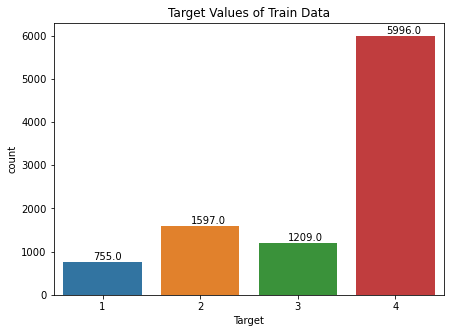

In [122]:
#Lets visualize the Actual results of Train data, test results of training data and results of test data, just to \
#see the variation how data is performing.

#Lets visualize target variable of train data

plt.figure(figsize=(7,5))
ax = sns.countplot(df_tr['Target'])
plt.title('Target Values of Train Data')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

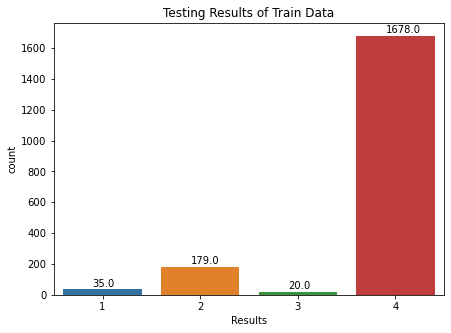

In [123]:
#Testing results of train data

Testing_results_train_data = pd.DataFrame(pred_rf,columns = ['Results'])

plt.figure(figsize=(7,5))
ax = sns.countplot(Testing_results_train_data['Results'])
plt.title('Testing Results of Train Data')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

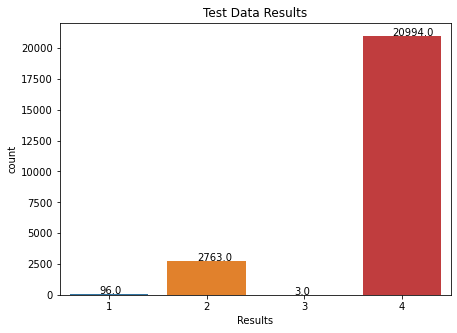

In [124]:
#Test data results after performing the model

test_results = pd.DataFrame(rf.predict(df_te),columns = ['Results'])

plt.figure(figsize=(7,5))
ax = sns.countplot(test_results['Results'])
plt.title('Test Data Results')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

#### 10. Check the accuracy using random forest with cross validation.

In [125]:
#Applying cross validation

from sklearn.model_selection import cross_validate

rf = RandomForestClassifier()

res_rf = cross_validate(rf,x,y,cv = 5, return_train_score=True)

In [126]:
train_rf = np.average(res_rf['train_score'])
test_rf = np.average(res_rf['test_score'])

print(train_rf)
print(test_rf)  

#model is not performing well cross validation where train result showns 100% and test results showns 61.1%

1.0
0.6120035075504293


In [127]:
#Lets apply hyper parameters to randomforest for cross validation

rf = RandomForestClassifier(criterion = 'entropy',
 max_depth = 7,
 max_features =  'auto',
 n_estimators=  200)

res_rf = cross_validate(rf,x,y,cv = 3, return_train_score=True)

train_rf = np.average(res_rf['train_score'])
test_rf = np.average(res_rf['test_score'])

print(train_rf)
print(test_rf)

0.7597565659076726
0.6149359623128792


In [128]:
#Conclusion:

#Model is performing some what better after performing with hyperparameters in randomforest while checkng cross validation.

# END

#### Some additional things performed to see model performance better - just for reference

In [129]:
rf = RandomForestClassifier(criterion = 'entropy',
 max_depth = 7,
 max_features =  'auto',
 n_estimators=  200)

rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       n_estimators=200)

In [130]:
pred_rf = rf.predict(x_test)

In [131]:
print('Accuracy Score of Test Data: ',accuracy_score(y_test,pred_rf))
print('Accuracy Score of Train Data: ',accuracy_score(y_train,rf.predict(x_train)))

#Model fits the best until here, will try to improve performance in next steps.
#1.Using Feature importance
#2.Using dimentionality reduction

Accuracy Score of Test Data:  0.7128661087866108
Accuracy Score of Train Data:  0.723348593852191


In [132]:
#using feature importance

labels = x.columns

feature_importances = pd.DataFrame({'feature': labels, 'importance': rf.feature_importances_})
feature_importances = feature_importances[feature_importances.importance>0.015]
feature_importances.head()

#Lets build the model for only below variables

feature  importance
0       v2a1    0.017938
6       v18q    0.019445
7      v18q1    0.022598
14      r4t1    0.024789
19  escolari    0.018916

In [133]:
x = df_tr[['v2a1','v18q','v18q1','r4t1','escolari']]
y = df_tr['Target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=10)

In [134]:
rf = RandomForestClassifier(criterion = 'entropy',
 max_depth = 7,
 max_features =  'auto',
 n_estimators=  200)

rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       n_estimators=200)

In [135]:
pred_rf = rf.predict(x_test)

print('Test Accuracy Score: ',accuracy_score(y_test,pred_rf))
print('Train Accuracy Score: ',accuracy_score(y_train,rf.predict(x_train))) 

#we see model has low performance but fits good.

Test Accuracy Score:  0.6600418410041841
Train Accuracy Score:  0.6578155657292348


In [136]:
#2. Using dimentionality reduction - PCA (principle component analysis)

#Before going to PCA, All data need to be on scale. so using min max scaler ie normalization

from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
df_mn = mn.fit_transform(df_tr)

df_mn_df = pd.DataFrame(df_mn, index = df_tr.index, columns = df_tr.columns)

x = df_mn_df
y = df_tr['Target']

In [137]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)

x_pca = pca.fit_transform(x)

x_pca_df = pd.DataFrame(x_pca, columns=['PC1','PC2','PC3','PC4','PC5'])

x_pca_df.head()

PC1       PC2       PC3       PC4       PC5
0  0.201569 -0.787297  0.914294  1.041326  1.002450
1  0.413375 -1.346611  1.677459  1.317531  0.412542
2 -0.678139 -0.289710  1.634580 -0.082253  0.234014
3 -1.474275 -1.132380 -0.880706  0.650425  0.367461
4 -1.597467 -0.514785  0.583592 -0.819158  0.598974

In [138]:
#lets build the model with pca variables

x_train,x_test,y_train,y_test = train_test_split(x_pca_df,y,test_size=0.20, random_state=10)

In [139]:
rf = RandomForestClassifier(criterion = 'entropy',
 max_depth = 7,
 max_features =  'auto',
 n_estimators=  200)

rf.fit(x_train,y_train)

pred_rf = rf.predict(x_test)

In [140]:
print('Test Accuracy Score: ',accuracy_score(y_test,pred_rf))
print('Train Accuracy Score: ',accuracy_score(y_train,rf.predict(x_train))) 

Test Accuracy Score:  0.6589958158995816
Train Accuracy Score:  0.6727272727272727


# Final Conclusion:
    
After seeing performance of model using several techniques, concluding that choosing the results which appeared in the step no. 9 ie

Got Training Accuracy score 71.7 % \
Got Testing Accuracy Score 72.2 %

________________________________________________________________________________________________________________________